
### Question No.2. Dataset: data1_0.25.csv   

1. Load the attached csv file in python. Each row consists of feature 1, feature 2, class label.
 

2. Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) in each layer with 70% training and 30% validation data. Use appropriate learning rate, activation, and loss functions and also mention the reason for choosing the same. Report, compare, and explain the observed accuracy and minimum loss achieved.
 

3. Visually observe the dataset and design an appropriate feature transformation (derived feature) such that after feature transformation, the dataset can be classified using a minimal network architecture (minimum number of parameters). Design, train this minimal network, and report training and validation errors, and trained parameters of the network. Use 70% training and 30% validation data, appropriate learning rate, activation and loss functions. Explain the final results. 


1. **Load a data**
2. **Create hidden layers with required hidden unit**
3. **Visually observe data and results**

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data1_0.25.csv to data1_0.25.csv


In [ ]:
import numpy as np
import pandas as pd
cols = ['X0', 'X1', 'label']
dataset = pd.read_csv(r'data1_0.25.csv', header=None, names=cols, index_col=False)
dataset.head()

X0        X1  label
0  0.702478  0.127961      0
1  0.640130 -0.281620      0
2 -0.429982 -0.581259      0
3  0.046000 -0.181767      0
4 -0.149910 -0.645058      0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc24aa39650>,
      dtype=object)

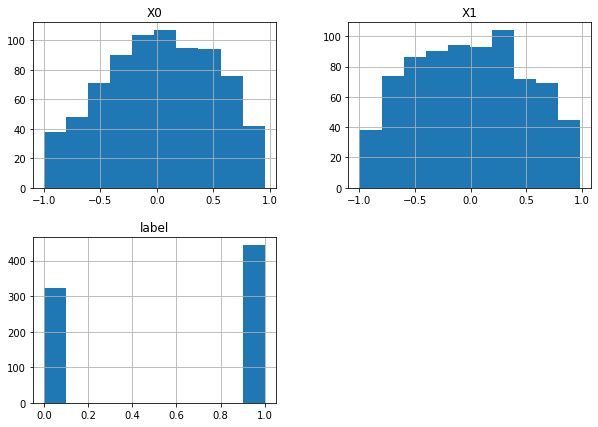

In [ ]:
import matplotlib.pyplot as plt
#Data review 
dataset.hist(figsize=(10,7))

##### Data is in scale of numeric and need not to be changed. It can be used as it is for evaluation

##### Below is the segregation of the target value with respect to features.

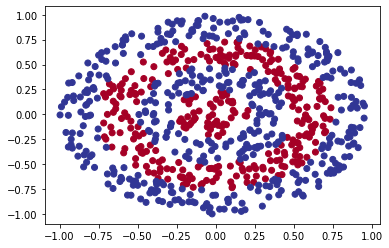

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(dataset['X0'], dataset['X1'], c=dataset['label'], cmap=plt.cm.RdYlBu);

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.drop("label",1)
y = dataset['label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
X_train,X_test,y_train,y_test

(           X0        X1
 128  0.082819  0.133439
 236  0.198639 -0.017705
 739 -0.818459  0.515741
 468 -0.826515 -0.480855
 443 -0.165604  0.434425
 ..        ...       ...
 324  0.107371  0.449872
 283 -0.469306 -0.381629
 321 -0.589035 -0.386770
 745  0.077429  0.925620
 512  0.281334  0.922507
 
 [535 rows x 2 columns],            X0        X1
 569  0.799527  0.453894
 356  0.048167  0.275610
 514  0.785312  0.171738
 661 -0.749434  0.593847
 73  -0.210291 -0.558048
 ..        ...       ...
 580  0.637899 -0.601818
 413  0.169593 -0.892116
 492  0.805921 -0.531431
 533  0.066413 -0.297992
 597  0.614845  0.615204
 
 [230 rows x 2 columns], 128    0
 236    0
 739    1
 468    1
 443    1
       ..
 324    1
 283    0
 321    0
 745    1
 512    1
 Name: label, Length: 535, dtype: int64, 569    1
 356    1
 514    1
 661    1
 73     0
       ..
 580    1
 413    1
 492    1
 533    1
 597    1
 Name: label, Length: 230, dtype: int64)

In [ ]:
tfdata=tf.convert_to_tensor(dataset)
type(tfdata), tfdata.shape,tfdata

(tensorflow.python.framework.ops.EagerTensor,
 TensorShape([765, 3]),
 <tf.Tensor: shape=(765, 3), dtype=float64, numpy=
 array([[ 0.70247802,  0.12796062,  0.        ],
        [ 0.64013009, -0.28161997,  0.        ],
        [-0.42998201, -0.58125879,  0.        ],
        ...,
        [ 0.71574244, -0.59073507,  1.        ],
        [-0.15046301,  0.85032456,  1.        ],
        [ 0.2486673 ,  0.21832184,  1.        ]])>)

In [ ]:
# Get various attributes of tensor
print("Datatype of every element:", tfdata.dtype)
print("Number of dimensions (rank):", tfdata.ndim)
print("Shape of tensor:", tfdata.shape)
print("Elements along axis 0 of tensor:", tfdata.shape[0])
print("Elements along last axis of tensor:", tfdata.shape[-1])
print("Total number of elements :", tf.size(tfdata).numpy()) # .numpy() converts to NumPy array

Datatype of every element: <dtype: 'float64'>
Number of dimensions (rank): 2
Shape of tensor: (765, 3)
Elements along axis 0 of tensor: 765
Elements along last axis of tensor: 3
Total number of elements : 2295


In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((535, 2), (230, 2), (535,), (230,))

### Let's perform modelling required as per the problem statement
1. Create a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Prediction

### Train single hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) 

Defining a method to cater the requirement to create a single layer netwrok with various hidden nodes. This method will be used to create, compile and fit the model on various hidden nodes (i.e. 4,8,12,16)

In [ ]:
def single_layer_network(nodes, opt, lr):
  print("Performing for:", nodes, opt, lr)

  # Set random seed
  tf.random.set_seed(42)

  # Replicate original model
  model = tf.keras.Sequential([
    ##single layer with "count" hidden nodes
    tf.keras.layers.Dense(nodes, activation="relu", input_shape=(2,)),
    
    ##output layer with binary clasification
    tf.keras.layers.Dense(1, activation="sigmoid") 
  ])

  if (opt == "Adam"):
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
  else:
    optimizer = tf.keras.optimizers.SGD(learning_rate=lr)

  # Compile the model 
  model.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=optimizer, 
                metrics=["accuracy"])


  # Fit the model
  history = model.fit(X_train, y_train, epochs=100, verbose=0)

  # Evaluate model on the test dataset
  eval = model.evaluate(X_test, y_test)

  return history, model, eval

Method to calculate the learning v/s loss, it will be used with history params

In [ ]:
def calc_learning_vs_loss(hist, desc):
  # Plot the learning rate versus the loss
  lrs = 1e-4 * (10 ** (np.arange(100)/20))
  plt.figure(figsize=(10, 10))
  plt.semilogx(lrs, hist.history["loss"]) # we want the x-axis (learning rate) to be log scale
  plt.xlabel("Learning Rate" + desc)
  plt.ylabel("Loss")
  plt.title("Learning rate vs. loss");

Method to plot confusion matrix

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
def display_confusion_matrix(ytest, ypred, title):
  cm = confusion_matrix(ytest, tf.round(ypred))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.title(title)
  plt.show()

##### Invoke the method to acquire a model after fitting and acquire the history of the model to understand how it is working. Apart from it, in parallel evaluating the model as well

In [ ]:
sln_hist0_4, sln_model0_4, sln_eval0_4 = single_layer_network(4, "Adam", 0.0001)
sln_hist1_4, sln_model1_4, sln_eval1_4 = single_layer_network(4, "Adam", 0.001)
sln_hist2_4, sln_model2_4, sln_eval2_4 = single_layer_network(4, "Adam", 1)
sln_hist3_4, sln_model3_4, sln_eval3_4 = single_layer_network(4, "Adam", 0.003)
sln_hist4_4, sln_model4_4, sln_eval4_4 = single_layer_network(4, "SGD",  0.0001)
sln_hist5_4, sln_model5_4, sln_eval5_4 = single_layer_network(4, "SGD",  0.001)
sln_hist6_4, sln_model6_4, sln_eval6_4 = single_layer_network(4, "SGD",  1)
sln_hist7_4, sln_model7_4, sln_eval7_4 = single_layer_network(4, "SGD",  0.003)
sln_hist8_4, sln_model8_4, sln_eval8_4 = single_layer_network(4, "Adam", 3)
sln_hist9_4, sln_model9_4, sln_eval9_4 = single_layer_network(4, "SGD",  3)

sln_hist0_8, sln_model0_8, sln_eval0_8 = single_layer_network(8, "Adam", 0.0001)
sln_hist1_8, sln_model1_8, sln_eval1_8 = single_layer_network(8, "Adam", 0.001)
sln_hist2_8, sln_model2_8, sln_eval2_8 = single_layer_network(8, "Adam", 1)
sln_hist3_8, sln_model3_8, sln_eval3_8 = single_layer_network(8, "Adam", 0.003)
sln_hist4_8, sln_model4_8, sln_eval4_8 = single_layer_network(8, "SGD",  0.0001)
sln_hist5_8, sln_model5_8, sln_eval5_8 = single_layer_network(8, "SGD",  0.001)
sln_hist6_8, sln_model6_8, sln_eval6_8 = single_layer_network(8, "SGD",  1)
sln_hist7_8, sln_model7_8, sln_eval7_8 = single_layer_network(8, "SGD",  0.003)
sln_hist8_8, sln_model8_8, sln_eval8_8 = single_layer_network(8, "Adam", 3)
sln_hist9_8, sln_model9_8, sln_eval9_8 = single_layer_network(8, "SGD",  3)

sln_hist0_12, sln_model0_12, sln_eval0_12 = single_layer_network(12, "Adam", 0.0001)
sln_hist1_12, sln_model1_12, sln_eval1_12 = single_layer_network(12, "Adam", 0.001)
sln_hist2_12, sln_model2_12, sln_eval2_12 = single_layer_network(12, "Adam", 1)
sln_hist3_12, sln_model3_12, sln_eval3_12 = single_layer_network(12, "Adam", 0.003)
sln_hist4_12, sln_model4_12, sln_eval4_12 = single_layer_network(12, "SGD",  0.0001)
sln_hist5_12, sln_model5_12, sln_eval5_12 = single_layer_network(12, "SGD",  0.001)
sln_hist6_12, sln_model6_12, sln_eval6_12 = single_layer_network(12, "SGD",  1)
sln_hist7_12, sln_model7_12, sln_eval7_12 = single_layer_network(12, "SGD",  0.003)
sln_hist8_12, sln_model8_12, sln_eval8_12 = single_layer_network(12, "Adam", 3)
sln_hist9_12, sln_model9_12, sln_eval9_12 = single_layer_network(12, "SGD",  3)

sln_hist0_16, sln_model0_16, sln_eval0_16 = single_layer_network(16, "Adam", 0.0001)
sln_hist1_16, sln_model1_16, sln_eval1_16 = single_layer_network(16, "Adam", 0.001)
sln_hist2_16, sln_model2_16, sln_eval2_16 = single_layer_network(16, "Adam", 1)
sln_hist3_16, sln_model3_16, sln_eval3_16 = single_layer_network(16, "Adam", 0.003)
sln_hist4_16, sln_model4_16, sln_eval4_16 = single_layer_network(16, "SGD",  0.0001)
sln_hist5_16, sln_model5_16, sln_eval5_16 = single_layer_network(16, "SGD",  0.001)
sln_hist6_16, sln_model6_16, sln_eval6_16 = single_layer_network(16, "SGD",  1)
sln_hist7_16, sln_model7_16, sln_eval7_16 = single_layer_network(16, "SGD",  0.003)
sln_hist8_16, sln_model8_16, sln_eval8_16 = single_layer_network(16, "Adam", 3)
sln_hist9_16, sln_model9_16, sln_eval9_16 = single_layer_network(16, "SGD",  3)

Performing for: 4 Adam 0.0001
8/8 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5391
Performing for: 4 Adam 0.001
8/8 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.5826
Performing for: 4 Adam 1
8/8 [==============================] - 0s 2ms/step - loss: 0.7078 - accuracy: 0.5435
Performing for: 4 Adam 0.003
8/8 [==============================] - 0s 2ms/step - loss: 0.6478 - accuracy: 0.5478
Performing for: 4 SGD 0.0001
8/8 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5130
Performing for: 4 SGD 0.001
8/8 [==============================] - 0s 3ms/step - loss: 0.6844 - accuracy: 0.5348
Performing for: 4 SGD 1
8/8 [==============================] - 0s 2ms/step - loss: 0.5159 - accuracy: 0.6913
Performing for: 4 SGD 0.003
8/8 [==============================] - 0s 3ms/step - loss: 0.6850 - accuracy: 0.5435
Performing for: 4 Adam 3
8/8 [==============================] - 0s 2ms/step - loss: 0.7136 - accur

**Note** We can observe from above model evaluation after trying multiple combinations required to understand and to acquire better accuracy. The better **ACCURACY** is coming using the configuration **Nodes: 16, optimizer: SGD, learning rate: 3** is given

### Now, plotting loss accuracy and lerning rate with respect to hidden units
1. 4 Nodes are used
2. 8 Nodes are used
3. 12 Nodes are used
4. 16 Nodes are used

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

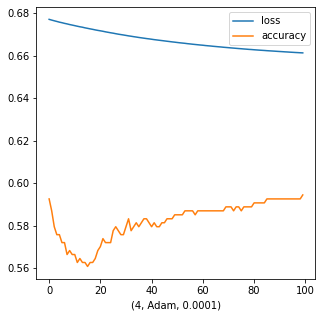

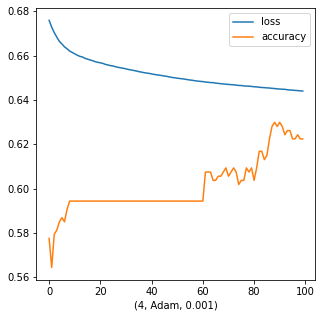

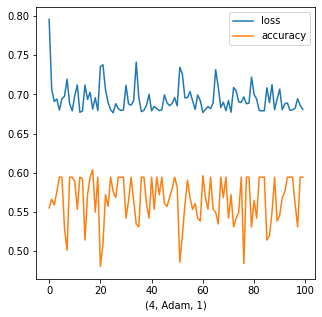

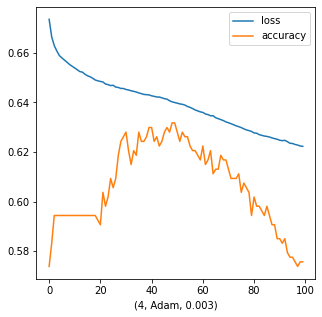

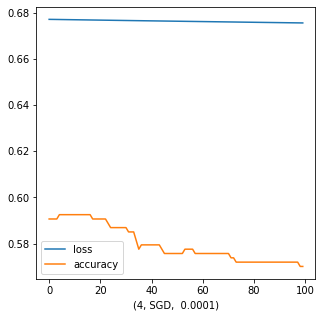

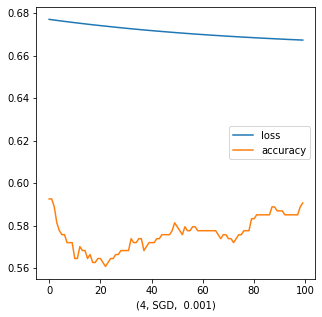

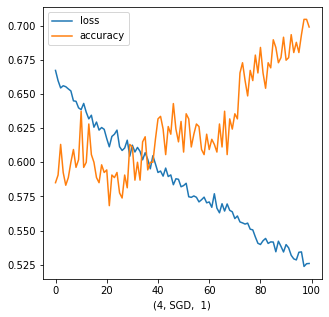

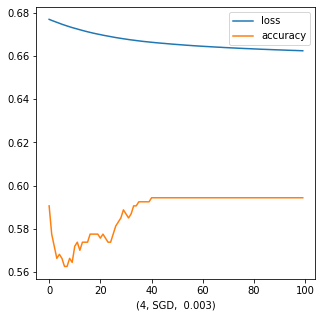

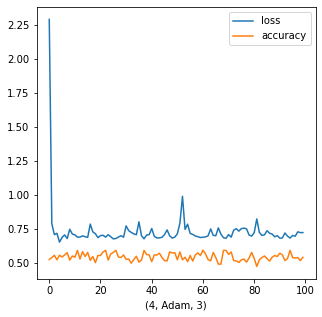

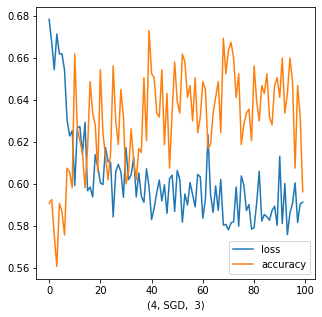

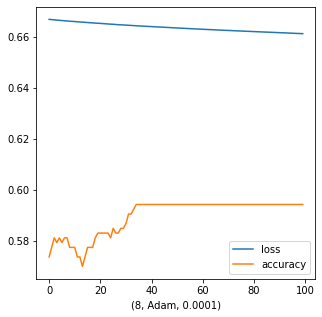

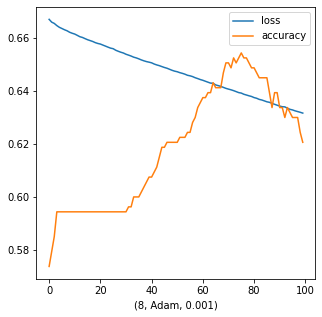

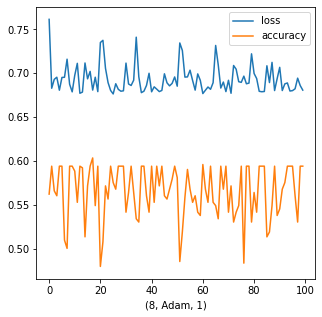

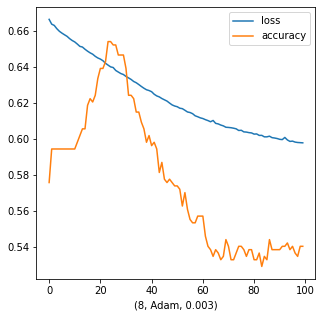

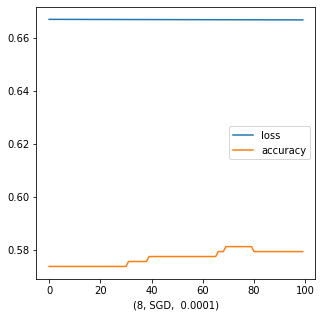

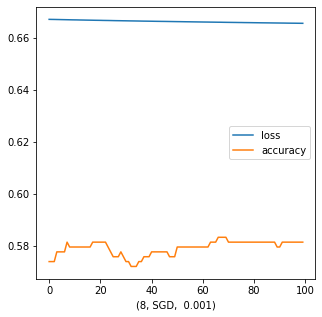

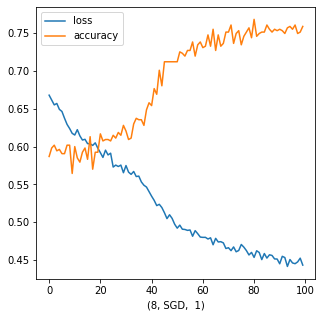

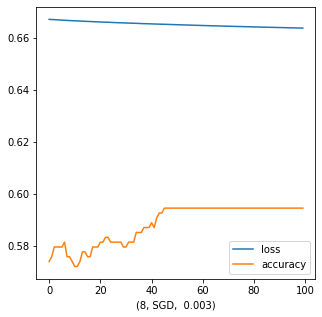

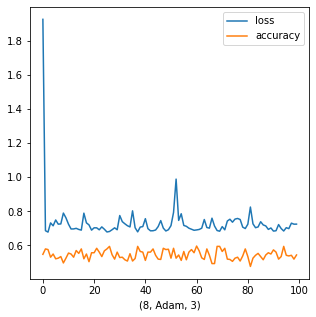

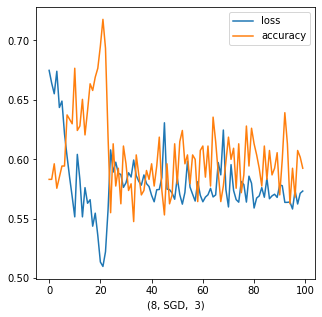

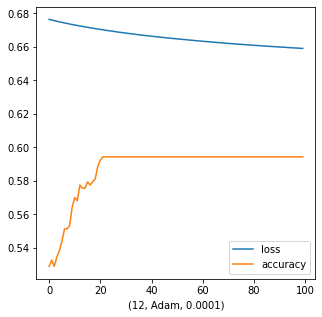

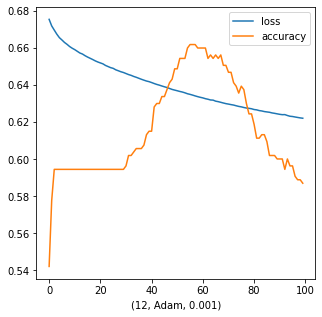

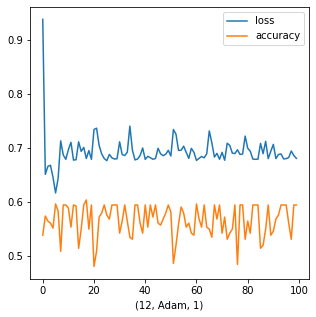

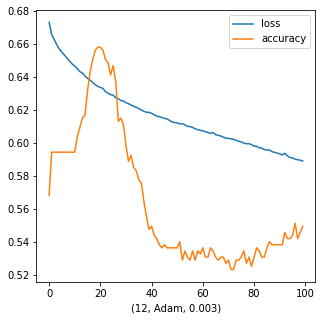

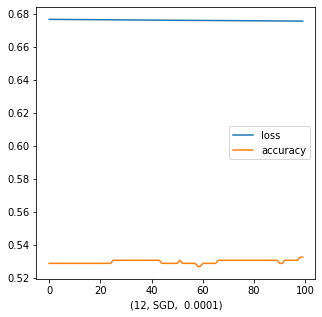

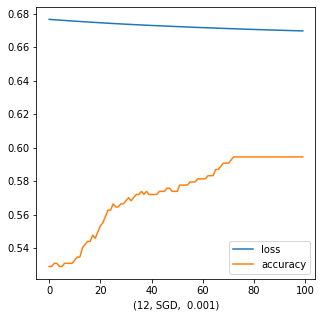

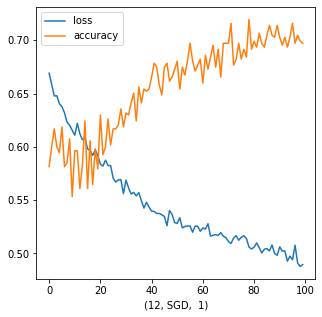

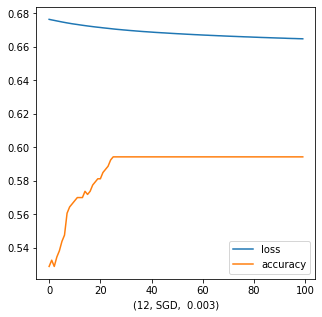

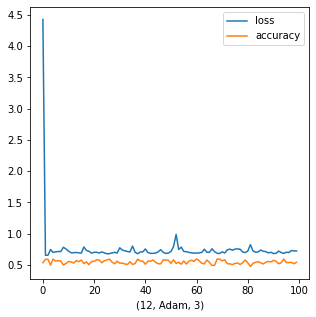

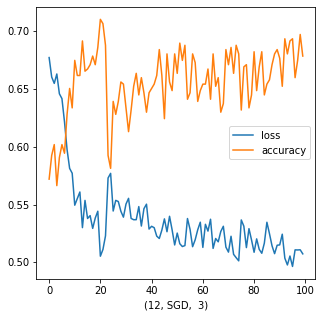

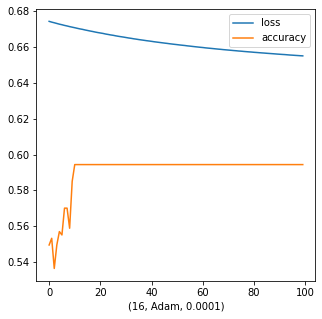

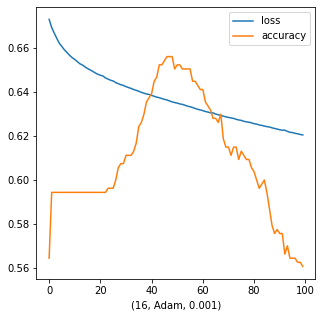

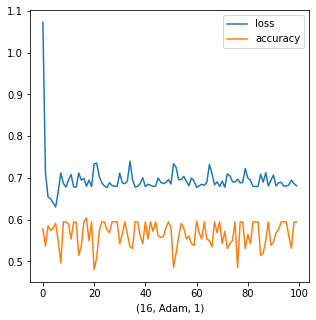

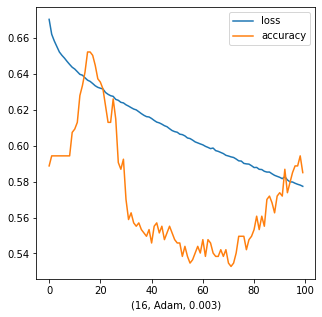

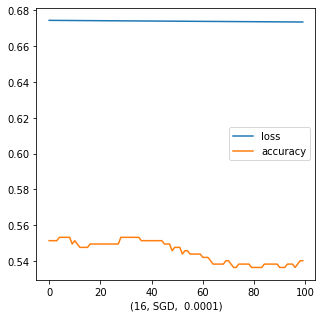

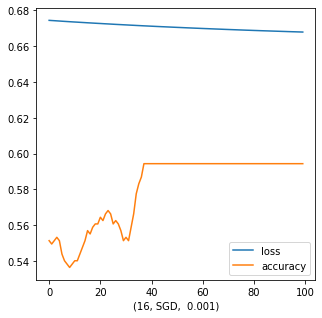

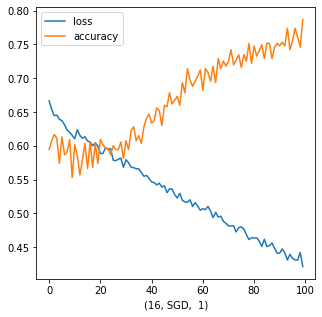

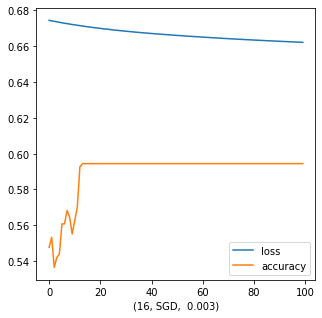

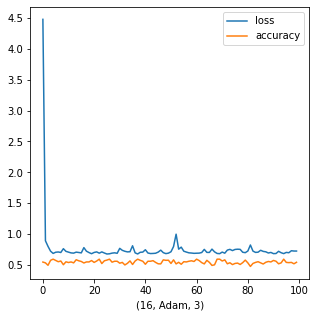

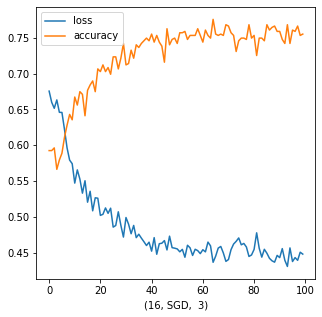

In [ ]:
# Checkout the history
pd.DataFrame(sln_hist0_4.history).plot(figsize=(5,5), xlabel="(4, Adam, 0.0001)");
pd.DataFrame(sln_hist1_4.history).plot(figsize=(5,5), xlabel="(4, Adam, 0.001)");
pd.DataFrame(sln_hist2_4.history).plot(figsize=(5,5), xlabel="(4, Adam, 1)");
pd.DataFrame(sln_hist3_4.history).plot(figsize=(5,5), xlabel="(4, Adam, 0.003)");
pd.DataFrame(sln_hist4_4.history).plot(figsize=(5,5), xlabel="(4, SGD,  0.0001)");
pd.DataFrame(sln_hist5_4.history).plot(figsize=(5,5), xlabel="(4, SGD,  0.001)");
pd.DataFrame(sln_hist6_4.history).plot(figsize=(5,5), xlabel="(4, SGD,  1)");
pd.DataFrame(sln_hist7_4.history).plot(figsize=(5,5), xlabel="(4, SGD,  0.003)");
pd.DataFrame(sln_hist8_4.history).plot(figsize=(5,5), xlabel="(4, Adam, 3)");
pd.DataFrame(sln_hist9_4.history).plot(figsize=(5,5), xlabel="(4, SGD,  3)");

pd.DataFrame(sln_hist0_8.history).plot(figsize=(5,5), xlabel="(8, Adam, 0.0001)");
pd.DataFrame(sln_hist1_8.history).plot(figsize=(5,5), xlabel="(8, Adam, 0.001)");
pd.DataFrame(sln_hist2_8.history).plot(figsize=(5,5), xlabel="(8, Adam, 1)");
pd.DataFrame(sln_hist3_8.history).plot(figsize=(5,5), xlabel="(8, Adam, 0.003)");
pd.DataFrame(sln_hist4_8.history).plot(figsize=(5,5), xlabel="(8, SGD,  0.0001)");
pd.DataFrame(sln_hist5_8.history).plot(figsize=(5,5), xlabel="(8, SGD,  0.001)");
pd.DataFrame(sln_hist6_8.history).plot(figsize=(5,5), xlabel="(8, SGD,  1)");
pd.DataFrame(sln_hist7_8.history).plot(figsize=(5,5), xlabel="(8, SGD,  0.003)");
pd.DataFrame(sln_hist8_8.history).plot(figsize=(5,5), xlabel="(8, Adam, 3)");
pd.DataFrame(sln_hist9_8.history).plot(figsize=(5,5), xlabel="(8, SGD,  3)");

pd.DataFrame(sln_hist0_12.history).plot(figsize=(5,5), xlabel="(12, Adam, 0.0001)");
pd.DataFrame(sln_hist1_12.history).plot(figsize=(5,5), xlabel="(12, Adam, 0.001)");
pd.DataFrame(sln_hist2_12.history).plot(figsize=(5,5), xlabel="(12, Adam, 1)");
pd.DataFrame(sln_hist3_12.history).plot(figsize=(5,5), xlabel="(12, Adam, 0.003)");
pd.DataFrame(sln_hist4_12.history).plot(figsize=(5,5), xlabel="(12, SGD,  0.0001)");
pd.DataFrame(sln_hist5_12.history).plot(figsize=(5,5), xlabel="(12, SGD,  0.001)");
pd.DataFrame(sln_hist6_12.history).plot(figsize=(5,5), xlabel="(12, SGD,  1)");
pd.DataFrame(sln_hist7_12.history).plot(figsize=(5,5), xlabel="(12, SGD,  0.003)");
pd.DataFrame(sln_hist8_12.history).plot(figsize=(5,5), xlabel="(12, Adam, 3)");
pd.DataFrame(sln_hist9_12.history).plot(figsize=(5,5), xlabel="(12, SGD,  3)");

pd.DataFrame(sln_hist0_16.history).plot(figsize=(5,5), xlabel="(16, Adam, 0.0001)");
pd.DataFrame(sln_hist1_16.history).plot(figsize=(5,5), xlabel="(16, Adam, 0.001)");
pd.DataFrame(sln_hist2_16.history).plot(figsize=(5,5), xlabel="(16, Adam, 1)");
pd.DataFrame(sln_hist3_16.history).plot(figsize=(5,5), xlabel="(16, Adam, 0.003)");
pd.DataFrame(sln_hist4_16.history).plot(figsize=(5,5), xlabel="(16, SGD,  0.0001)");
pd.DataFrame(sln_hist5_16.history).plot(figsize=(5,5), xlabel="(16, SGD,  0.001)");
pd.DataFrame(sln_hist6_16.history).plot(figsize=(5,5), xlabel="(16, SGD,  1)");
pd.DataFrame(sln_hist7_16.history).plot(figsize=(5,5), xlabel="(16, SGD,  0.003)");
pd.DataFrame(sln_hist8_16.history).plot(figsize=(5,5), xlabel="(16, Adam, 3)");
pd.DataFrame(sln_hist9_16.history).plot(figsize=(5,5), xlabel="(16, SGD,  3)");


### Analysis of above figure for single layer
1. Model accurracy is very high when number of epochs are increasing
2. Model accurracy is increasing as the learning rate is varying
3. Optimizer and the number of neurons are also impacting the accuracy
4. The best result acquired when the configuration **Nodes: 16, optimizer: SGD, learning rate: 3** is given

#### Calculating learning v/s loss for each count of nodes for which evaluation is done
**Lowest point** in plot will be considered as the best learning rate

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much

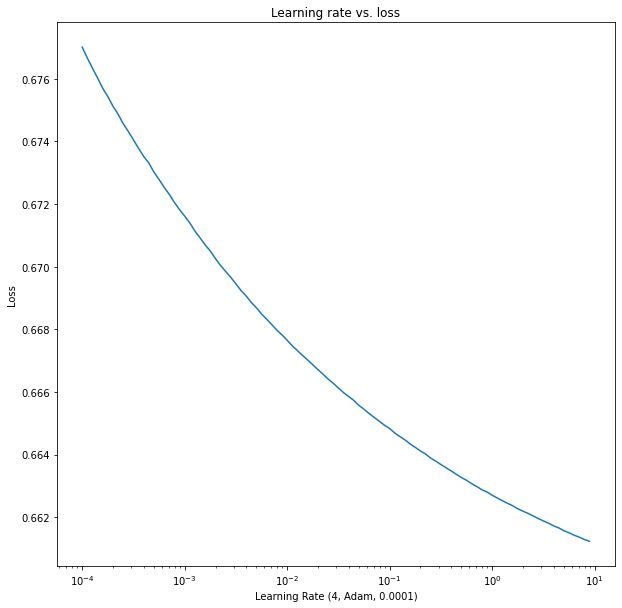

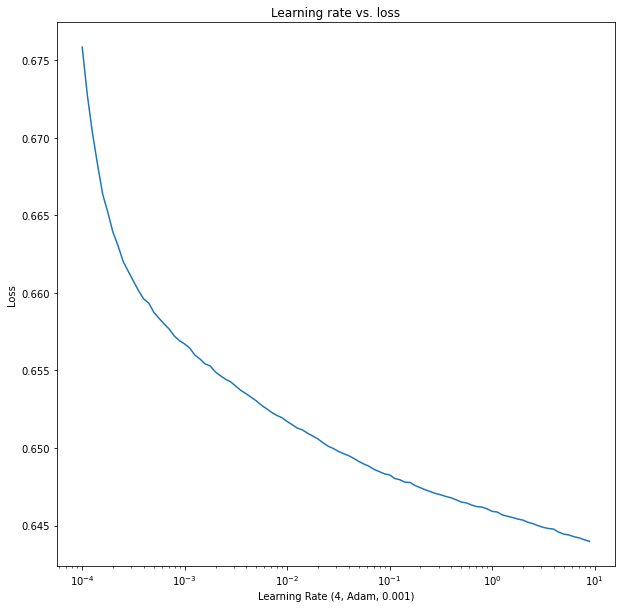

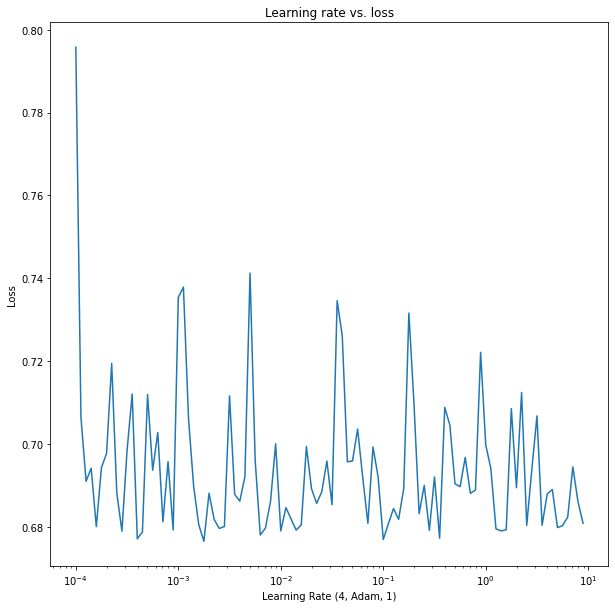

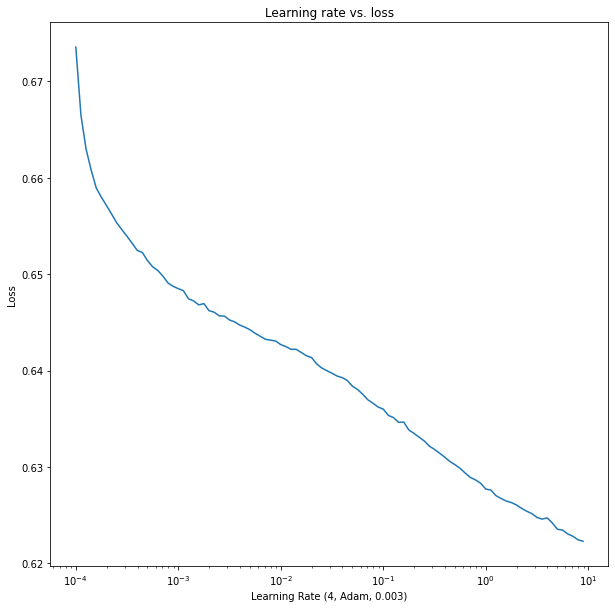

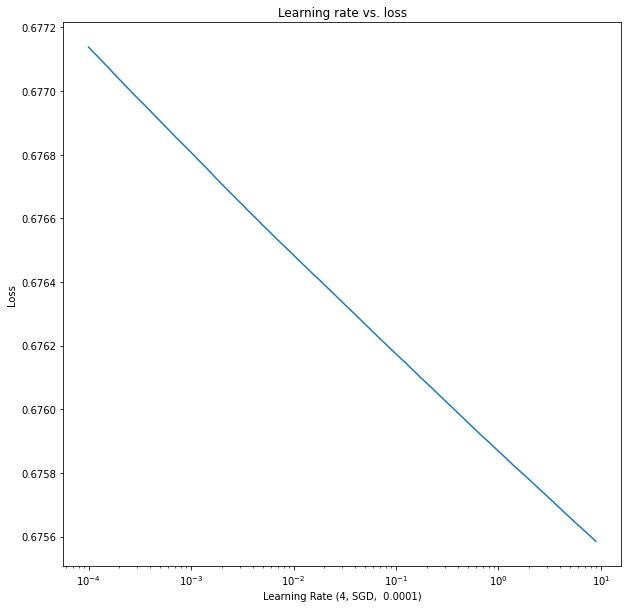

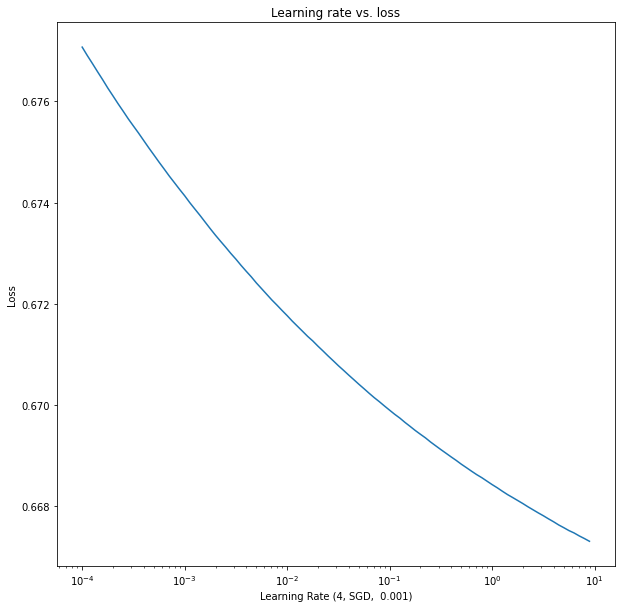

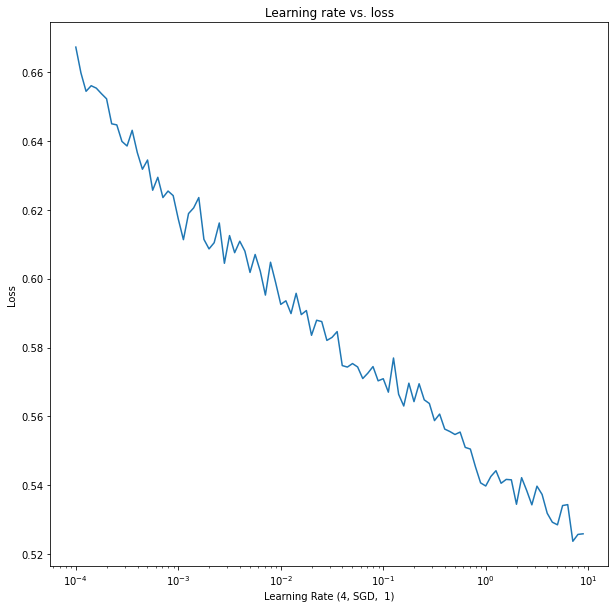

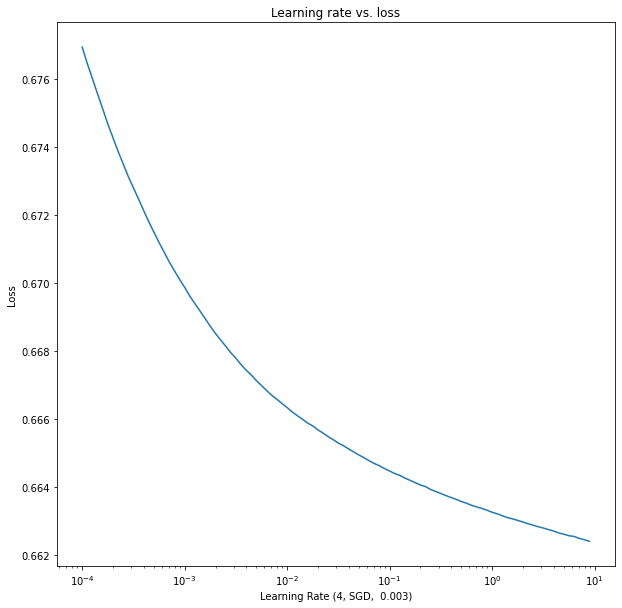

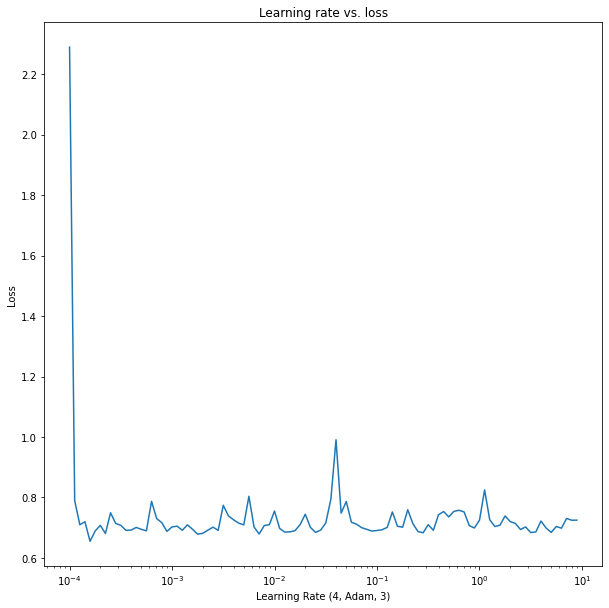

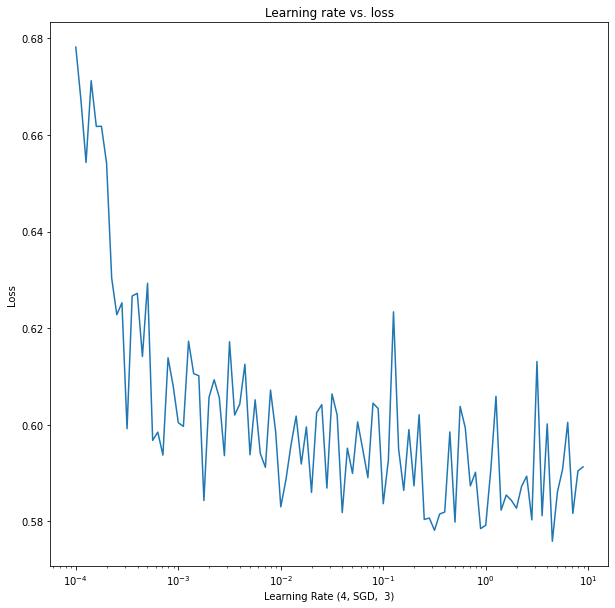

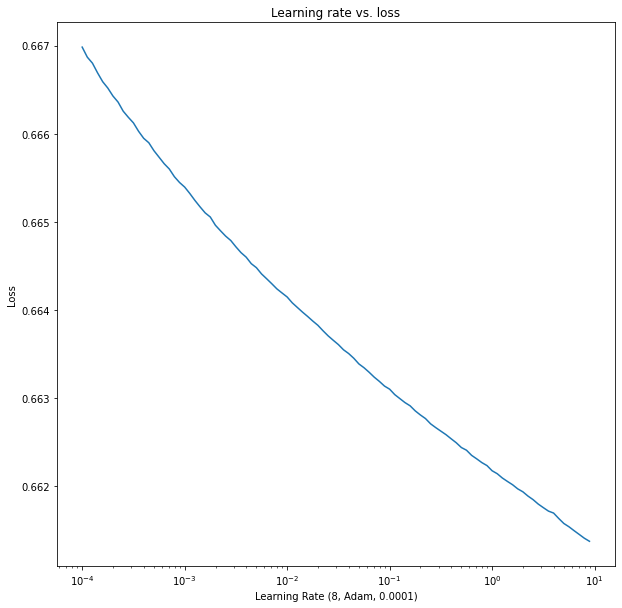

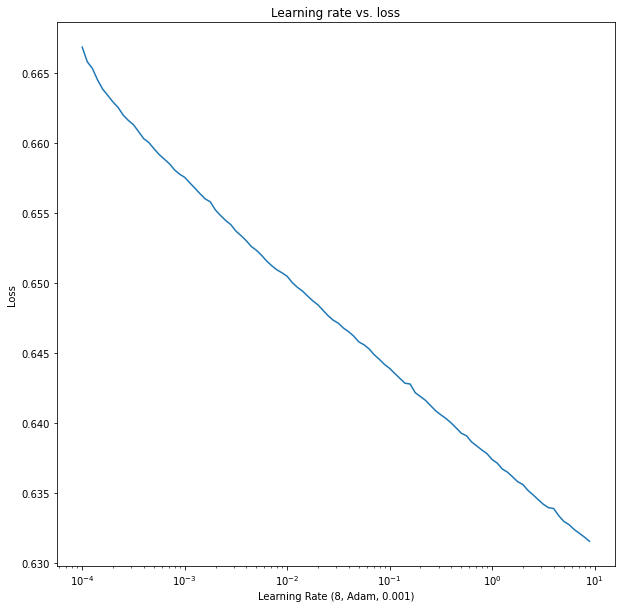

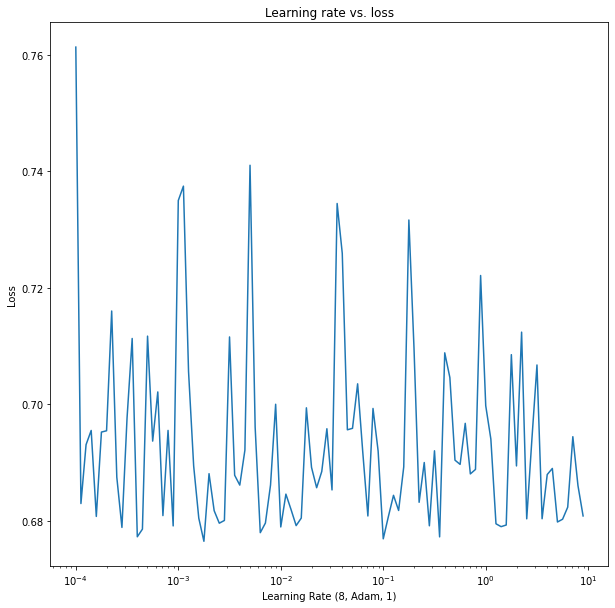

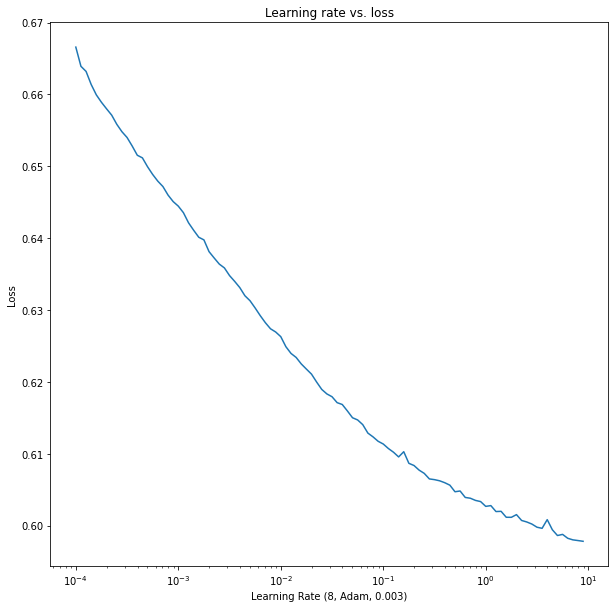

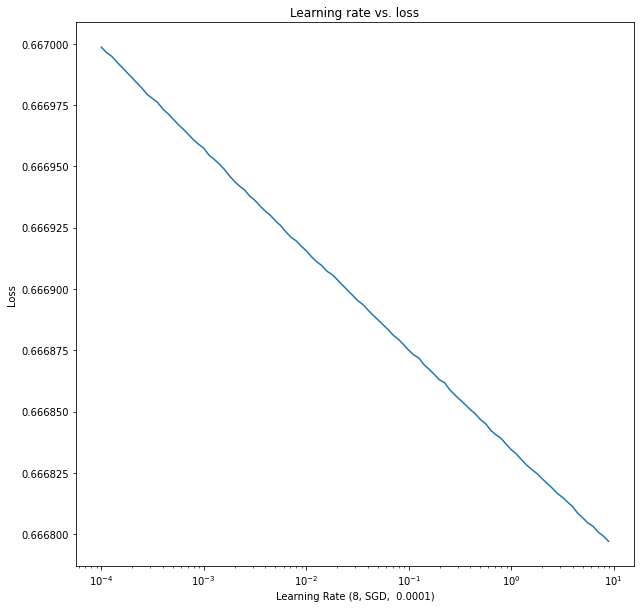

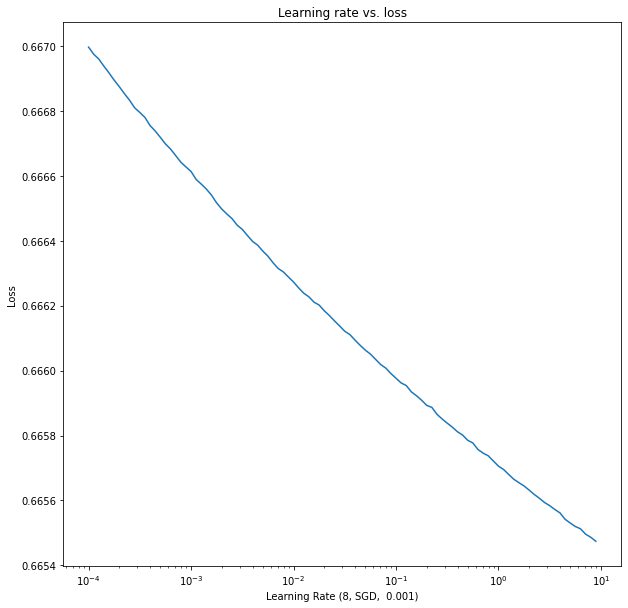

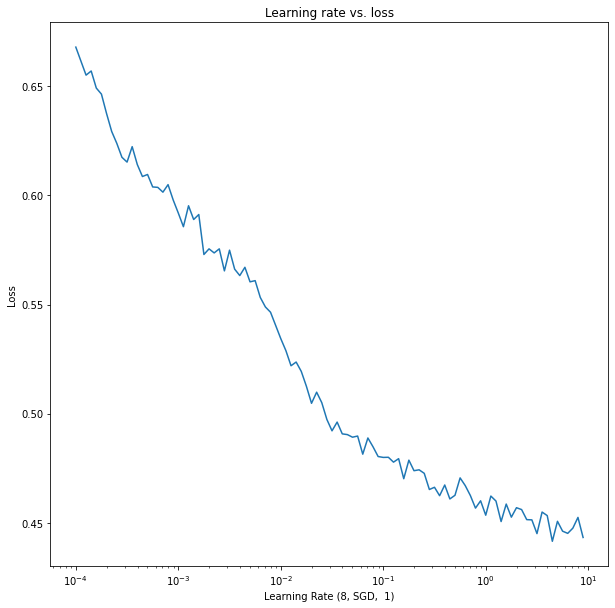

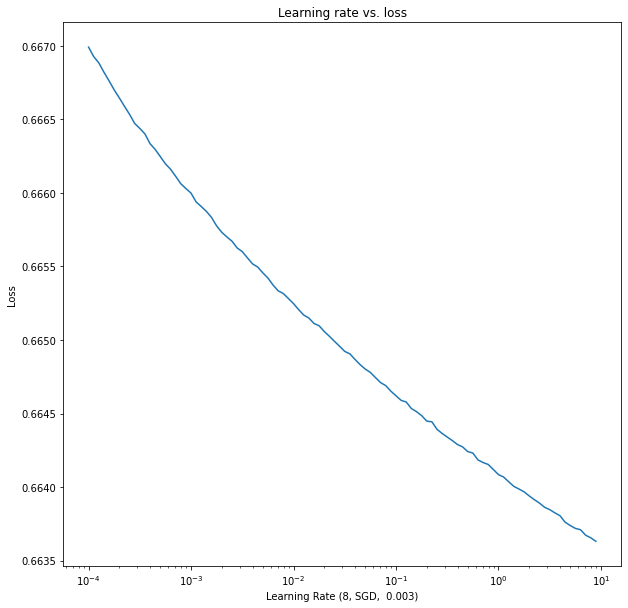

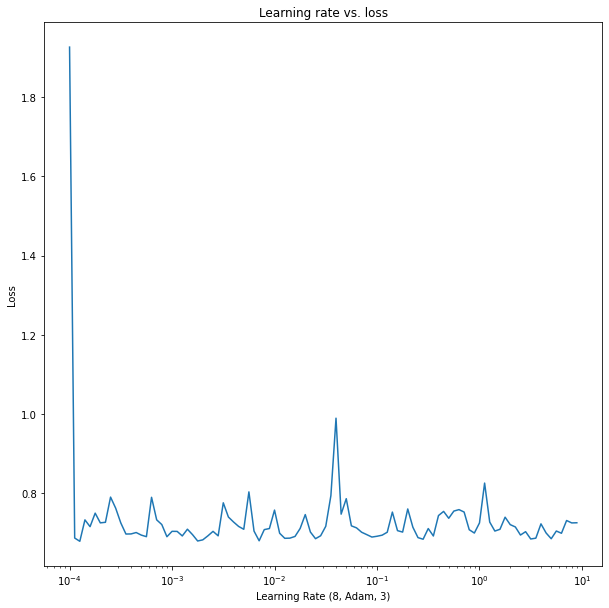

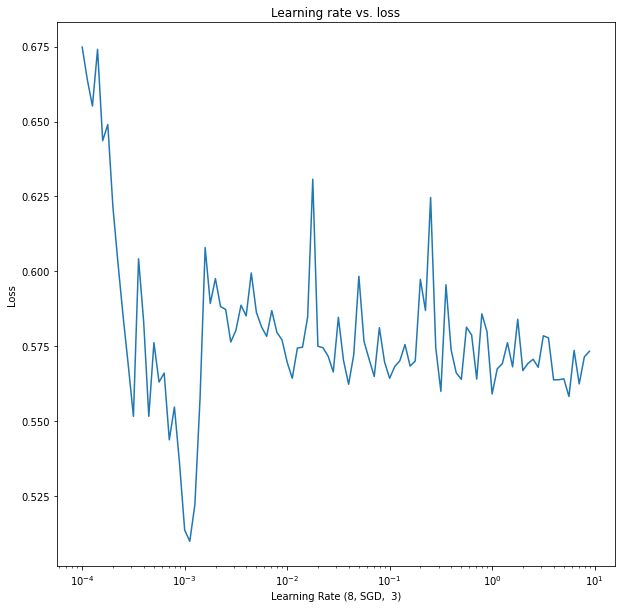

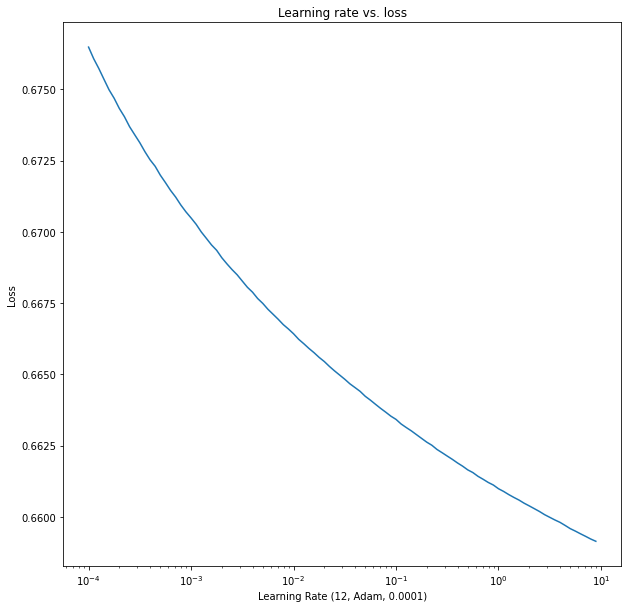

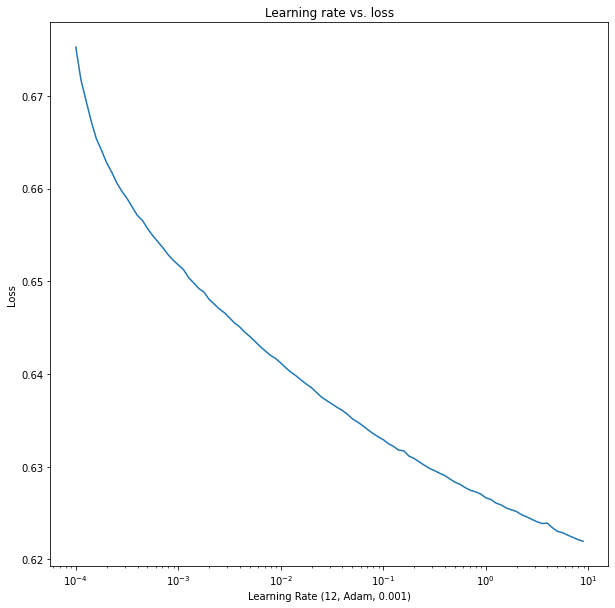

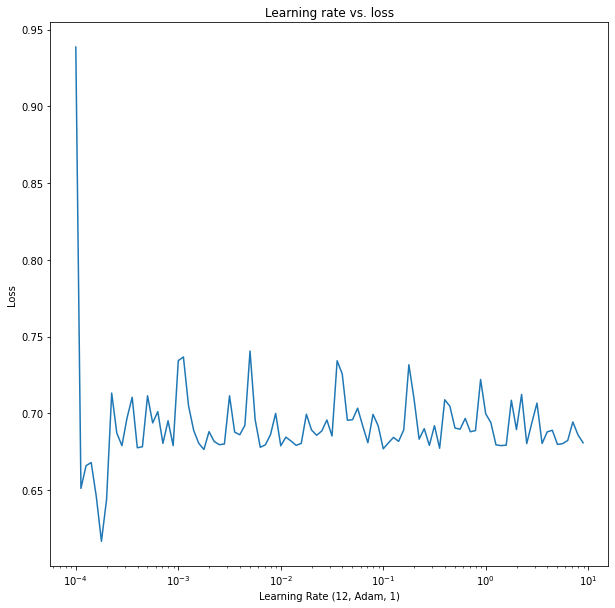

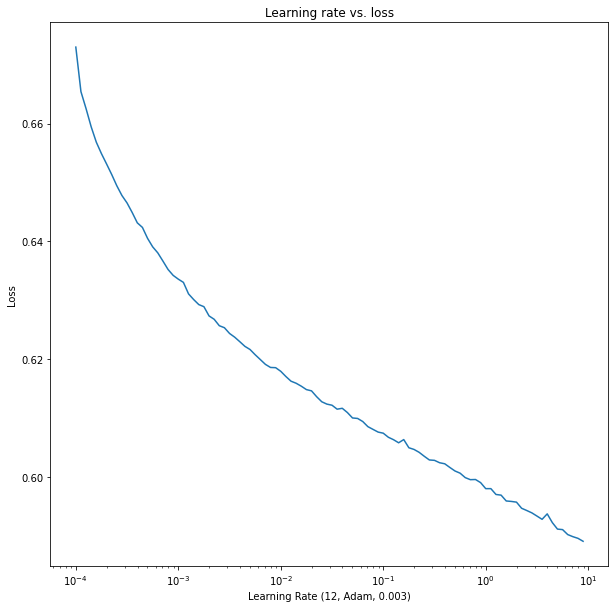

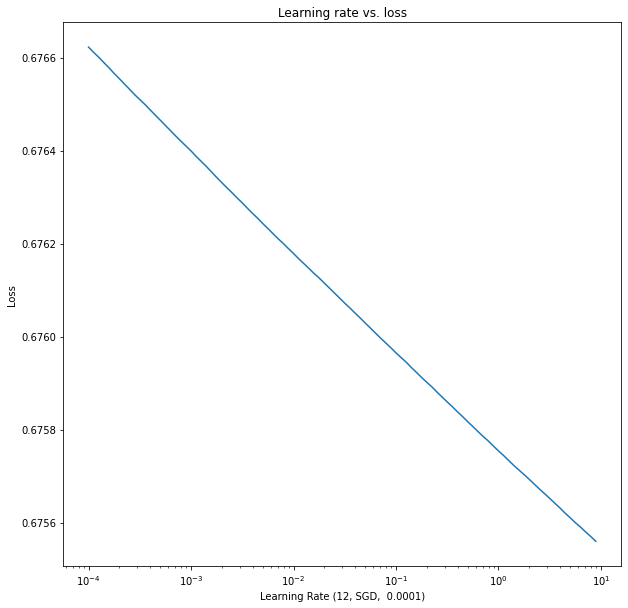

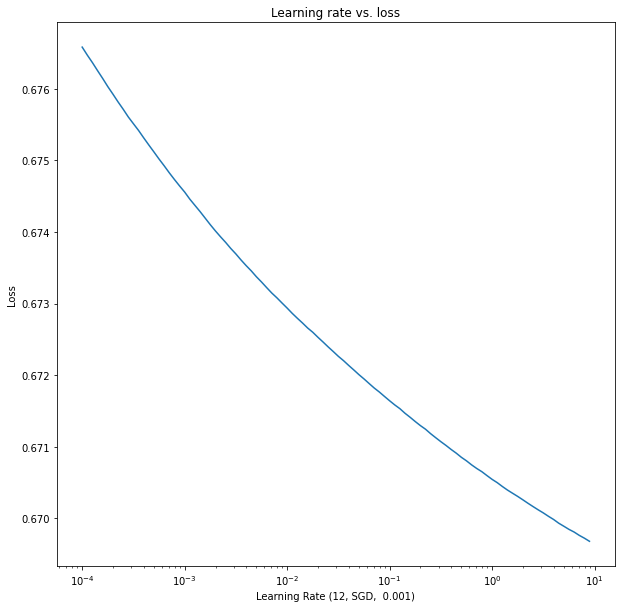

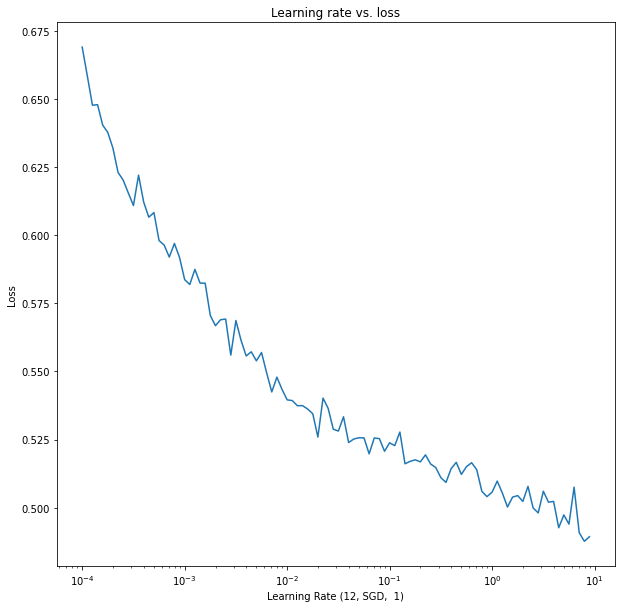

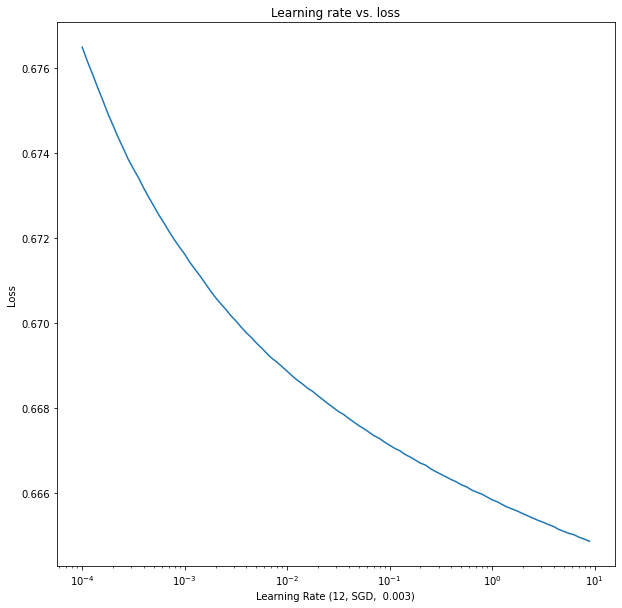

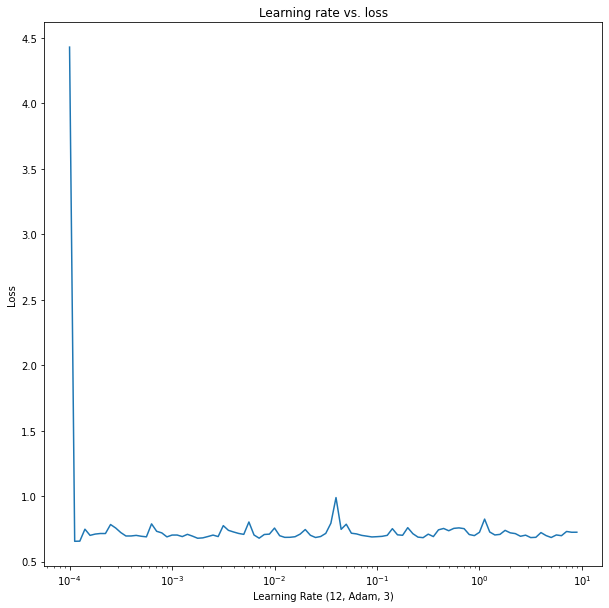

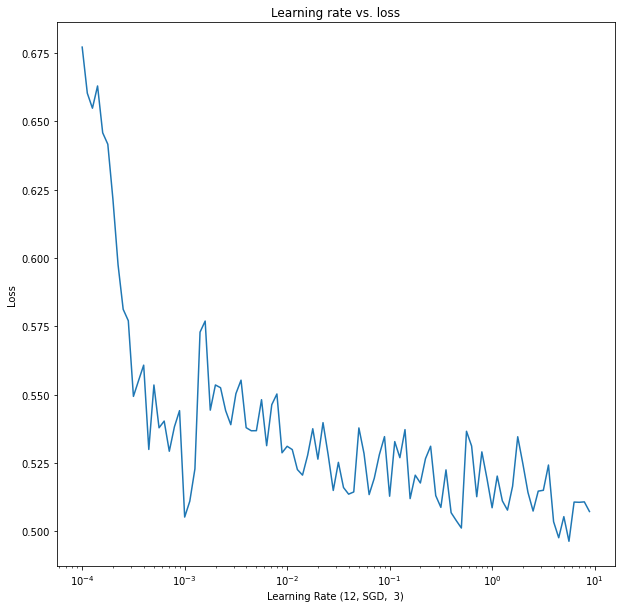

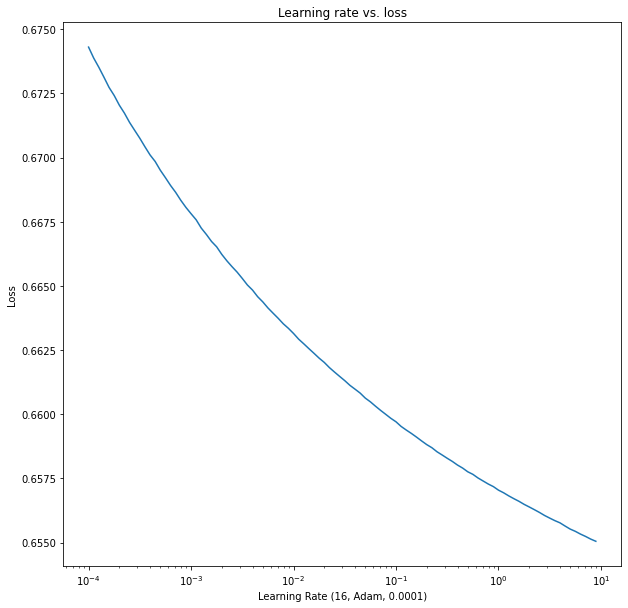

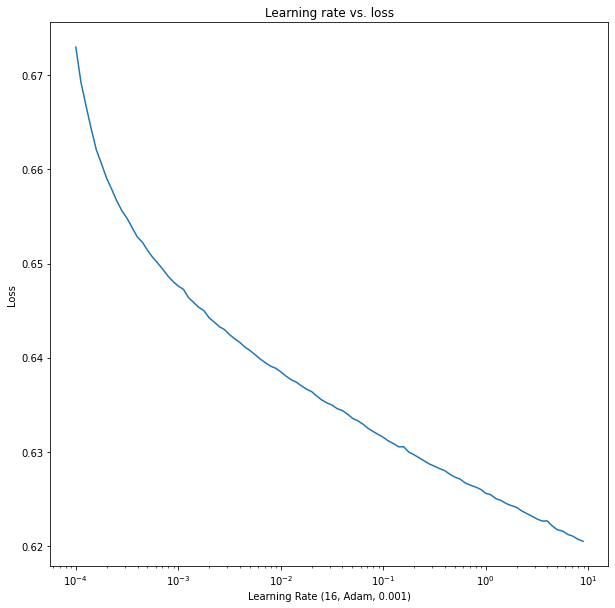

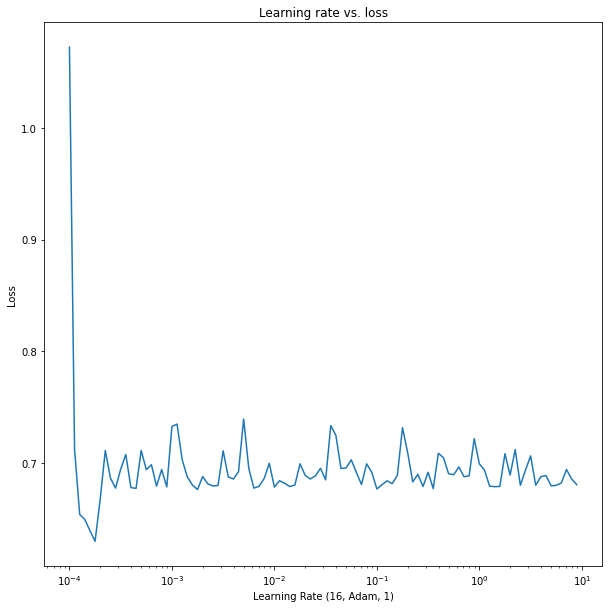

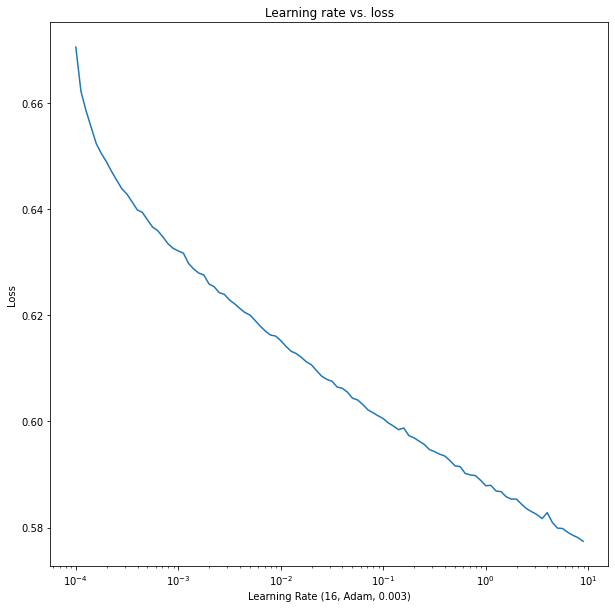

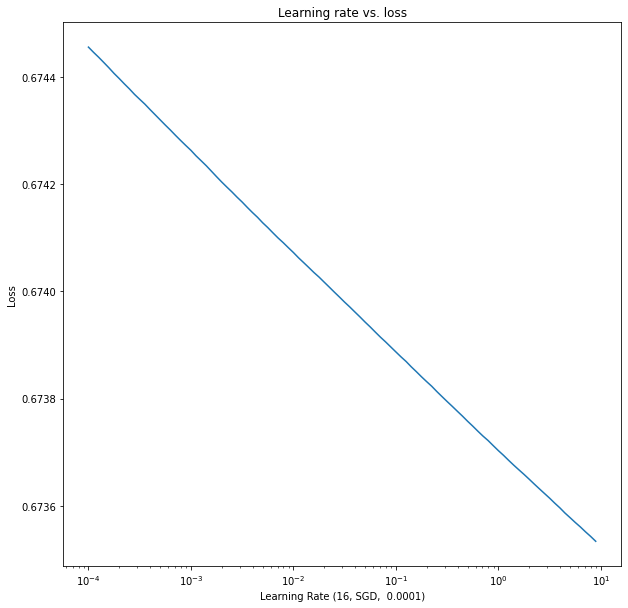

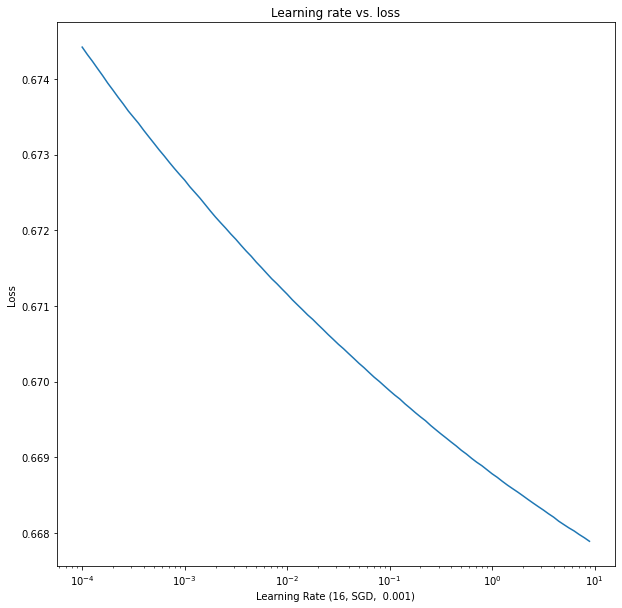

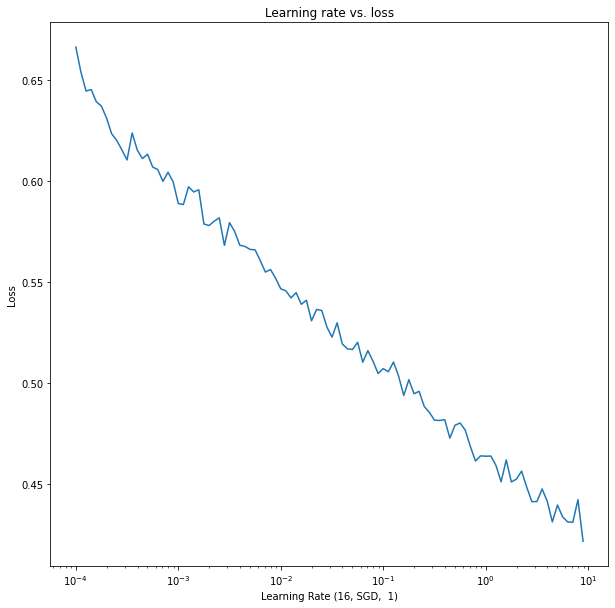

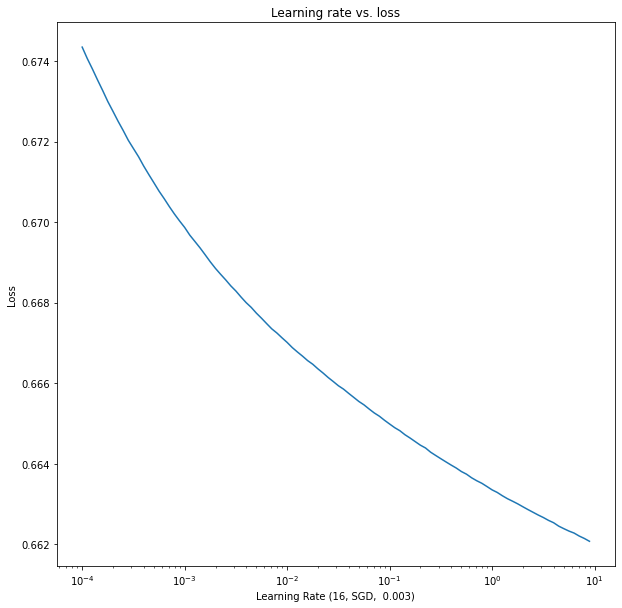

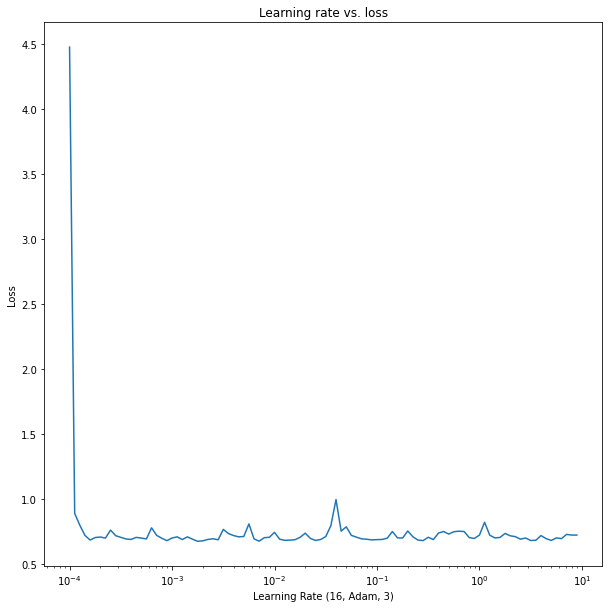

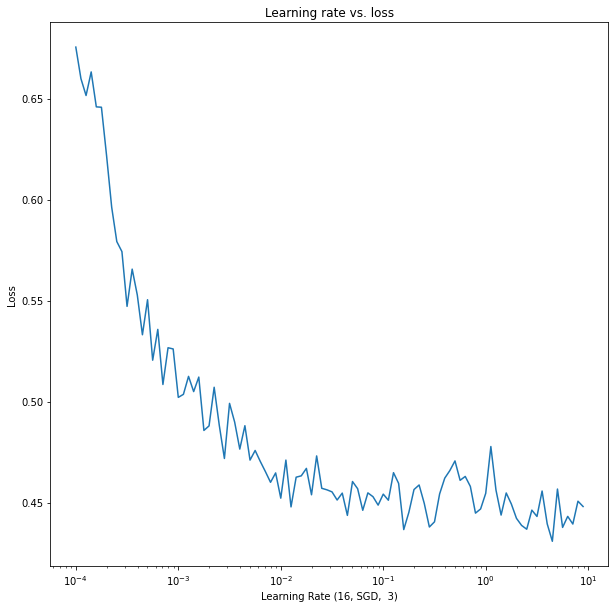

In [ ]:
calc_learning_vs_loss(sln_hist0_4, " (4, Adam, 0.0001)")
calc_learning_vs_loss(sln_hist1_4, " (4, Adam, 0.001)")
calc_learning_vs_loss(sln_hist2_4, " (4, Adam, 1)")
calc_learning_vs_loss(sln_hist3_4, " (4, Adam, 0.003)")
calc_learning_vs_loss(sln_hist4_4, " (4, SGD,  0.0001)")
calc_learning_vs_loss(sln_hist5_4, " (4, SGD,  0.001)")
calc_learning_vs_loss(sln_hist6_4, " (4, SGD,  1)")
calc_learning_vs_loss(sln_hist7_4, " (4, SGD,  0.003)")
calc_learning_vs_loss(sln_hist8_4, " (4, Adam, 3)")
calc_learning_vs_loss(sln_hist9_4, " (4, SGD,  3)")

calc_learning_vs_loss(sln_hist0_8, " (8, Adam, 0.0001)")
calc_learning_vs_loss(sln_hist1_8, " (8, Adam, 0.001)")
calc_learning_vs_loss(sln_hist2_8, " (8, Adam, 1)")
calc_learning_vs_loss(sln_hist3_8, " (8, Adam, 0.003)")
calc_learning_vs_loss(sln_hist4_8, " (8, SGD,  0.0001)")
calc_learning_vs_loss(sln_hist5_8, " (8, SGD,  0.001)")
calc_learning_vs_loss(sln_hist6_8, " (8, SGD,  1)")
calc_learning_vs_loss(sln_hist7_8, " (8, SGD,  0.003)")
calc_learning_vs_loss(sln_hist8_8, " (8, Adam, 3)")
calc_learning_vs_loss(sln_hist9_8, " (8, SGD,  3)")

calc_learning_vs_loss(sln_hist0_12, " (12, Adam, 0.0001)")
calc_learning_vs_loss(sln_hist1_12, " (12, Adam, 0.001)")
calc_learning_vs_loss(sln_hist2_12, " (12, Adam, 1)")
calc_learning_vs_loss(sln_hist3_12, " (12, Adam, 0.003)")
calc_learning_vs_loss(sln_hist4_12, " (12, SGD,  0.0001)")
calc_learning_vs_loss(sln_hist5_12, " (12, SGD,  0.001)")
calc_learning_vs_loss(sln_hist6_12, " (12, SGD,  1)")
calc_learning_vs_loss(sln_hist7_12, " (12, SGD,  0.003)")
calc_learning_vs_loss(sln_hist8_12, " (12, Adam, 3)")
calc_learning_vs_loss(sln_hist9_12, " (12, SGD,  3)")

calc_learning_vs_loss(sln_hist0_16, " (16, Adam, 0.0001)")
calc_learning_vs_loss(sln_hist1_16, " (16, Adam, 0.001)")
calc_learning_vs_loss(sln_hist2_16, " (16, Adam, 1)")
calc_learning_vs_loss(sln_hist3_16, " (16, Adam, 0.003)")
calc_learning_vs_loss(sln_hist4_16, " (16, SGD,  0.0001)")
calc_learning_vs_loss(sln_hist5_16, " (16, SGD,  0.001)")
calc_learning_vs_loss(sln_hist6_16, " (16, SGD,  1)")
calc_learning_vs_loss(sln_hist7_16, " (16, SGD,  0.003)")
calc_learning_vs_loss(sln_hist8_16, " (16, Adam, 3)")
calc_learning_vs_loss(sln_hist9_16, " (16, SGD,  3)")

In [ ]:
X_test

X0        X1
569  0.799527  0.453894
356  0.048167  0.275610
514  0.785312  0.171738
661 -0.749434  0.593847
73  -0.210291 -0.558048
..        ...       ...
580  0.637899 -0.601818
413  0.169593 -0.892116
492  0.805921 -0.531431
533  0.066413 -0.297992
597  0.614845  0.615204

[230 rows x 2 columns]

In [ ]:
# # Make predictions with our trained model
y_preds_0_4=sln_model0_4.predict(X_test)
y_preds_1_4=sln_model1_4.predict(X_test)
y_preds_2_4=sln_model2_4.predict(X_test)
y_preds_3_4=sln_model3_4.predict(X_test)
y_preds_4_4=sln_model4_4.predict(X_test)
y_preds_5_4=sln_model5_4.predict(X_test)
y_preds_6_4=sln_model6_4.predict(X_test)
y_preds_7_4=sln_model7_4.predict(X_test)
y_preds_8_4=sln_model8_4.predict(X_test)
y_preds_9_4=sln_model9_4.predict(X_test)
		
y_preds_0_8=sln_model0_8.predict(X_test)
y_preds_1_8=sln_model1_8.predict(X_test)
y_preds_2_8=sln_model2_8.predict(X_test)
y_preds_3_8=sln_model3_8.predict(X_test)
y_preds_4_8=sln_model4_8.predict(X_test)
y_preds_5_8=sln_model5_8.predict(X_test)
y_preds_6_8=sln_model6_8.predict(X_test)
y_preds_7_8=sln_model7_8.predict(X_test)
y_preds_8_8=sln_model8_8.predict(X_test)
y_preds_9_8=sln_model9_8.predict(X_test)

y_preds_0_12=sln_model0_12.predict(X_test)
y_preds_1_12=sln_model1_12.predict(X_test)
y_preds_2_12=sln_model2_12.predict(X_test)
y_preds_3_12=sln_model3_12.predict(X_test)
y_preds_4_12=sln_model4_12.predict(X_test)
y_preds_5_12=sln_model5_12.predict(X_test)
y_preds_6_12=sln_model6_12.predict(X_test)
y_preds_7_12=sln_model7_12.predict(X_test)
y_preds_8_12=sln_model8_12.predict(X_test)
y_preds_9_12=sln_model9_12.predict(X_test)	
		 
y_preds_0_16=sln_model0_16.predict(X_test)
y_preds_1_16=sln_model1_16.predict(X_test)
y_preds_2_16=sln_model2_16.predict(X_test)
y_preds_3_16=sln_model3_16.predict(X_test)
y_preds_4_16=sln_model4_16.predict(X_test)
y_preds_5_16=sln_model5_16.predict(X_test)
y_preds_6_16=sln_model6_16.predict(X_test)
y_preds_7_16=sln_model7_16.predict(X_test)
y_preds_8_16=sln_model8_16.predict(X_test)
y_preds_9_16=sln_model9_16.predict(X_test)

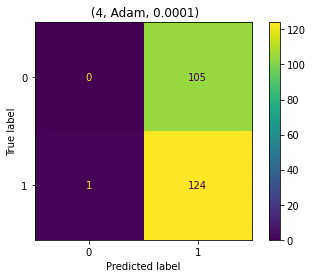

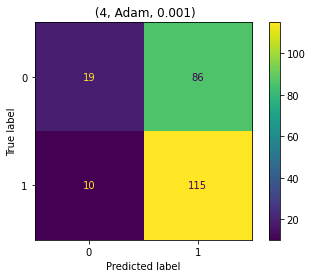

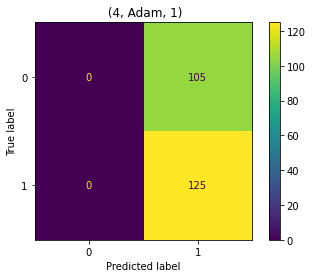

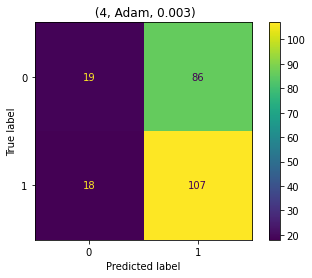

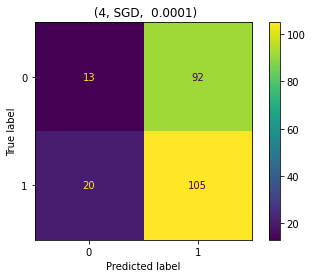

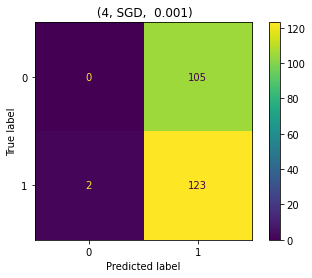

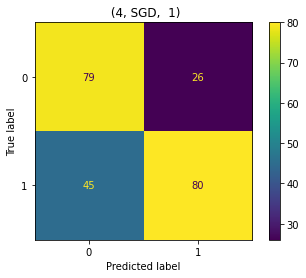

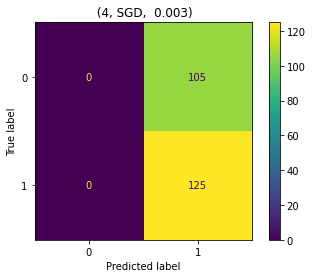

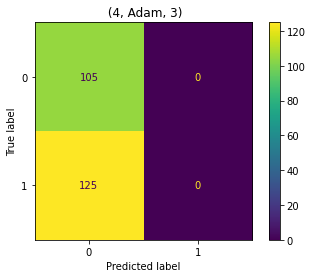

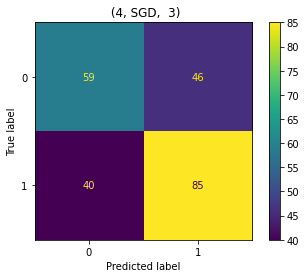

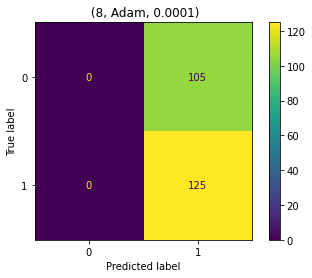

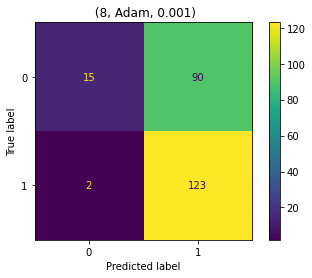

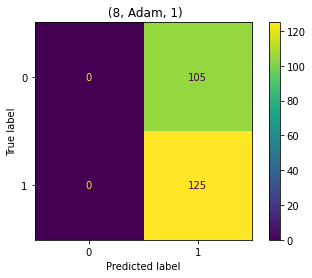

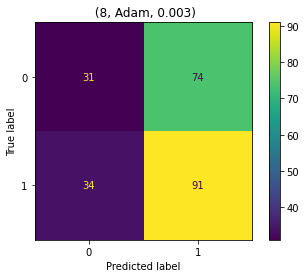

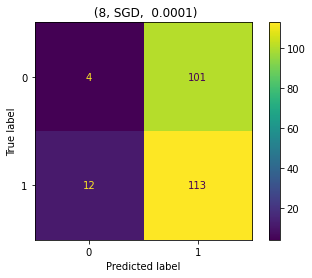

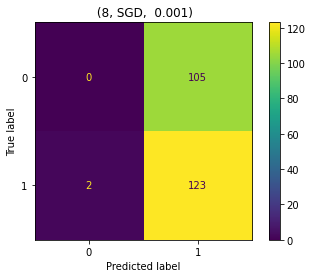

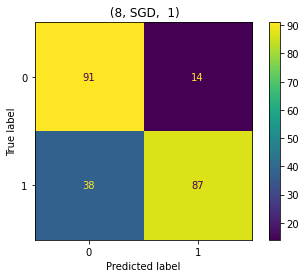

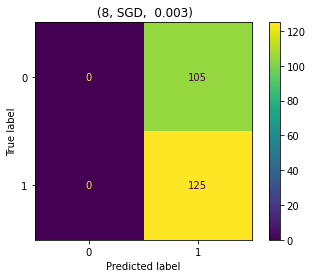

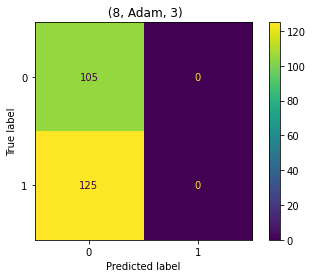

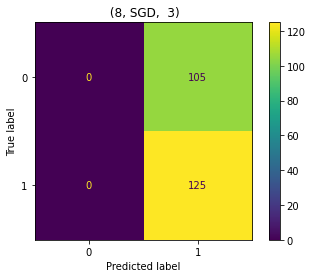

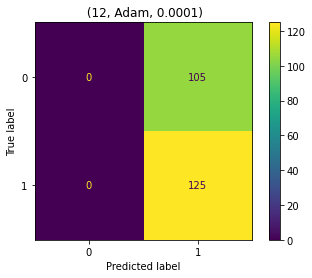

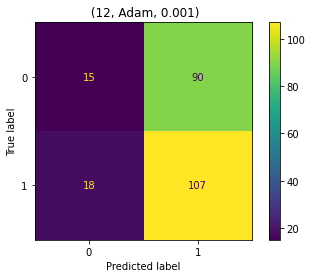

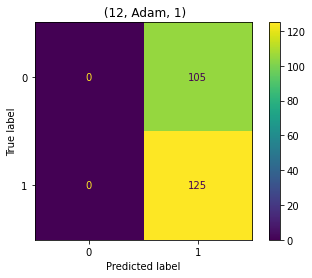

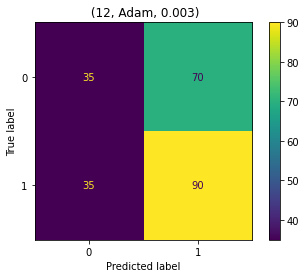

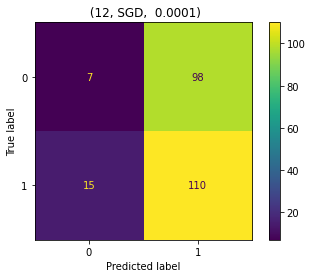

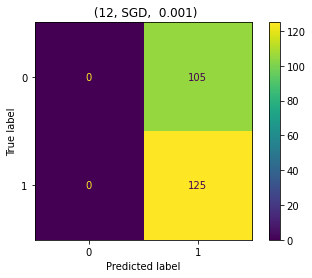

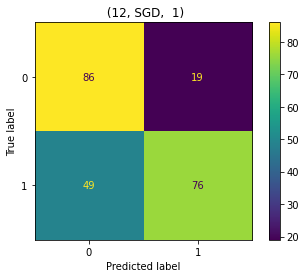

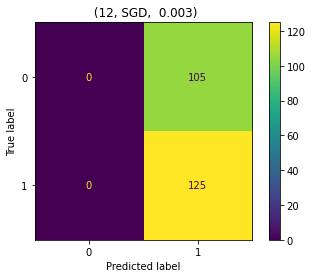

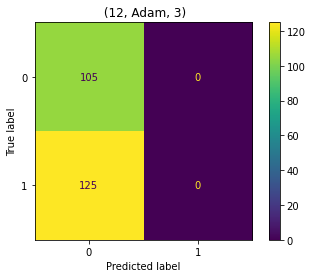

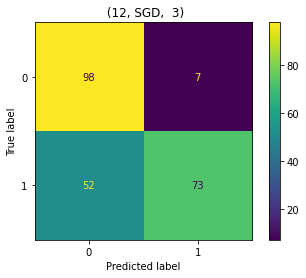

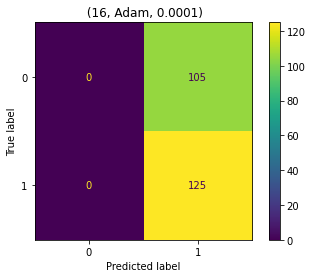

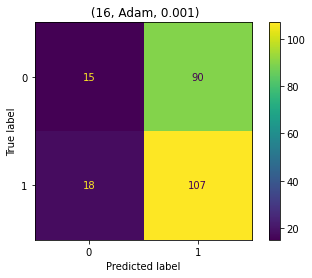

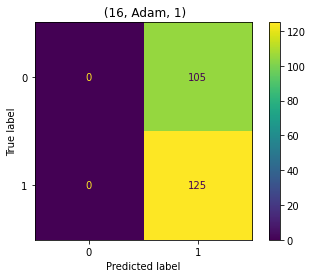

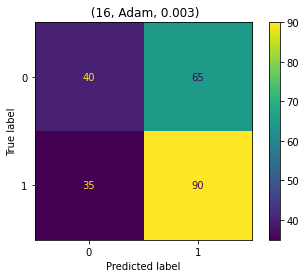

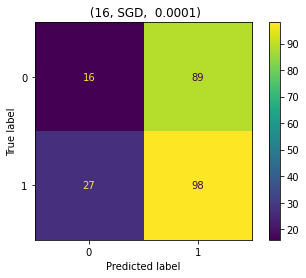

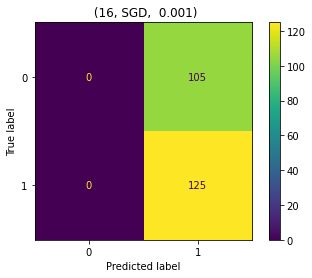

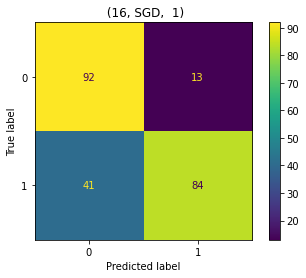

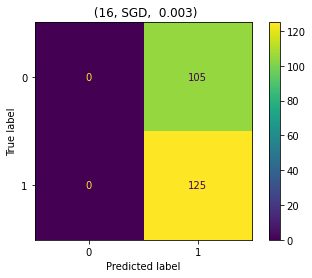

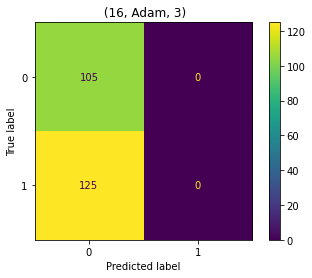

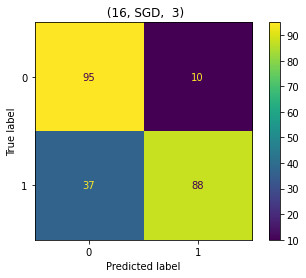

In [ ]:
display_confusion_matrix(y_test, tf.round(y_preds_0_4), " (4, Adam, 0.0001)")
display_confusion_matrix(y_test, tf.round(y_preds_1_4), " (4, Adam, 0.001)")
display_confusion_matrix(y_test, tf.round(y_preds_2_4), " (4, Adam, 1)")
display_confusion_matrix(y_test, tf.round(y_preds_3_4), " (4, Adam, 0.003)")
display_confusion_matrix(y_test, tf.round(y_preds_4_4), " (4, SGD,  0.0001)")
display_confusion_matrix(y_test, tf.round(y_preds_5_4), " (4, SGD,  0.001)")
display_confusion_matrix(y_test, tf.round(y_preds_6_4), " (4, SGD,  1)")
display_confusion_matrix(y_test, tf.round(y_preds_7_4), " (4, SGD,  0.003)")
display_confusion_matrix(y_test, tf.round(y_preds_8_4), " (4, Adam, 3)")
display_confusion_matrix(y_test, tf.round(y_preds_9_4), " (4, SGD,  3)")
                                                         
display_confusion_matrix(y_test, tf.round(y_preds_0_8), " (8, Adam, 0.0001)")
display_confusion_matrix(y_test, tf.round(y_preds_1_8), " (8, Adam, 0.001)")
display_confusion_matrix(y_test, tf.round(y_preds_2_8), " (8, Adam, 1)")
display_confusion_matrix(y_test, tf.round(y_preds_3_8), " (8, Adam, 0.003)")
display_confusion_matrix(y_test, tf.round(y_preds_4_8), " (8, SGD,  0.0001)")
display_confusion_matrix(y_test, tf.round(y_preds_5_8), " (8, SGD,  0.001)")
display_confusion_matrix(y_test, tf.round(y_preds_6_8), " (8, SGD,  1)")
display_confusion_matrix(y_test, tf.round(y_preds_7_8), " (8, SGD,  0.003)")
display_confusion_matrix(y_test, tf.round(y_preds_8_8), " (8, Adam, 3)")
display_confusion_matrix(y_test, tf.round(y_preds_9_8), " (8, SGD,  3)")

display_confusion_matrix(y_test, tf.round(y_preds_0_12), " (12, Adam, 0.0001)")
display_confusion_matrix(y_test, tf.round(y_preds_1_12), " (12, Adam, 0.001)")
display_confusion_matrix(y_test, tf.round(y_preds_2_12), " (12, Adam, 1)")
display_confusion_matrix(y_test, tf.round(y_preds_3_12), " (12, Adam, 0.003)")
display_confusion_matrix(y_test, tf.round(y_preds_4_12), " (12, SGD,  0.0001)")
display_confusion_matrix(y_test, tf.round(y_preds_5_12), " (12, SGD,  0.001)")
display_confusion_matrix(y_test, tf.round(y_preds_6_12), " (12, SGD,  1)")
display_confusion_matrix(y_test, tf.round(y_preds_7_12), " (12, SGD,  0.003)")
display_confusion_matrix(y_test, tf.round(y_preds_8_12), " (12, Adam, 3)")
display_confusion_matrix(y_test, tf.round(y_preds_9_12), " (12, SGD,  3)")
                                                          
display_confusion_matrix(y_test, tf.round(y_preds_0_16), " (16, Adam, 0.0001)")
display_confusion_matrix(y_test, tf.round(y_preds_1_16), " (16, Adam, 0.001)")
display_confusion_matrix(y_test, tf.round(y_preds_2_16), " (16, Adam, 1)")
display_confusion_matrix(y_test, tf.round(y_preds_3_16), " (16, Adam, 0.003)")
display_confusion_matrix(y_test, tf.round(y_preds_4_16), " (16, SGD,  0.0001)")
display_confusion_matrix(y_test, tf.round(y_preds_5_16), " (16, SGD,  0.001)")
display_confusion_matrix(y_test, tf.round(y_preds_6_16), " (16, SGD,  1)")
display_confusion_matrix(y_test, tf.round(y_preds_7_16), " (16, SGD,  0.003)")
display_confusion_matrix(y_test, tf.round(y_preds_8_16), " (16, Adam, 3)")
display_confusion_matrix(y_test, tf.round(y_preds_9_16), " (16, SGD,  3)")

# CONCLUSION FOR SINGLE LAYER
After various execution of epochs & different optimizer & learning rate we have observed.  
1. Learning rate is crucial part with all optimizer and epochs
2. This is not necessary that by increasing number of epochs only, we will get better accuracy in the model.
3. Combination of optimizers, learning rate and epochs impacts the model accuracy.
4. So far, it is observed for single layer that model with configuration **Nodes: 16, optimizer: SGD, learning rate: 3** is giving best **ACCURACY**.


Although, the study done is limited but if we continue the same pattern we can get more better accuracy in model. The pattern which needs to be followed to increase the accuracy for single layer is as follows:
* Increase no. of epochs
* change in learning rate
* change in optimizers





**Display confusion matrix of final Deployable model of single layer**

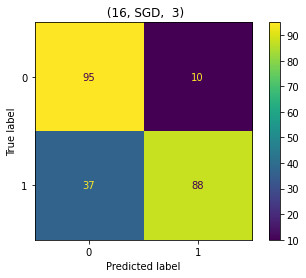

In [ ]:
display_confusion_matrix(y_test, tf.round(y_preds_9_16), " (16, SGD,  3)")

**Display classification report of final Deployable model of single layer**

In [ ]:
#Refer: https://www.py4u.net/discuss/211558
#Classification Report of final Deployable Mocel
from sklearn.metrics import classification_report
import pandas as pd
df = pd.DataFrame(classification_report(y_test, 
                                        tf.round(y_preds_9_16), digits=2,
                                        output_dict=True)).T

df['support'] = df.support.apply(int)

df.style.background_gradient(cmap='viridis',
                            subset=pd.IndexSlice['0':'9', :'f1-score'])

# Train Double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) 

In [ ]:
def double_layer_network(layer1, layer2, opt, lr):
  print("Performing for:", layer1, layer2, opt, lr)

  # Set random seed
  tf.random.set_seed(42)

  # Replicate original model
  model = tf.keras.Sequential([
    ## layer 1 with "count" hidden nodes
    tf.keras.layers.Dense(layer1, activation="relu", input_shape=(2,)),
    
    ## layer 2 with "count" hidden nodes
    tf.keras.layers.Dense(layer2, activation="relu"),

    ##output layer with binary clasification
    tf.keras.layers.Dense(1, activation="sigmoid") 
  ])

  if (opt == "Adam"):
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
  else:
    optimizer = tf.keras.optimizers.SGD(learning_rate=lr)

  # Compile the model #tf.keras.optimizers.Adam(learning_rate=0.003), 
  model.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=optimizer, 
                metrics=["accuracy"])

  # Fit the model
  history = model.fit(X_train, y_train, epochs=100, verbose=0)

  # Evaluate model on the test dataset
  eval = model.evaluate(X_test, y_test)

  return history, model, eval

Perform evaluation for double layer with below config
* Layer 1 having 4 nodes and layer 2 is having 8 nodes
* Adam & SGD both the optimizers are used
* Various Learning rates are provided to evalute the model

In [ ]:
hist0_4_8, model0_4_8, eval0_4_8 = double_layer_network(4, 8, "Adam", 0.0001)
hist1_4_8, model1_4_8, eval1_4_8 = double_layer_network(4, 8, "Adam", 0.001)
hist2_4_8, model2_4_8, eval2_4_8 = double_layer_network(4, 8, "Adam", 1)
hist3_4_8, model3_4_8, eval3_4_8 = double_layer_network(4, 8, "Adam", 0.003)
hist4_4_8, model4_4_8, eval4_4_8 = double_layer_network(4, 8, "SGD", 0.0001)
hist5_4_8, model5_4_8, eval5_4_8 = double_layer_network(4, 8, "SGD", 0.001)
hist6_4_8, model6_4_8, eval6_4_8 = double_layer_network(4, 8, "SGD", 1)
hist7_4_8, model7_4_8, eval7_4_8 = double_layer_network(4, 8, "SGD", 0.003)

Performing for: 4 8 Adam 0.0001
8/8 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5174
Performing for: 4 8 Adam 0.001
8/8 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.5696
Performing for: 4 8 Adam 1
8/8 [==============================] - 0s 2ms/step - loss: 0.7078 - accuracy: 0.5435
Performing for: 4 8 Adam 0.003
8/8 [==============================] - 0s 2ms/step - loss: 0.4422 - accuracy: 0.7913
Performing for: 4 8 SGD 0.0001
8/8 [==============================] - 0s 2ms/step - loss: 0.7415 - accuracy: 0.4217
Performing for: 4 8 SGD 0.001
8/8 [==============================] - 0s 2ms/step - loss: 0.7028 - accuracy: 0.4565
Performing for: 4 8 SGD 1
8/8 [==============================] - 0s 2ms/step - loss: 0.5101 - accuracy: 0.7130
Performing for: 4 8 SGD 0.003
8/8 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.5435


**Note** we can observe in above evaluation that best accuracy is coming for the configuration is **L1:4, L2:8, optimizer: Adam & Learning rate: 0.003 for 100 epochs**. 

Perform evaluation for double layer with below config
* Layer 1 having 8 nodes and layer 2 is having 4 nodes
* Adam & SGD both the optimizers are used
* Various Learning rates are provided to evalute the model

In [ ]:
hist0_8_4, model0_8_4, eval0_8_4 = double_layer_network(8, 4, "Adam", 0.0001)
hist1_8_4, model1_8_4, eval1_8_4 = double_layer_network(8, 4, "Adam", 0.001)
hist2_8_4, model2_8_4, eval2_8_4 = double_layer_network(8, 4, "Adam", 1)
hist3_8_4, model3_8_4, eval3_8_4 = double_layer_network(8, 4, "Adam", 0.003)
hist4_8_4, model4_8_4, eval4_8_4 = double_layer_network(8, 4, "SGD", 0.0001)
hist5_8_4, model5_8_4, eval5_8_4 = double_layer_network(8, 4, "SGD", 0.001)
hist6_8_4, model6_8_4, eval6_8_4 = double_layer_network(8, 4, "SGD", 1)
hist7_8_4, model7_8_4, eval7_8_4 = double_layer_network(8, 4, "SGD", 0.003)

Performing for: 8 4 Adam 0.0001
8/8 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5435
Performing for: 8 4 Adam 0.001
8/8 [==============================] - 0s 2ms/step - loss: 0.6486 - accuracy: 0.5522
Performing for: 8 4 Adam 1
8/8 [==============================] - 0s 2ms/step - loss: 0.7078 - accuracy: 0.5435
Performing for: 8 4 Adam 0.003
8/8 [==============================] - 0s 2ms/step - loss: 0.6057 - accuracy: 0.5739
Performing for: 8 4 SGD 0.0001
8/8 [==============================] - 0s 2ms/step - loss: 0.7054 - accuracy: 0.4870
Performing for: 8 4 SGD 0.001
8/8 [==============================] - 2s 2ms/step - loss: 0.6955 - accuracy: 0.4391
Performing for: 8 4 SGD 1
8/8 [==============================] - 0s 2ms/step - loss: 0.4712 - accuracy: 0.7522
Performing for: 8 4 SGD 0.003
8/8 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.5435


**Note** we can observe in above evaluation that best **ACCURACY** is coming for the configuration is ***L1:8, L2:4, optimizer: SGD & Learning rate: 3 for 100 epochs***. 

Perform evaluation for double layer with below config
* Layer 1 having 4 nodes and layer 2 is having 12 nodes & layer 1 having 12 Nodes and Layer 2 having 4 nodes
* Adam & SGD both the optimizers are used
* Various Learning rates are provided to evalute the model

In [ ]:
hist0_4_12, model0_4_12, eval0_4_12 = double_layer_network(4, 12, "Adam", 0.0001)
hist1_4_12, model1_4_12, eval1_4_12 = double_layer_network(4, 12, "Adam", 0.001)
hist2_4_12, model2_4_12, eval2_4_12 = double_layer_network(4, 12, "Adam", 1)
hist3_4_12, model3_4_12, eval3_4_12 = double_layer_network(4, 12, "Adam", 0.003)
hist4_4_12, model4_4_12, eval4_4_12 = double_layer_network(4, 12, "SGD",  0.0001)
hist5_4_12, model5_4_12, eval5_4_12 = double_layer_network(4, 12, "SGD",  0.001)
hist6_4_12, model6_4_12, eval6_4_12 = double_layer_network(4, 12, "SGD",  1)
hist7_4_12, model7_4_12, eval7_4_12 = double_layer_network(4, 12, "SGD",  0.003)


hist0_12_4, model0_12_4, eval0_12_4 = double_layer_network(12, 4, "Adam", 0.0001)
hist1_12_4, model1_12_4, eval1_12_4 = double_layer_network(12, 4, "Adam", 0.001)
hist2_12_4, model2_12_4, eval2_12_4 = double_layer_network(12, 4, "Adam", 1)
hist3_12_4, model3_12_4, eval3_12_4 = double_layer_network(12, 4, "Adam", 0.003)
hist4_12_4, model4_12_4, eval4_12_4 = double_layer_network(12, 4, "SGD",  0.0001)
hist5_12_4, model5_12_4, eval5_12_4 = double_layer_network(12, 4, "SGD",  0.001)
hist6_12_4, model6_12_4, eval6_12_4 = double_layer_network(12, 4, "SGD",  1)
hist7_12_4, model7_12_4, eval7_12_4 = double_layer_network(12, 4, "SGD",  0.003)

Performing for: 4 12 Adam 0.0001
8/8 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.5435
Performing for: 4 12 Adam 0.001
8/8 [==============================] - 0s 3ms/step - loss: 0.6398 - accuracy: 0.5783
Performing for: 4 12 Adam 1
8/8 [==============================] - 0s 2ms/step - loss: 0.7078 - accuracy: 0.5435
Performing for: 4 12 Adam 0.003
8/8 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.7957
Performing for: 4 12 SGD 0.0001
8/8 [==============================] - 0s 2ms/step - loss: 0.7408 - accuracy: 0.4478
Performing for: 4 12 SGD 0.001
8/8 [==============================] - 0s 3ms/step - loss: 0.7036 - accuracy: 0.4087
Performing for: 4 12 SGD 1
8/8 [==============================] - 0s 3ms/step - loss: 0.5878 - accuracy: 0.6696
Performing for: 4 12 SGD 0.003
8/8 [==============================] - 0s 3ms/step - loss: 0.6980 - accuracy: 0.5435
Performing for: 12 4 Adam 0.0001
8/8 [==============================] - 0s

**Note** we can observe in above evaluation that best **ACCURACY** is coming for the configuration is ***L1:12, L2:4, optimizer: Adam & Learning rate: 0.003 for 100 epochs.***

Perform evaluation for double layer with below config

* Layer 1 having 4 nodes and layer 2 is having 16 nodes & Layer 1 having 16 Nodes and Layer 2 having 4 nodes
* Adam & SGD both the optimizers are used
* Various Learning rates are provided to evalute the model



In [ ]:
hist0_4_16, model0_4_16, eval0_4_16 = double_layer_network(4, 16, "Adam", 0.0001)
hist1_4_16, model1_4_16, eval1_4_16 = double_layer_network(4, 16, "Adam", 0.001)
hist2_4_16, model2_4_16, eval2_4_16 = double_layer_network(4, 16, "Adam", 1)
hist3_4_16, model3_4_16, eval3_4_16 = double_layer_network(4, 16, "Adam", 0.003)
hist4_4_16, model4_4_16, eval4_4_16 = double_layer_network(4, 16, "SGD",  0.0001)
hist5_4_16, model5_4_16, eval5_4_16 = double_layer_network(4, 16, "SGD",  0.001)
hist6_4_16, model6_4_16, eval6_4_16 = double_layer_network(4, 16, "SGD",  1)
hist7_4_16, model7_4_16, eval7_4_16 = double_layer_network(4, 16, "SGD",  0.003)

hist0_16_4, model0_16_4, eval0_16_4 = double_layer_network(16, 4, "Adam", 0.0001)
hist1_16_4, model1_16_4, eval1_16_4 = double_layer_network(16, 4, "Adam", 0.001)
hist2_16_4, model2_16_4, eval2_16_4 = double_layer_network(16, 4, "Adam", 1)
hist3_16_4, model3_16_4, eval3_16_4 = double_layer_network(16, 4, "Adam", 0.003)
hist4_16_4, model4_16_4, eval4_16_4 = double_layer_network(16, 4, "SGD",  0.0001)
hist5_16_4, model5_16_4, eval5_16_4 = double_layer_network(16, 4, "SGD",  0.001)
hist6_16_4, model6_16_4, eval6_16_4 = double_layer_network(16, 4, "SGD",  1)
hist7_16_4, model7_16_4, eval7_16_4 = double_layer_network(16, 4, "SGD",  0.003)

Performing for: 4 16 Adam 0.0001
8/8 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5435
Performing for: 4 16 Adam 0.001
8/8 [==============================] - 0s 2ms/step - loss: 0.6526 - accuracy: 0.5652
Performing for: 4 16 Adam 1
8/8 [==============================] - 0s 3ms/step - loss: 0.7078 - accuracy: 0.5435
Performing for: 4 16 Adam 0.003
8/8 [==============================] - 0s 2ms/step - loss: 0.4286 - accuracy: 0.7870
Performing for: 4 16 SGD 0.0001
8/8 [==============================] - 0s 3ms/step - loss: 0.7225 - accuracy: 0.4478
Performing for: 4 16 SGD 0.001
8/8 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.4696
Performing for: 4 16 SGD 1
8/8 [==============================] - 0s 2ms/step - loss: 0.5168 - accuracy: 0.7087
Performing for: 4 16 SGD 0.003
8/8 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5435
Performing for: 16 4 Adam 0.0001
8/8 [==============================] - 0s

**Note** we can observe in above evaluation that best **ACCURACY** is coming for the configuration is ***L1:16, L2:4, optimizer: SGD & Learning rate: 1 for 100 epochs***. Although optimizer:Adam with learning rate:0.003 is also giving better result.

Perform evaluation for double layer with below config

* Layer 1 having 8 nodes and layer 2 is having 12 nodes & Layer 1 having 12 nodes and Layer 2 having 8 Nodes
* Adam & SGD both the optimizers are used
* Various Learning rates are provided to evalute the model

In [ ]:
hist0_8_12, model0_8_12, eval0_8_12 = double_layer_network(8, 12, "Adam", 0.0001)
hist1_8_12, model1_8_12, eval1_8_12 = double_layer_network(8, 12, "Adam", 0.001)
hist2_8_12, model2_8_12, eval2_8_12 = double_layer_network(8, 12, "Adam", 1)
hist3_8_12, model3_8_12, eval3_8_12 = double_layer_network(8, 12, "Adam", 0.003)
hist4_8_12, model4_8_12, eval4_8_12 = double_layer_network(8, 12, "SGD",  0.0001)
hist5_8_12, model5_8_12, eval5_8_12 = double_layer_network(8, 12, "SGD",  0.001)
hist6_8_12, model6_8_12, eval6_8_12 = double_layer_network(8, 12, "SGD",  1)
hist7_8_12, model7_8_12, eval7_8_12 = double_layer_network(8, 12, "SGD",  0.003)

hist0_12_8, model0_12_8, eval0_12_8 = double_layer_network(12, 8, "Adam", 0.0001)
hist1_12_8, model1_12_8, eval1_12_8 = double_layer_network(12, 8, "Adam", 0.001)
hist2_12_8, model2_12_8, eval2_12_8 = double_layer_network(12, 8, "Adam", 1)
hist3_12_8, model3_12_8, eval3_12_8 = double_layer_network(12, 8, "Adam", 0.003)
hist4_12_8, model4_12_8, eval4_12_8 = double_layer_network(12, 8, "SGD",  0.0001)
hist5_12_8, model5_12_8, eval5_12_8 = double_layer_network(12, 8, "SGD",  0.001)
hist6_12_8, model6_12_8, eval6_12_8 = double_layer_network(12, 8, "SGD",  1)
hist7_12_8, model7_12_8, eval7_12_8 = double_layer_network(12, 8, "SGD",  0.003)

Performing for: 8 12 Adam 0.0001
8/8 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5435
Performing for: 8 12 Adam 0.001
8/8 [==============================] - 0s 2ms/step - loss: 0.6263 - accuracy: 0.5435
Performing for: 8 12 Adam 1
8/8 [==============================] - 0s 2ms/step - loss: 0.7078 - accuracy: 0.5435
Performing for: 8 12 Adam 0.003
8/8 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8087
Performing for: 8 12 SGD 0.0001
8/8 [==============================] - 0s 3ms/step - loss: 0.7284 - accuracy: 0.4261
Performing for: 8 12 SGD 0.001
8/8 [==============================] - 0s 3ms/step - loss: 0.7019 - accuracy: 0.4478
Performing for: 8 12 SGD 1
8/8 [==============================] - 0s 3ms/step - loss: 0.4008 - accuracy: 0.8348
Performing for: 8 12 SGD 0.003
8/8 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.5435
Performing for: 12 8 Adam 0.0001
8/8 [==============================] - 0s

**Note** we can observe in above evaluation that best **ACCURACY** is coming for the configuration is ***L1:8, L2:12, optimizer: SGD & Learning rate: 1 for 100 epochs.*** Although optimizer:Adam with learning rate:0.003 is also giving very good result.

Perform evaluation for double layer with below config

* Layer 1 having 8 nodes and layer 2 is having 16 nodes & Layer 1 having 16 Nodes & Layer 2 having 8 Nodes
* Adam & SGD both the optimizers are used
* Various Learning rates are provided to evalute the model



In [ ]:
hist0_8_16, model0_8_16, eval0_8_16 = double_layer_network(8, 16, "Adam", 0.0001)
hist1_8_16, model1_8_16, eval1_8_16 = double_layer_network(8, 16, "Adam", 0.001)
hist2_8_16, model2_8_16, eval2_8_16 = double_layer_network(8, 16, "Adam", 1)
hist3_8_16, model3_8_16, eval3_8_16 = double_layer_network(8, 16, "Adam", 0.003)
hist4_8_16, model4_8_16, eval4_8_16 = double_layer_network(8, 16, "SGD",  0.0001)
hist5_8_16, model5_8_16, eval5_8_16 = double_layer_network(8, 16, "SGD",  0.001)
hist6_8_16, model6_8_16, eval6_8_16 = double_layer_network(8, 16, "SGD",  1)
hist7_8_16, model7_8_16, eval7_8_16 = double_layer_network(8, 16, "SGD",  0.003)

hist0_16_8, model0_16_8, eval0_16_8 = double_layer_network(16, 8, "Adam", 0.0001)
hist1_16_8, model1_16_8, eval1_16_8 = double_layer_network(16, 8, "Adam", 0.001)
hist2_16_8, model2_16_8, eval2_16_8 = double_layer_network(16, 8, "Adam", 1)
hist3_16_8, model3_16_8, eval3_16_8 = double_layer_network(16, 8, "Adam", 0.003)
hist4_16_8, model4_16_8, eval4_16_8 = double_layer_network(16, 8, "SGD",  0.0001)
hist5_16_8, model5_16_8, eval5_16_8 = double_layer_network(16, 8, "SGD",  0.001)
hist6_16_8, model6_16_8, eval6_16_8 = double_layer_network(16, 8, "SGD",  1)
hist7_16_8, model7_16_8, eval7_16_8 = double_layer_network(16, 8, "SGD",  0.003)

Performing for: 8 16 Adam 0.0001
8/8 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.5435
Performing for: 8 16 Adam 0.001
8/8 [==============================] - 0s 2ms/step - loss: 0.6108 - accuracy: 0.5435
Performing for: 8 16 Adam 1
8/8 [==============================] - 0s 3ms/step - loss: 0.7078 - accuracy: 0.5435
Performing for: 8 16 Adam 0.003
8/8 [==============================] - 0s 2ms/step - loss: 0.3828 - accuracy: 0.8130
Performing for: 8 16 SGD 0.0001
8/8 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.4957
Performing for: 8 16 SGD 0.001
8/8 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5304
Performing for: 8 16 SGD 1
8/8 [==============================] - 0s 2ms/step - loss: 0.2807 - accuracy: 0.8652
Performing for: 8 16 SGD 0.003
8/8 [==============================] - 0s 3ms/step - loss: 0.6856 - accuracy: 0.5435
Performing for: 16 8 Adam 0.0001
8/8 [==============================] - 0s

**Note** we can observe in above evaluation that best **ACCURACY** is coming for the configuration is ***L1:8, L2:16, optimizer: SGD & Learning rate: 1 for 100 epochs.*** 

Perform evaluation for double layer with below config

* Layer 1 having 12 nodes and layer 2 is having 16 nodes & Layer 1 having 16 nodes and Layer 2 having 12 Nodes
* Adam & SGD both the optimizers are used
* Various Learning rates are provided to evalute the model

In [ ]:
hist0_12_16, model0_12_16, eval0_12_16 = double_layer_network(12, 16, "Adam", 0.0001)
hist1_12_16, model1_12_16, eval1_12_16 = double_layer_network(12, 16, "Adam", 0.001)
hist2_12_16, model2_12_16, eval2_12_16 = double_layer_network(12, 16, "Adam", 1)
hist3_12_16, model3_12_16, eval3_12_16 = double_layer_network(12, 16, "Adam", 0.003)
hist4_12_16, model4_12_16, eval4_12_16 = double_layer_network(12, 16, "SGD",  0.0001)
hist5_12_16, model5_12_16, eval5_12_16 = double_layer_network(12, 16, "SGD",  0.001)
hist6_12_16, model6_12_16, eval6_12_16 = double_layer_network(12, 16, "SGD",  1)
hist7_12_16, model7_12_16, eval7_12_16 = double_layer_network(12, 16, "SGD",  0.003)

hist0_16_12, model0_16_12, eval0_16_12 = double_layer_network(16, 12, "Adam", 0.0001)
hist1_16_12, model1_16_12, eval1_16_12 = double_layer_network(16, 12, "Adam", 0.001)
hist2_16_12, model2_16_12, eval2_16_12 = double_layer_network(16, 12, "Adam", 1)
hist3_16_12, model3_16_12, eval3_16_12 = double_layer_network(16, 12, "Adam", 0.003)
hist4_16_12, model4_16_12, eval4_16_12 = double_layer_network(16, 12, "SGD",  0.0001)
hist5_16_12, model5_16_12, eval5_16_12 = double_layer_network(16, 12, "SGD",  0.001)
hist6_16_12, model6_16_12, eval6_16_12 = double_layer_network(16, 12, "SGD",  1)
hist7_16_12, model7_16_12, eval7_16_12 = double_layer_network(16, 12, "SGD",  0.003)

Performing for: 12 16 Adam 0.0001
8/8 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.5435
Performing for: 12 16 Adam 0.001
8/8 [==============================] - 0s 3ms/step - loss: 0.5245 - accuracy: 0.7087
Performing for: 12 16 Adam 1
8/8 [==============================] - 0s 3ms/step - loss: 0.7078 - accuracy: 0.5435
Performing for: 12 16 Adam 0.003
8/8 [==============================] - 0s 2ms/step - loss: 0.2984 - accuracy: 0.8783
Performing for: 12 16 SGD 0.0001
8/8 [==============================] - 0s 2ms/step - loss: 0.7018 - accuracy: 0.4435
Performing for: 12 16 SGD 0.001
8/8 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5435
Performing for: 12 16 SGD 1
8/8 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.8304
Performing for: 12 16 SGD 0.003
8/8 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5435
Performing for: 16 12 Adam 0.0001
8/8 [===========================

**Note** we can observe in above evaluation that best **ACCURACY** is coming for the configuration is ***L1:12, L2:16, optimizer: Adam & Learning rate: 0.003 for 100 epochs.*** Although optimiser: SGD and learning rate: 1 is also giving the better result in terms of accuracy

Now we can observe from the result what best configuration for neural network gives better result. Although, the validation of configuration is limited but giving pretty good result. If we test more by varying number of parameters required to get better result we will have to perform below activities
* Changing the number of epochs
* Change in learning rate
* Change in Hidden Layers 
* Change in count of neurons

### Now, plotting loss accuracy and learning rate with respect to hidden units for double layer for all the combination done above
1. For layer-1 4 nodes & layer-2 8 nodes & vice-versa
2. For layer-1 4 nodes & layer-2 12 nodes & vice-versa
3. For layer-1 4 nodes & layer-2 16 nodes & vice-versa
4. For layer-1 8 nodes & layer-2 12 nodes & vice-versa
5. For layer-1 8 nodes & layer-2 16 nodes & vice-versa
6. For layer-1 12 nodes & layer-2 16 nodes & vice-versa

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

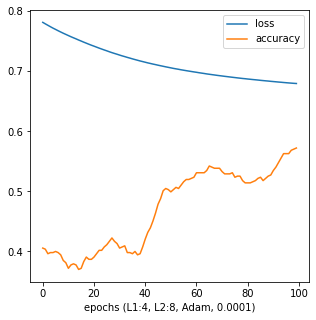

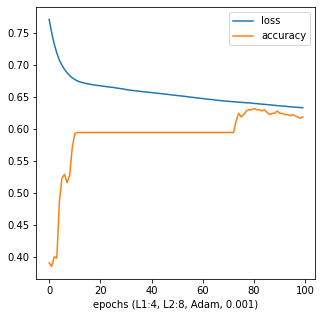

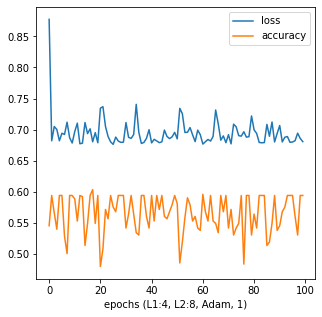

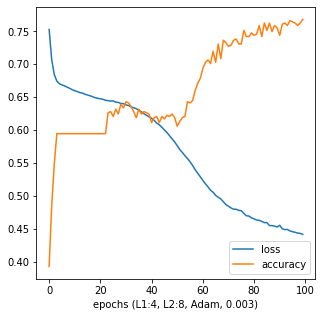

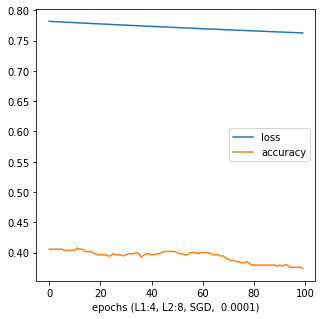

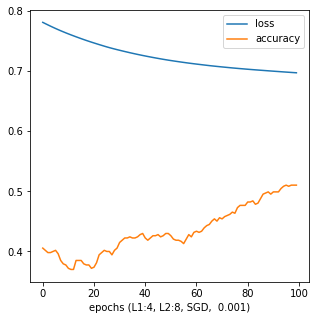

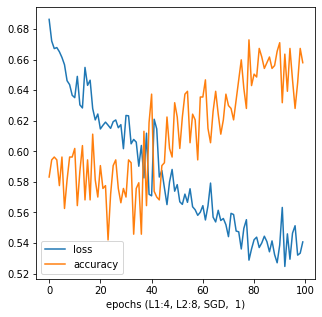

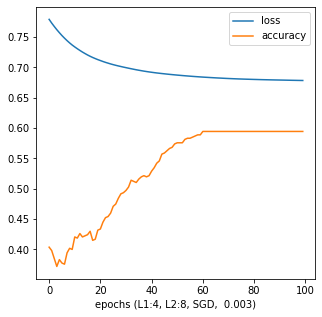

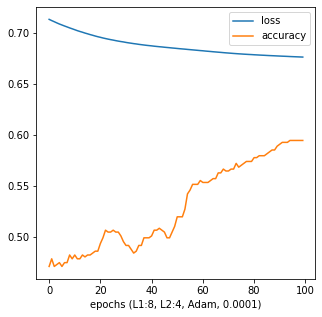

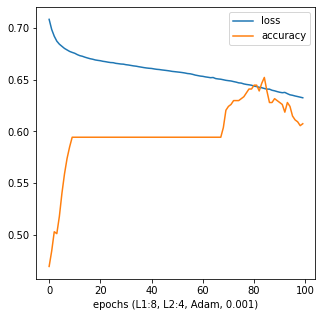

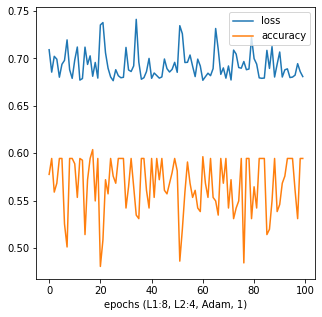

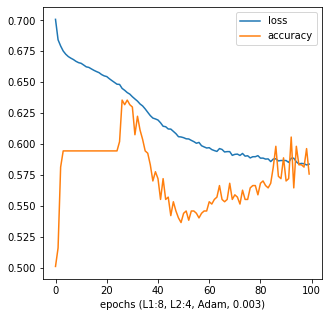

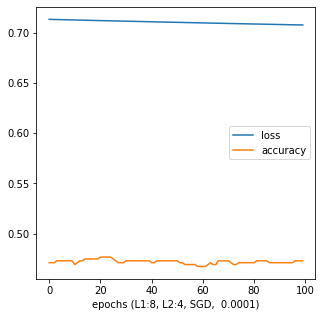

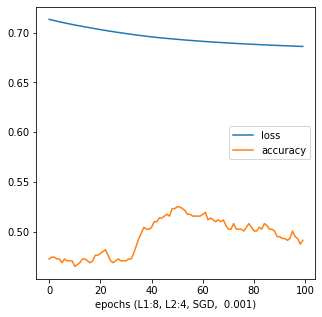

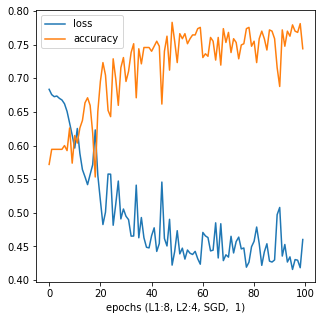

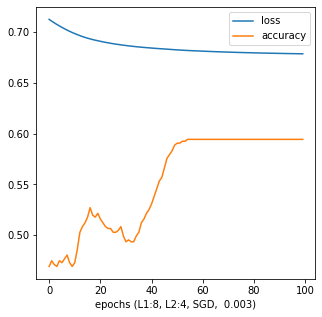

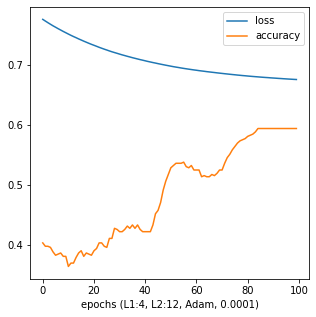

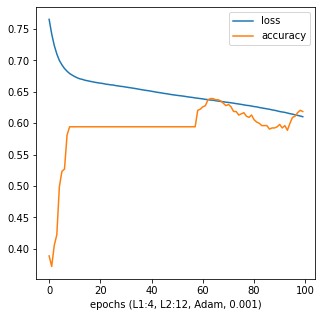

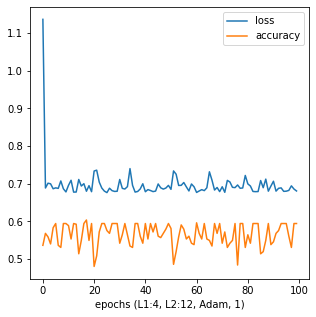

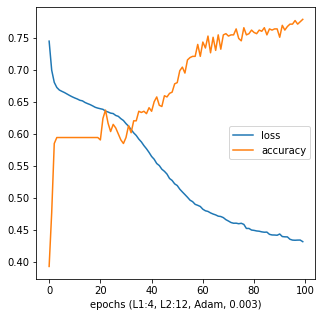

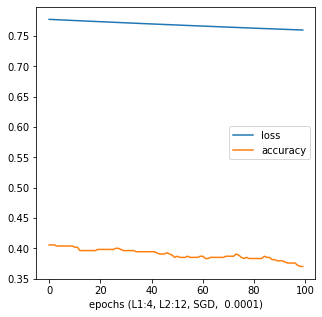

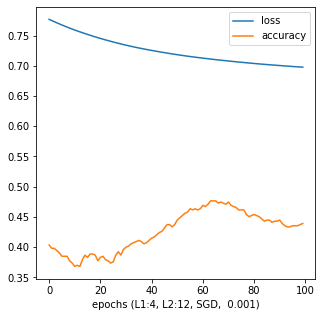

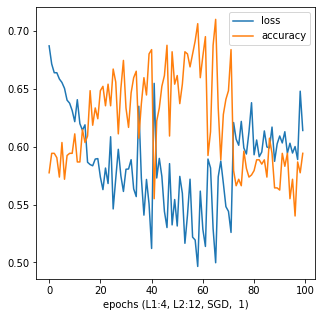

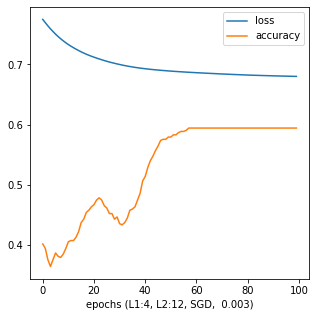

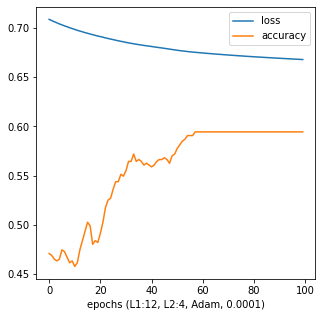

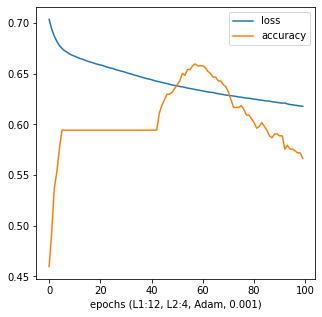

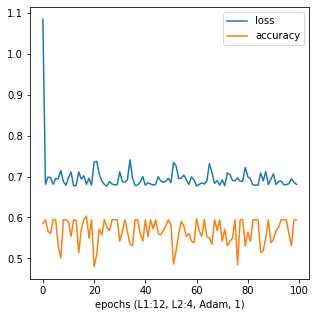

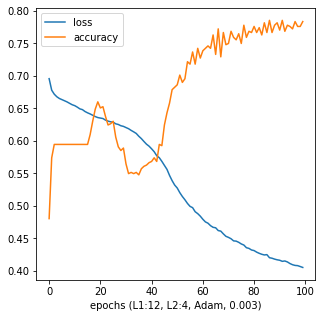

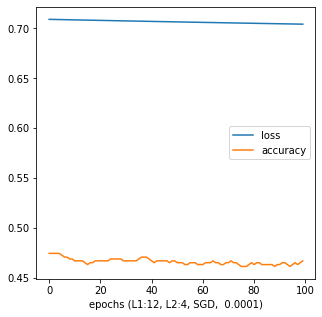

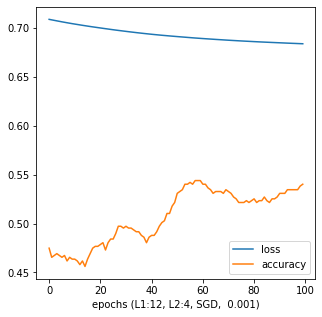

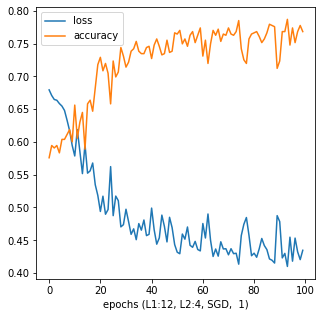

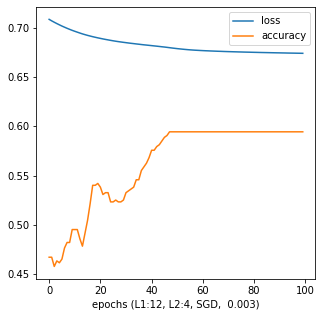

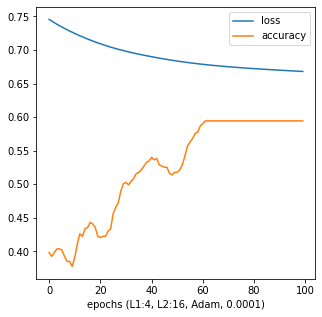

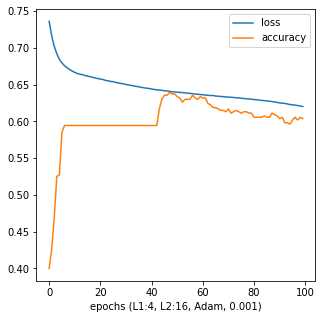

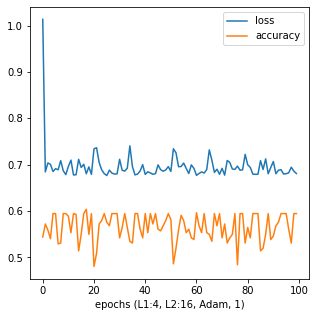

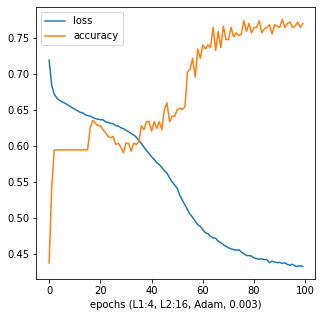

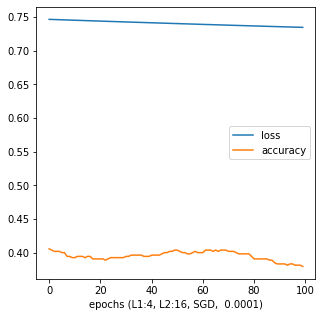

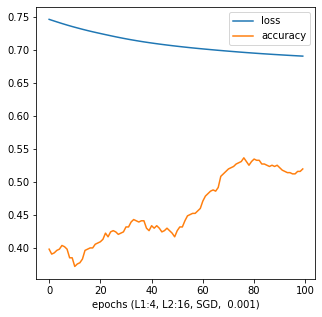

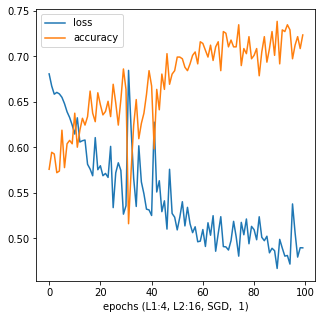

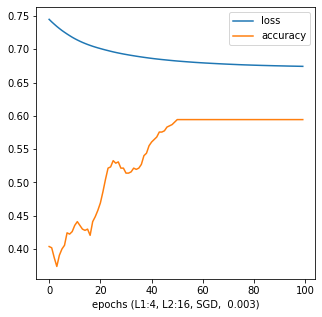

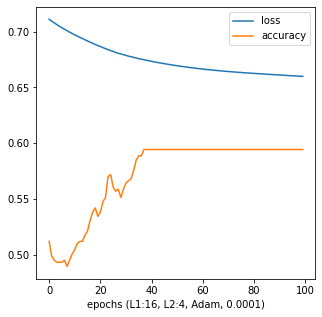

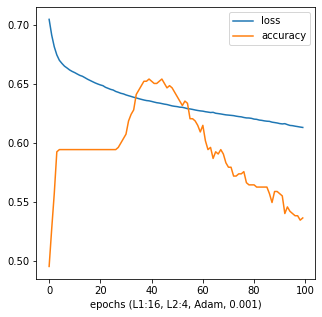

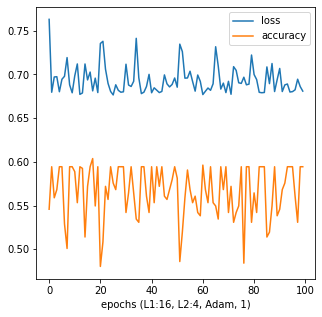

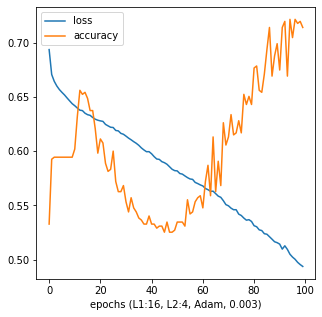

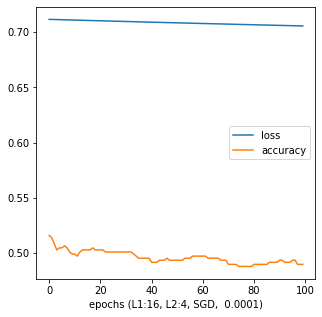

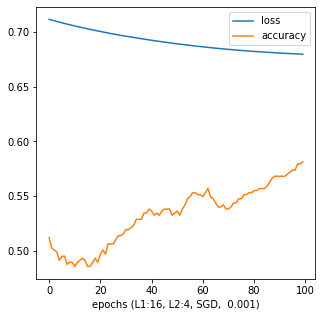

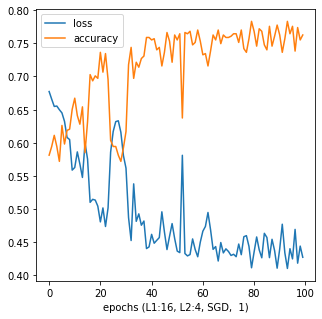

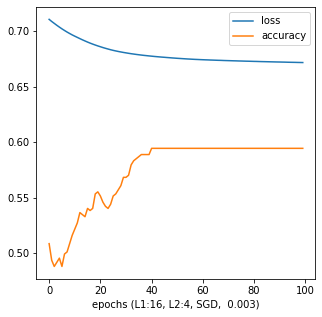

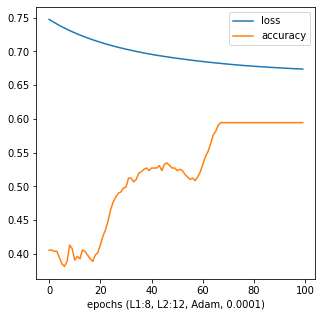

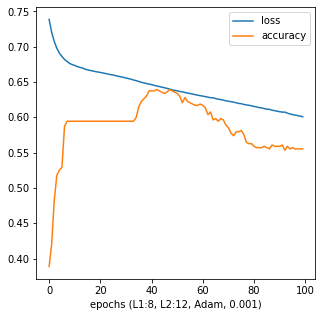

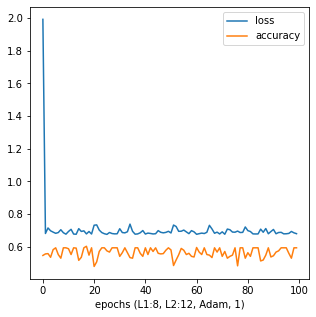

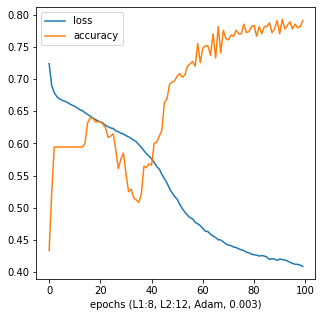

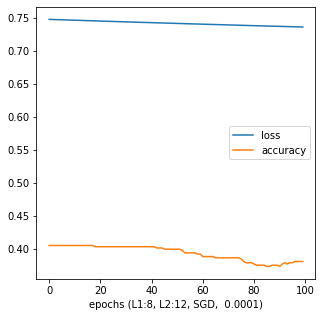

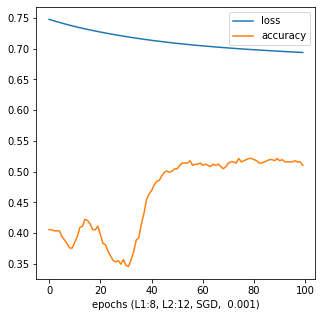

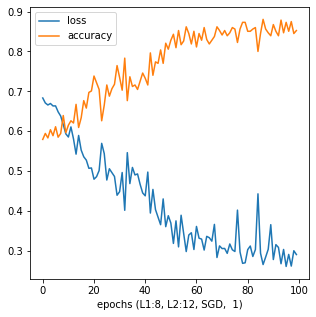

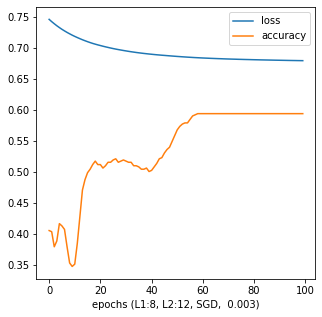

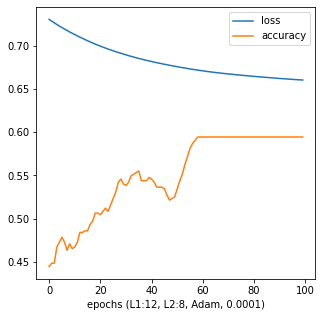

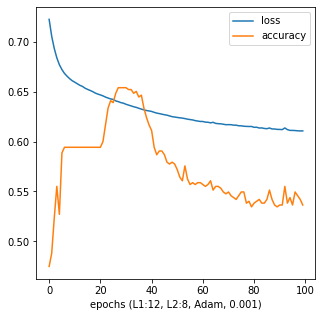

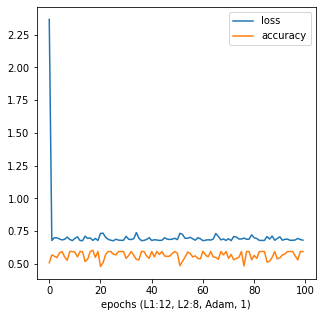

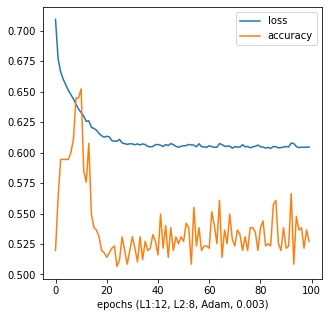

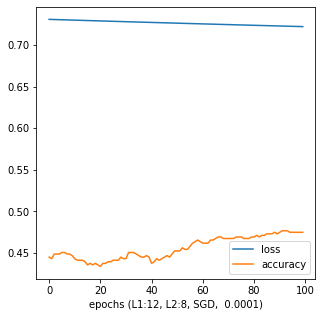

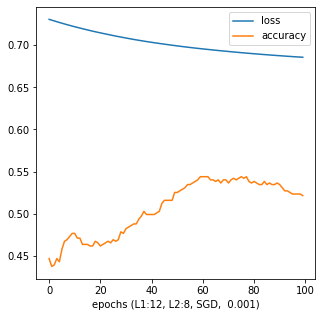

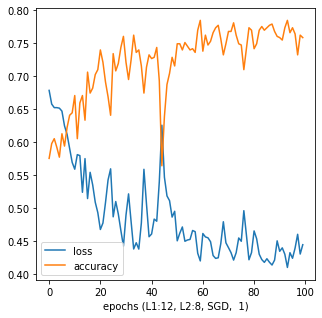

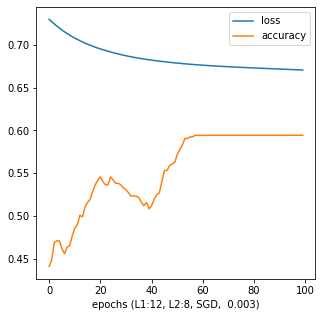

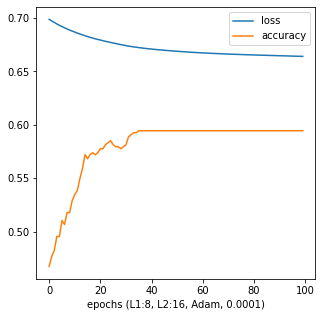

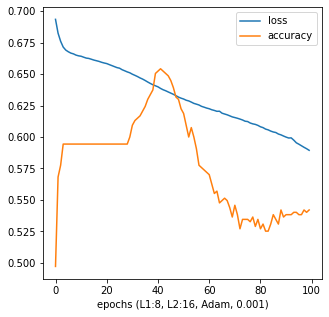

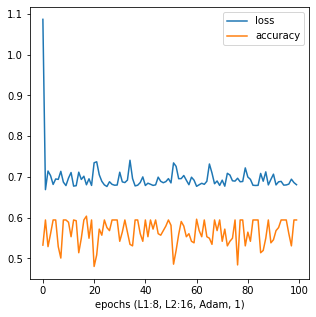

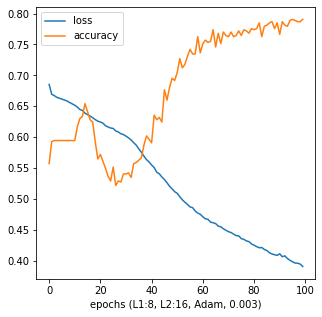

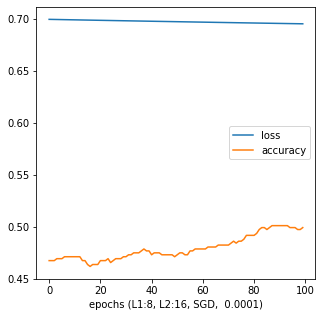

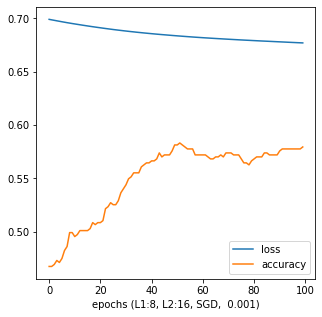

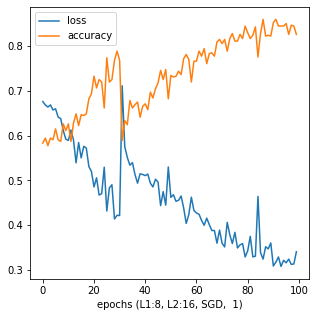

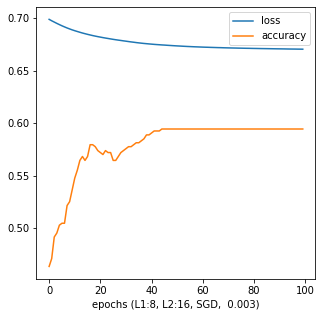

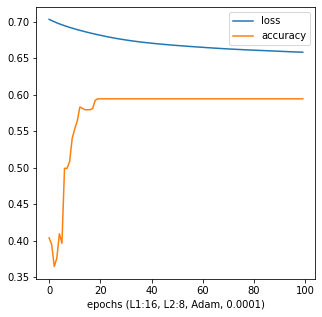

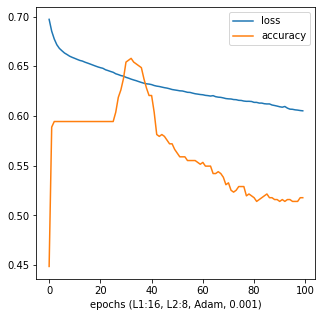

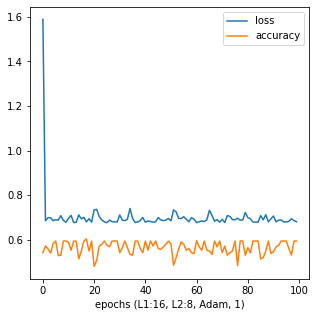

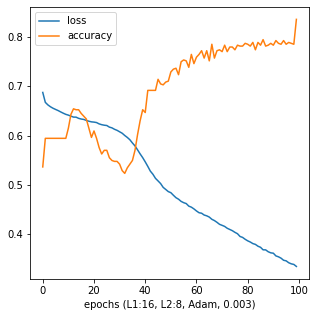

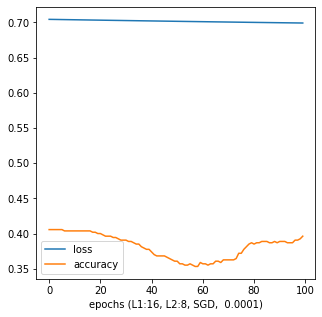

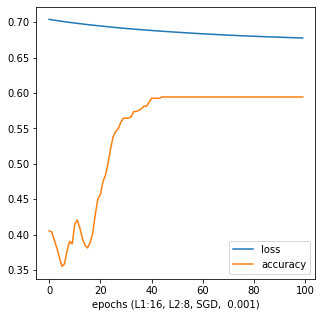

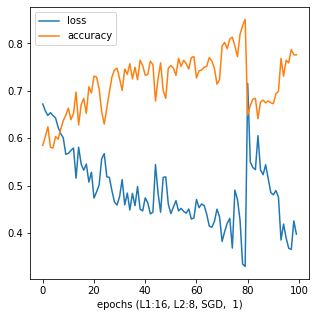

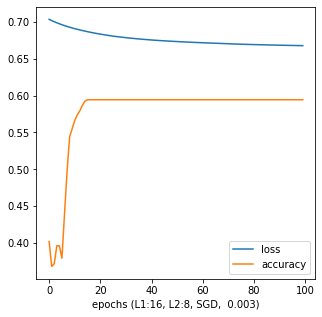

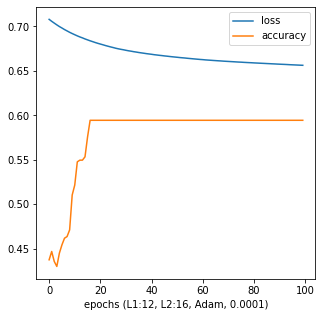

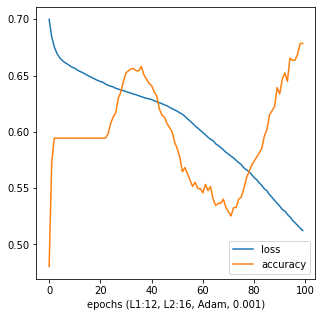

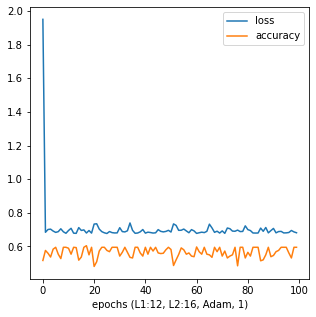

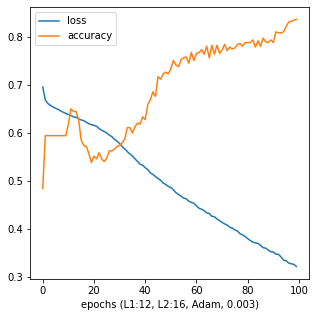

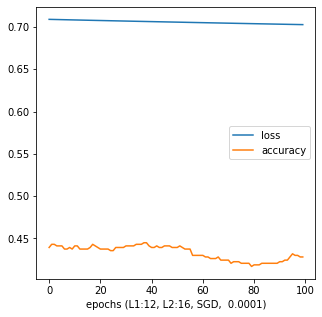

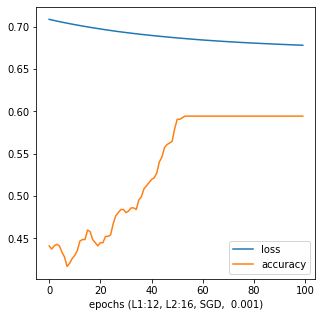

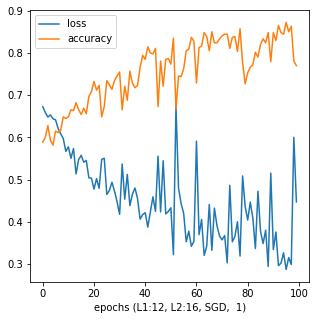

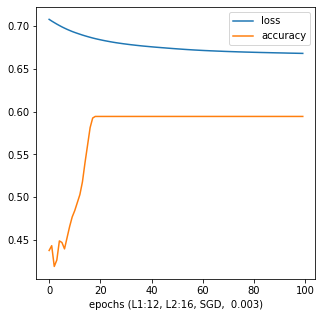

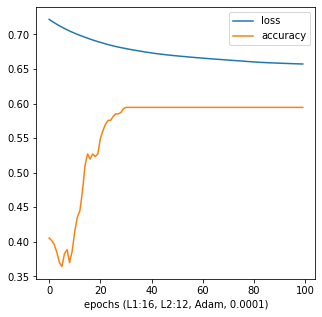

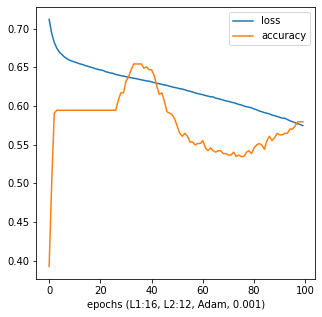

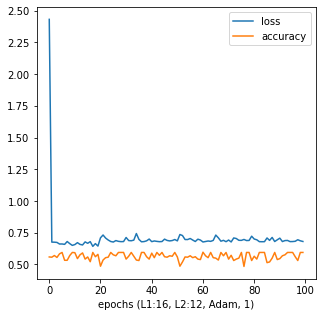

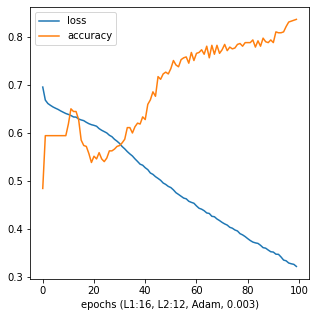

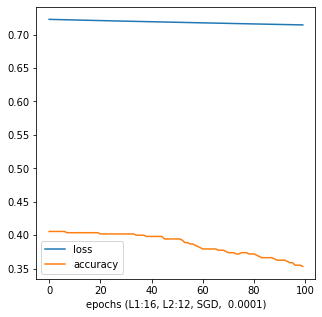

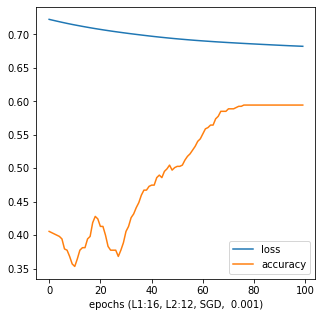

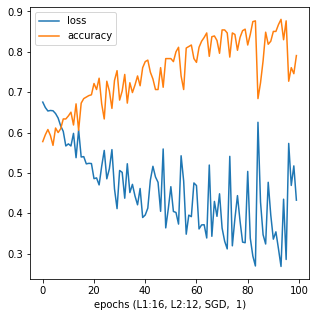

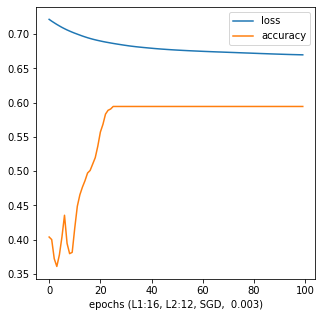

In [ ]:
# Checkout the history of the combination given or as per the problem statement
pd.DataFrame(hist0_4_8.history).plot(figsize=(5,5), xlabel="epochs (L1:4, L2:8, Adam, 0.0001)");
pd.DataFrame(hist1_4_8.history).plot(figsize=(5,5), xlabel="epochs (L1:4, L2:8, Adam, 0.001)");
pd.DataFrame(hist2_4_8.history).plot(figsize=(5,5), xlabel="epochs (L1:4, L2:8, Adam, 1)");
pd.DataFrame(hist3_4_8.history).plot(figsize=(5,5), xlabel="epochs (L1:4, L2:8, Adam, 0.003)");
pd.DataFrame(hist4_4_8.history).plot(figsize=(5,5), xlabel="epochs (L1:4, L2:8, SGD,  0.0001)");
pd.DataFrame(hist5_4_8.history).plot(figsize=(5,5), xlabel="epochs (L1:4, L2:8, SGD,  0.001)");
pd.DataFrame(hist6_4_8.history).plot(figsize=(5,5), xlabel="epochs (L1:4, L2:8, SGD,  1)");
pd.DataFrame(hist7_4_8.history).plot(figsize=(5,5), xlabel="epochs (L1:4, L2:8, SGD,  0.003)");

pd.DataFrame(hist0_8_4.history).plot(figsize=(5,5), xlabel="epochs (L1:8, L2:4, Adam, 0.0001)");
pd.DataFrame(hist1_8_4.history).plot(figsize=(5,5), xlabel="epochs (L1:8, L2:4, Adam, 0.001)");
pd.DataFrame(hist2_8_4.history).plot(figsize=(5,5), xlabel="epochs (L1:8, L2:4, Adam, 1)");
pd.DataFrame(hist3_8_4.history).plot(figsize=(5,5), xlabel="epochs (L1:8, L2:4, Adam, 0.003)");
pd.DataFrame(hist4_8_4.history).plot(figsize=(5,5), xlabel="epochs (L1:8, L2:4, SGD,  0.0001)");
pd.DataFrame(hist5_8_4.history).plot(figsize=(5,5), xlabel="epochs (L1:8, L2:4, SGD,  0.001)");
pd.DataFrame(hist6_8_4.history).plot(figsize=(5,5), xlabel="epochs (L1:8, L2:4, SGD,  1)");
pd.DataFrame(hist7_8_4.history).plot(figsize=(5,5), xlabel="epochs (L1:8, L2:4, SGD,  0.003)");

pd.DataFrame(hist0_4_12.history).plot(figsize=(5,5), xlabel="epochs (L1:4, L2:12, Adam, 0.0001)");
pd.DataFrame(hist1_4_12.history).plot(figsize=(5,5), xlabel="epochs (L1:4, L2:12, Adam, 0.001)");
pd.DataFrame(hist2_4_12.history).plot(figsize=(5,5), xlabel="epochs (L1:4, L2:12, Adam, 1)");
pd.DataFrame(hist3_4_12.history).plot(figsize=(5,5), xlabel="epochs (L1:4, L2:12, Adam, 0.003)");
pd.DataFrame(hist4_4_12.history).plot(figsize=(5,5), xlabel="epochs (L1:4, L2:12, SGD,  0.0001)");
pd.DataFrame(hist5_4_12.history).plot(figsize=(5,5), xlabel="epochs (L1:4, L2:12, SGD,  0.001)");
pd.DataFrame(hist6_4_12.history).plot(figsize=(5,5), xlabel="epochs (L1:4, L2:12, SGD,  1)");
pd.DataFrame(hist7_4_12.history).plot(figsize=(5,5), xlabel="epochs (L1:4, L2:12, SGD,  0.003)");

pd.DataFrame(hist0_12_4.history).plot(figsize=(5,5), xlabel="epochs (L1:12, L2:4, Adam, 0.0001)");
pd.DataFrame(hist1_12_4.history).plot(figsize=(5,5), xlabel="epochs (L1:12, L2:4, Adam, 0.001)");
pd.DataFrame(hist2_12_4.history).plot(figsize=(5,5), xlabel="epochs (L1:12, L2:4, Adam, 1)");
pd.DataFrame(hist3_12_4.history).plot(figsize=(5,5), xlabel="epochs (L1:12, L2:4, Adam, 0.003)");
pd.DataFrame(hist4_12_4.history).plot(figsize=(5,5), xlabel="epochs (L1:12, L2:4, SGD,  0.0001)");
pd.DataFrame(hist5_12_4.history).plot(figsize=(5,5), xlabel="epochs (L1:12, L2:4, SGD,  0.001)");
pd.DataFrame(hist6_12_4.history).plot(figsize=(5,5), xlabel="epochs (L1:12, L2:4, SGD,  1)");
pd.DataFrame(hist7_12_4.history).plot(figsize=(5,5), xlabel="epochs (L1:12, L2:4, SGD,  0.003)");
																				
pd.DataFrame(hist0_4_16.history).plot(figsize=(5,5), xlabel="epochs (L1:4, L2:16, Adam, 0.0001)");
pd.DataFrame(hist1_4_16.history).plot(figsize=(5,5), xlabel="epochs (L1:4, L2:16, Adam, 0.001)");
pd.DataFrame(hist2_4_16.history).plot(figsize=(5,5), xlabel="epochs (L1:4, L2:16, Adam, 1)");
pd.DataFrame(hist3_4_16.history).plot(figsize=(5,5), xlabel="epochs (L1:4, L2:16, Adam, 0.003)");
pd.DataFrame(hist4_4_16.history).plot(figsize=(5,5), xlabel="epochs (L1:4, L2:16, SGD,  0.0001)");
pd.DataFrame(hist5_4_16.history).plot(figsize=(5,5), xlabel="epochs (L1:4, L2:16, SGD,  0.001)");
pd.DataFrame(hist6_4_16.history).plot(figsize=(5,5), xlabel="epochs (L1:4, L2:16, SGD,  1)");
pd.DataFrame(hist7_4_16.history).plot(figsize=(5,5), xlabel="epochs (L1:4, L2:16, SGD,  0.003)");

pd.DataFrame(hist0_16_4.history).plot(figsize=(5,5), xlabel="epochs (L1:16, L2:4, Adam, 0.0001)");
pd.DataFrame(hist1_16_4.history).plot(figsize=(5,5), xlabel="epochs (L1:16, L2:4, Adam, 0.001)");
pd.DataFrame(hist2_16_4.history).plot(figsize=(5,5), xlabel="epochs (L1:16, L2:4, Adam, 1)");
pd.DataFrame(hist3_16_4.history).plot(figsize=(5,5), xlabel="epochs (L1:16, L2:4, Adam, 0.003)");
pd.DataFrame(hist4_16_4.history).plot(figsize=(5,5), xlabel="epochs (L1:16, L2:4, SGD,  0.0001)");
pd.DataFrame(hist5_16_4.history).plot(figsize=(5,5), xlabel="epochs (L1:16, L2:4, SGD,  0.001)");
pd.DataFrame(hist6_16_4.history).plot(figsize=(5,5), xlabel="epochs (L1:16, L2:4, SGD,  1)");
pd.DataFrame(hist7_16_4.history).plot(figsize=(5,5), xlabel="epochs (L1:16, L2:4, SGD,  0.003)");
																				
pd.DataFrame(hist0_8_12.history).plot(figsize=(5,5), xlabel="epochs (L1:8, L2:12, Adam, 0.0001)");
pd.DataFrame(hist1_8_12.history).plot(figsize=(5,5), xlabel="epochs (L1:8, L2:12, Adam, 0.001)");
pd.DataFrame(hist2_8_12.history).plot(figsize=(5,5), xlabel="epochs (L1:8, L2:12, Adam, 1)");
pd.DataFrame(hist3_8_12.history).plot(figsize=(5,5), xlabel="epochs (L1:8, L2:12, Adam, 0.003)");
pd.DataFrame(hist4_8_12.history).plot(figsize=(5,5), xlabel="epochs (L1:8, L2:12, SGD,  0.0001)");
pd.DataFrame(hist5_8_12.history).plot(figsize=(5,5), xlabel="epochs (L1:8, L2:12, SGD,  0.001)");
pd.DataFrame(hist6_8_12.history).plot(figsize=(5,5), xlabel="epochs (L1:8, L2:12, SGD,  1)");
pd.DataFrame(hist7_8_12.history).plot(figsize=(5,5), xlabel="epochs (L1:8, L2:12, SGD,  0.003)");

																				
pd.DataFrame(hist0_12_8.history).plot(figsize=(5,5), xlabel="epochs (L1:12, L2:8, Adam, 0.0001)");
pd.DataFrame(hist1_12_8.history).plot(figsize=(5,5), xlabel="epochs (L1:12, L2:8, Adam, 0.001)");
pd.DataFrame(hist2_12_8.history).plot(figsize=(5,5), xlabel="epochs (L1:12, L2:8, Adam, 1)");
pd.DataFrame(hist3_12_8.history).plot(figsize=(5,5), xlabel="epochs (L1:12, L2:8, Adam, 0.003)");
pd.DataFrame(hist4_12_8.history).plot(figsize=(5,5), xlabel="epochs (L1:12, L2:8, SGD,  0.0001)");
pd.DataFrame(hist5_12_8.history).plot(figsize=(5,5), xlabel="epochs (L1:12, L2:8, SGD,  0.001)");
pd.DataFrame(hist6_12_8.history).plot(figsize=(5,5), xlabel="epochs (L1:12, L2:8, SGD,  1)");
pd.DataFrame(hist7_12_8.history).plot(figsize=(5,5), xlabel="epochs (L1:12, L2:8, SGD,  0.003)");
																				
pd.DataFrame(hist0_8_16.history).plot(figsize=(5,5), xlabel="epochs (L1:8, L2:16, Adam, 0.0001)");
pd.DataFrame(hist1_8_16.history).plot(figsize=(5,5), xlabel="epochs (L1:8, L2:16, Adam, 0.001)");
pd.DataFrame(hist2_8_16.history).plot(figsize=(5,5), xlabel="epochs (L1:8, L2:16, Adam, 1)");
pd.DataFrame(hist3_8_16.history).plot(figsize=(5,5), xlabel="epochs (L1:8, L2:16, Adam, 0.003)");
pd.DataFrame(hist4_8_16.history).plot(figsize=(5,5), xlabel="epochs (L1:8, L2:16, SGD,  0.0001)");
pd.DataFrame(hist5_8_16.history).plot(figsize=(5,5), xlabel="epochs (L1:8, L2:16, SGD,  0.001)");
pd.DataFrame(hist6_8_16.history).plot(figsize=(5,5), xlabel="epochs (L1:8, L2:16, SGD,  1)");
pd.DataFrame(hist7_8_16.history).plot(figsize=(5,5), xlabel="epochs (L1:8, L2:16, SGD,  0.003)");

pd.DataFrame(hist0_16_8.history).plot(figsize=(5,5), xlabel="epochs (L1:16, L2:8, Adam, 0.0001)");
pd.DataFrame(hist1_16_8.history).plot(figsize=(5,5), xlabel="epochs (L1:16, L2:8, Adam, 0.001)");
pd.DataFrame(hist2_16_8.history).plot(figsize=(5,5), xlabel="epochs (L1:16, L2:8, Adam, 1)");
pd.DataFrame(hist3_16_8.history).plot(figsize=(5,5), xlabel="epochs (L1:16, L2:8, Adam, 0.003)");
pd.DataFrame(hist4_16_8.history).plot(figsize=(5,5), xlabel="epochs (L1:16, L2:8, SGD,  0.0001)");
pd.DataFrame(hist5_16_8.history).plot(figsize=(5,5), xlabel="epochs (L1:16, L2:8, SGD,  0.001)");
pd.DataFrame(hist6_16_8.history).plot(figsize=(5,5), xlabel="epochs (L1:16, L2:8, SGD,  1)");
pd.DataFrame(hist7_16_8.history).plot(figsize=(5,5), xlabel="epochs (L1:16, L2:8, SGD,  0.003)");

pd.DataFrame(hist0_12_16.history).plot(figsize=(5,5), xlabel="epochs (L1:12, L2:16, Adam, 0.0001)");
pd.DataFrame(hist1_12_16.history).plot(figsize=(5,5), xlabel="epochs (L1:12, L2:16, Adam, 0.001)");
pd.DataFrame(hist2_12_16.history).plot(figsize=(5,5), xlabel="epochs (L1:12, L2:16, Adam, 1)");
pd.DataFrame(hist3_12_16.history).plot(figsize=(5,5), xlabel="epochs (L1:12, L2:16, Adam, 0.003)");
pd.DataFrame(hist4_12_16.history).plot(figsize=(5,5), xlabel="epochs (L1:12, L2:16, SGD,  0.0001)");
pd.DataFrame(hist5_12_16.history).plot(figsize=(5,5), xlabel="epochs (L1:12, L2:16, SGD,  0.001)");
pd.DataFrame(hist6_12_16.history).plot(figsize=(5,5), xlabel="epochs (L1:12, L2:16, SGD,  1)");
pd.DataFrame(hist7_12_16.history).plot(figsize=(5,5), xlabel="epochs (L1:12, L2:16, SGD,  0.003)");

pd.DataFrame(hist0_16_12.history).plot(figsize=(5,5), xlabel="epochs (L1:16, L2:12, Adam, 0.0001)");
pd.DataFrame(hist1_16_12.history).plot(figsize=(5,5), xlabel="epochs (L1:16, L2:12, Adam, 0.001)");
pd.DataFrame(hist2_16_12.history).plot(figsize=(5,5), xlabel="epochs (L1:16, L2:12, Adam, 1)");
pd.DataFrame(hist3_16_12.history).plot(figsize=(5,5), xlabel="epochs (L1:16, L2:12, Adam, 0.003)");
pd.DataFrame(hist4_16_12.history).plot(figsize=(5,5), xlabel="epochs (L1:16, L2:12, SGD,  0.0001)");
pd.DataFrame(hist5_16_12.history).plot(figsize=(5,5), xlabel="epochs (L1:16, L2:12, SGD,  0.001)");
pd.DataFrame(hist6_16_12.history).plot(figsize=(5,5), xlabel="epochs (L1:16, L2:12, SGD,  1)");
pd.DataFrame(hist7_16_12.history).plot(figsize=(5,5), xlabel="epochs (L1:16, L2:12, SGD,  0.003)");

**Analysis of above figures** for double hidden layer with combination of varying number of nodes and learning rate with different optimizers are giving results which can be compared for final model to be deployed

**By studying all the plot** we cay say that 
* As the number of epochs are increasing accuracy is increasing. 
* Change in learning rate gives better accuracy to achieve
* Change in optimizers also helping to get better accuracy


**Now, let's calculate learning rate as per the acquired information using model**, reusing the method creating above for single layer to generate learning v/s loss


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much

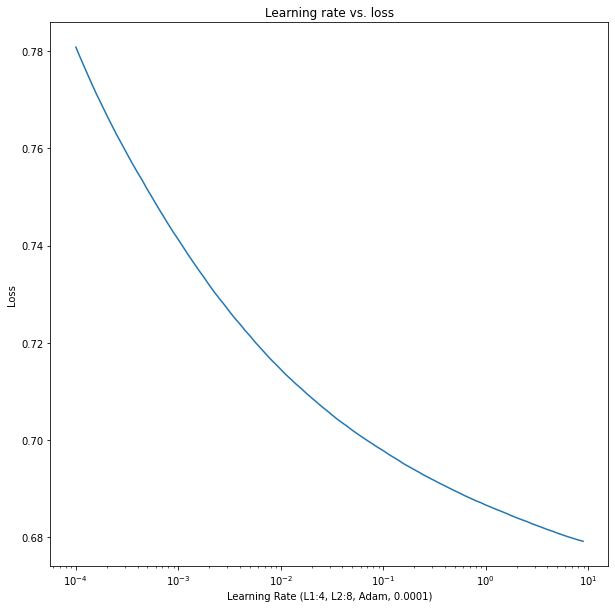

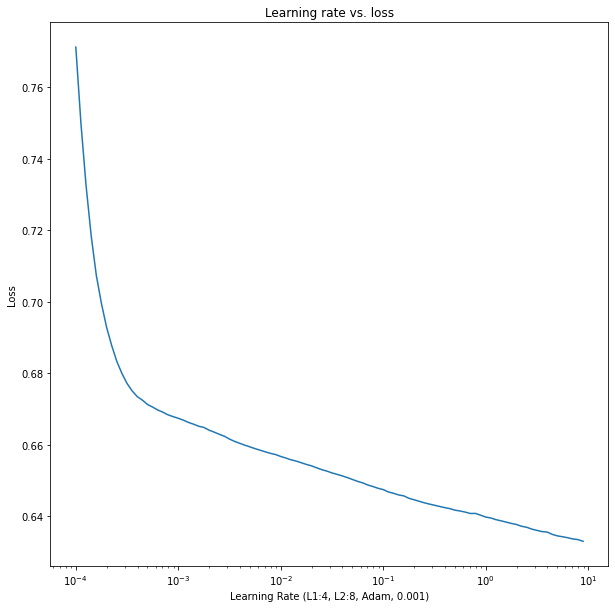

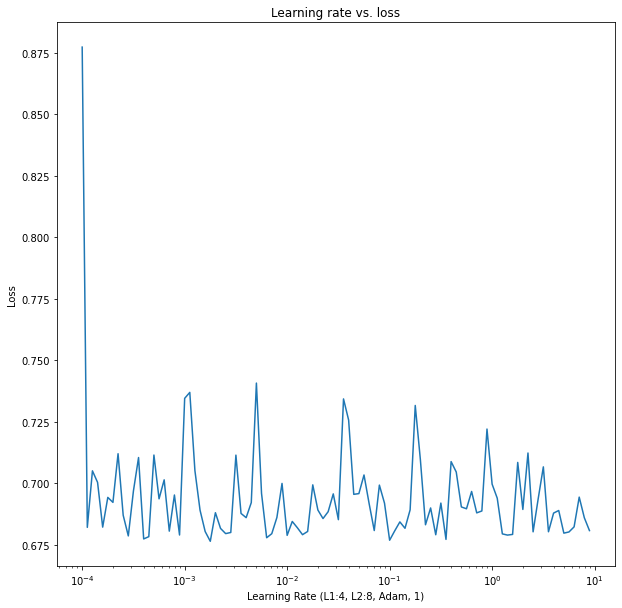

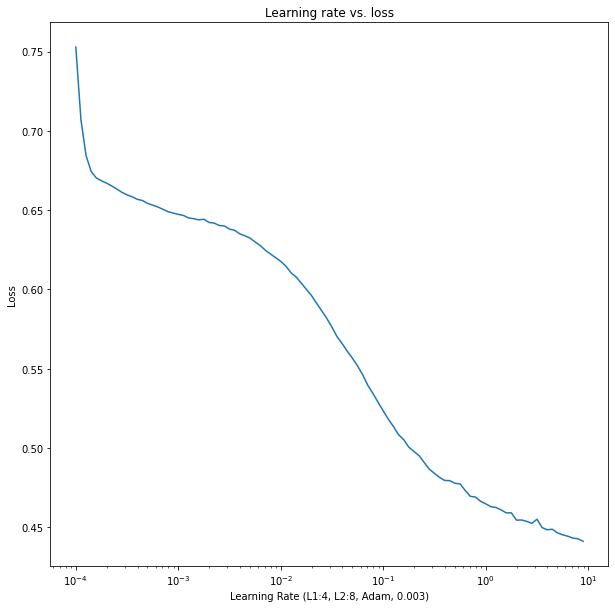

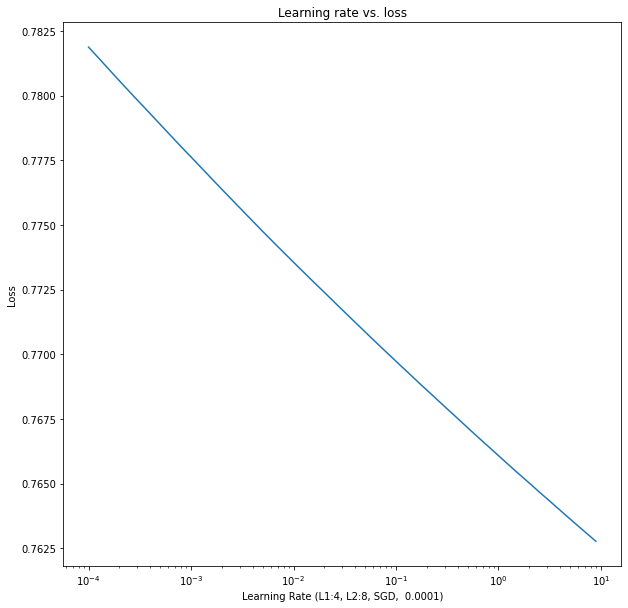

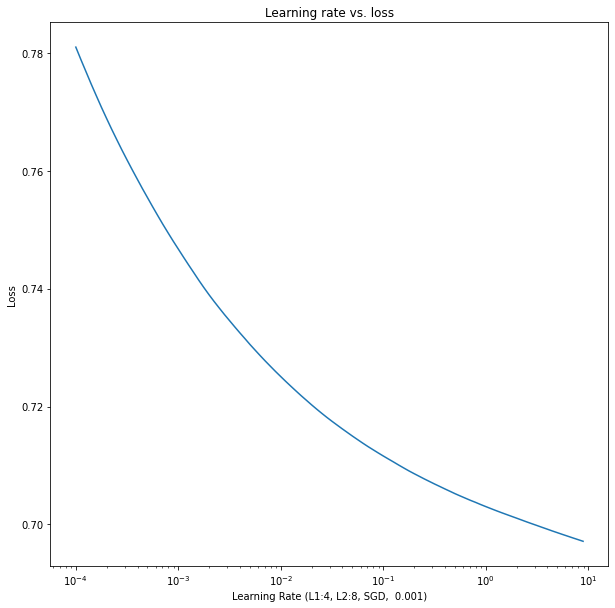

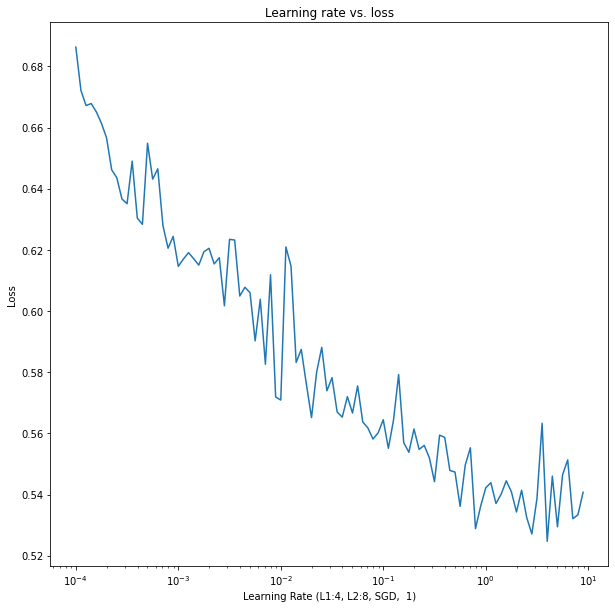

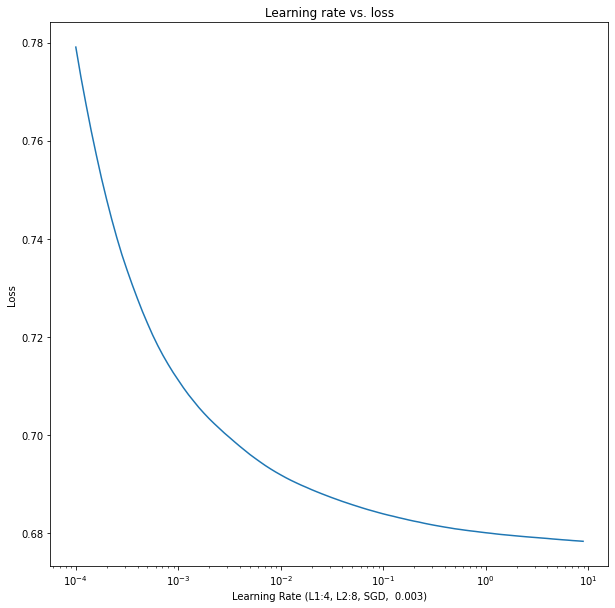

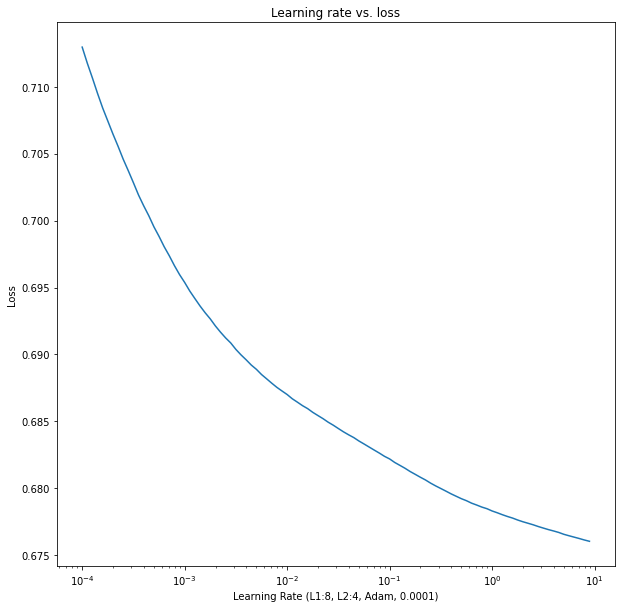

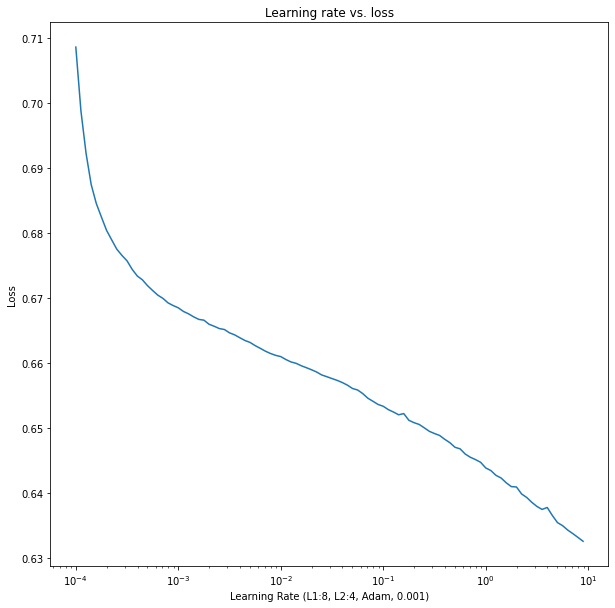

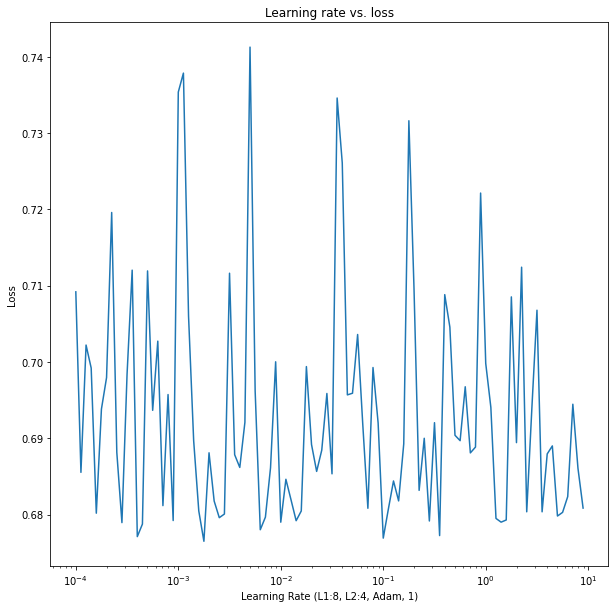

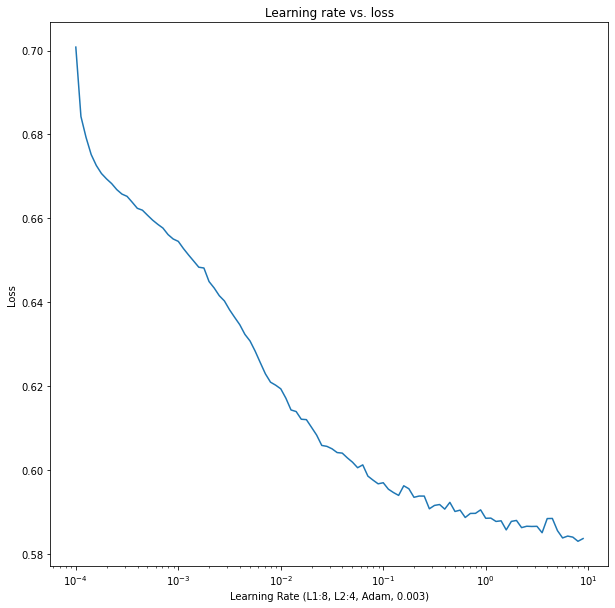

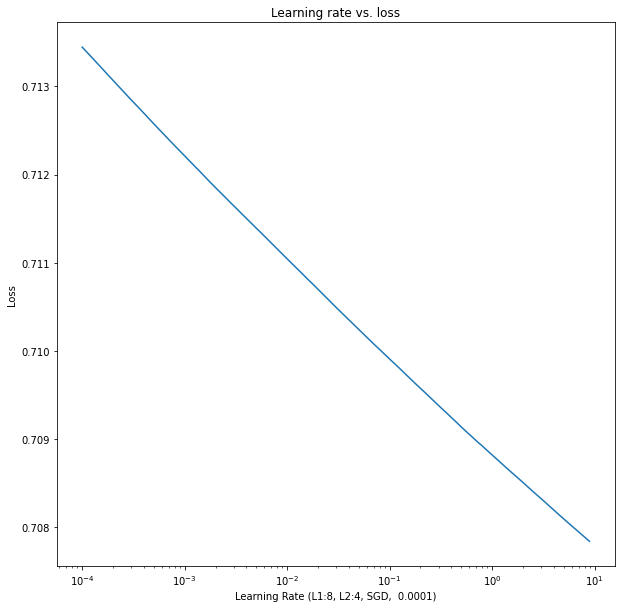

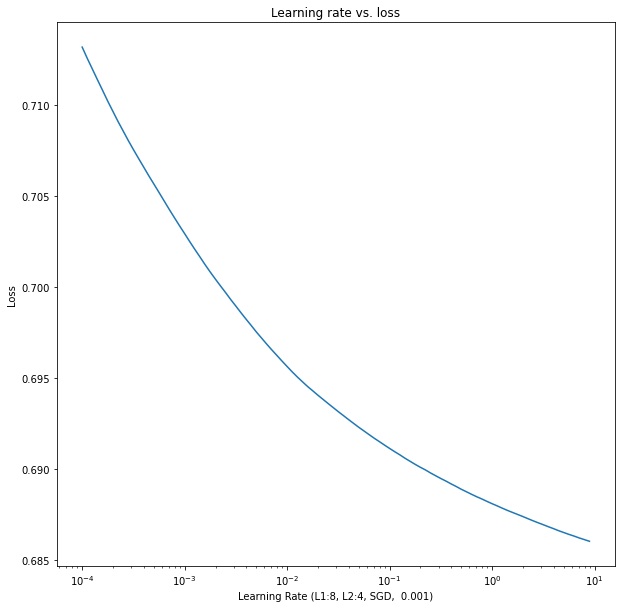

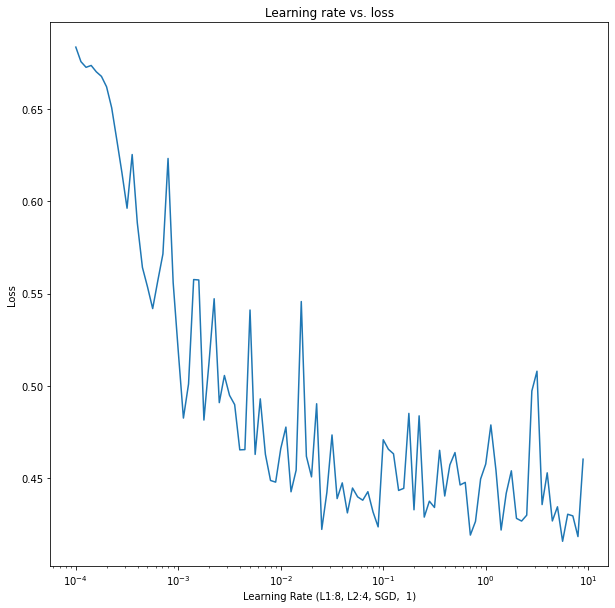

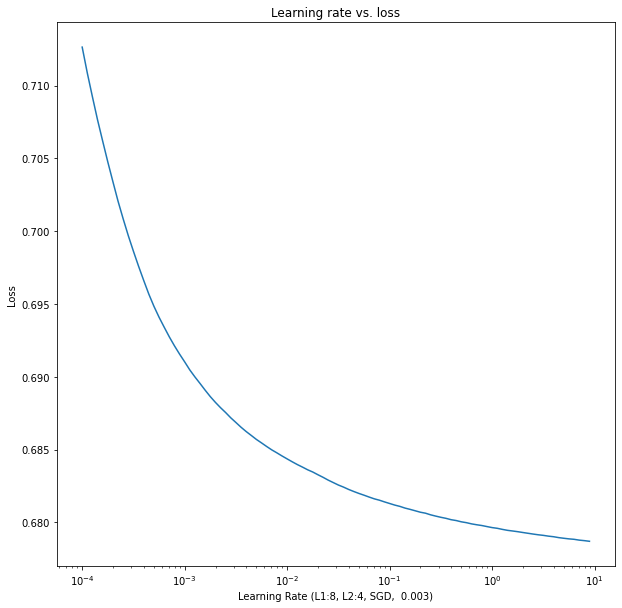

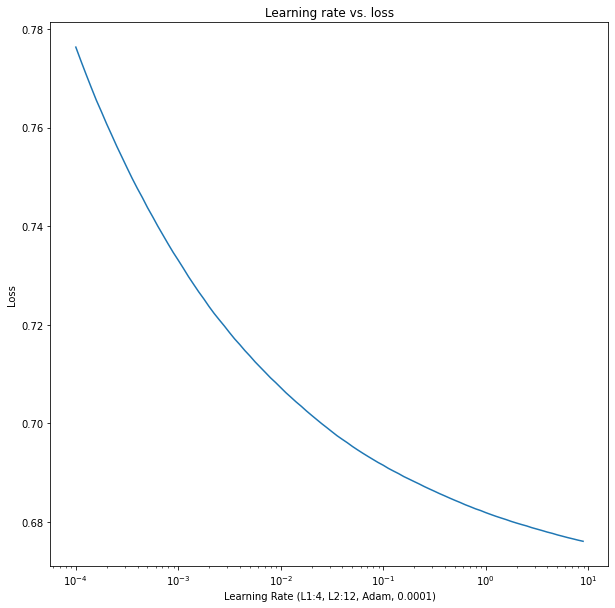

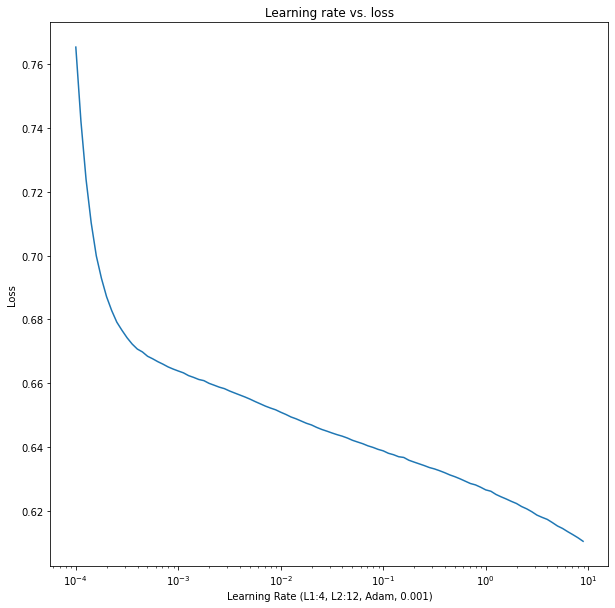

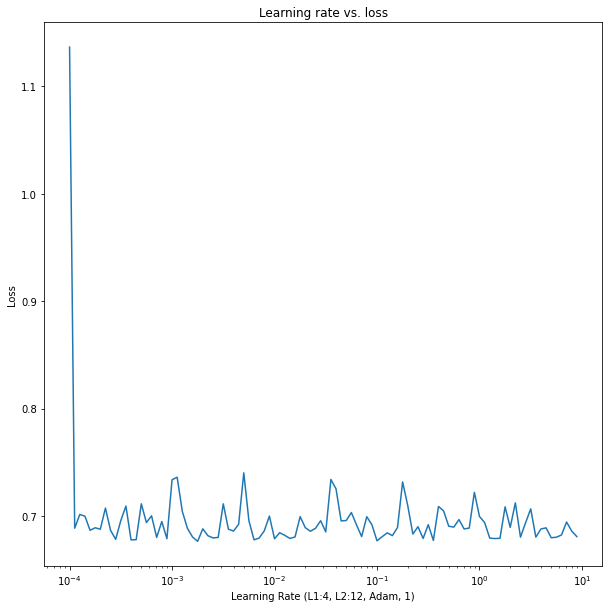

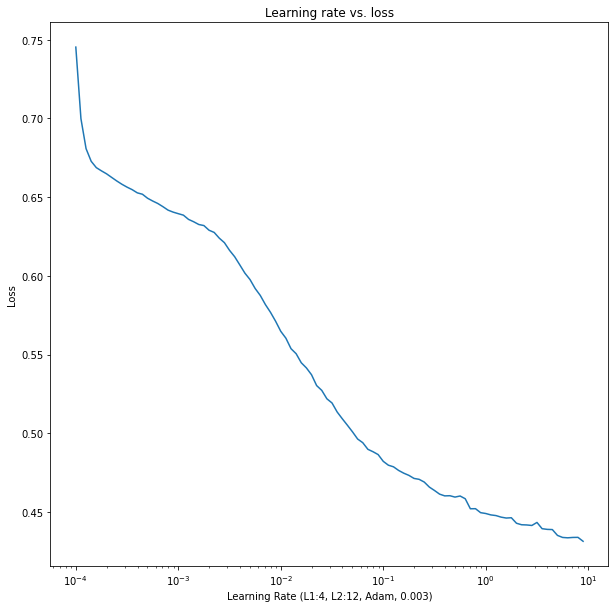

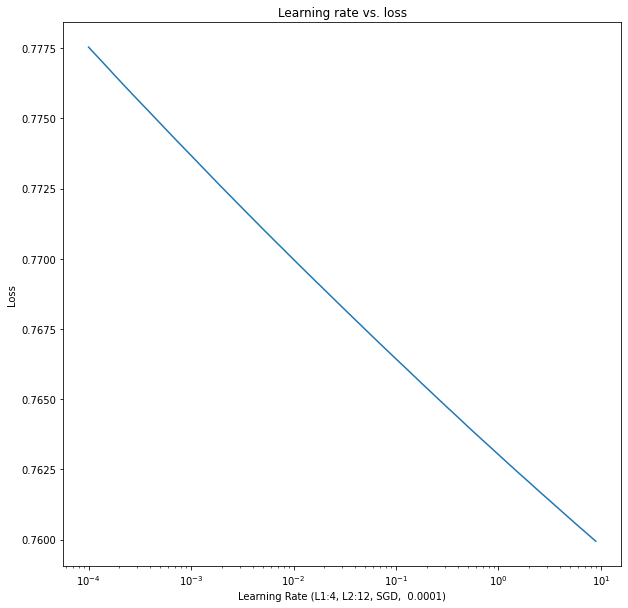

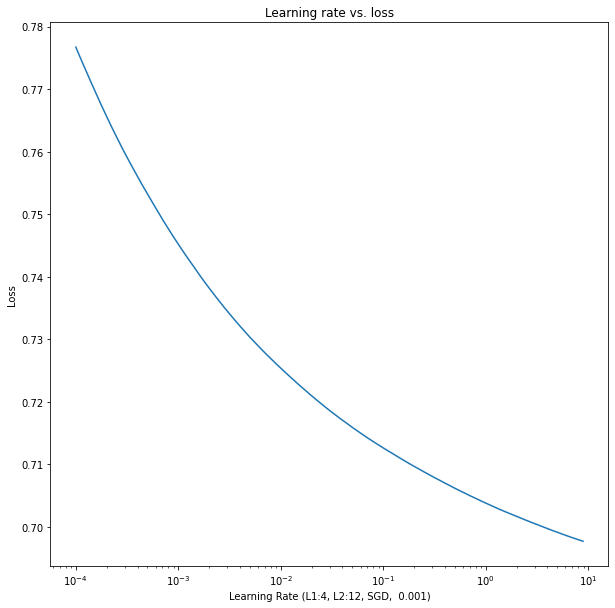

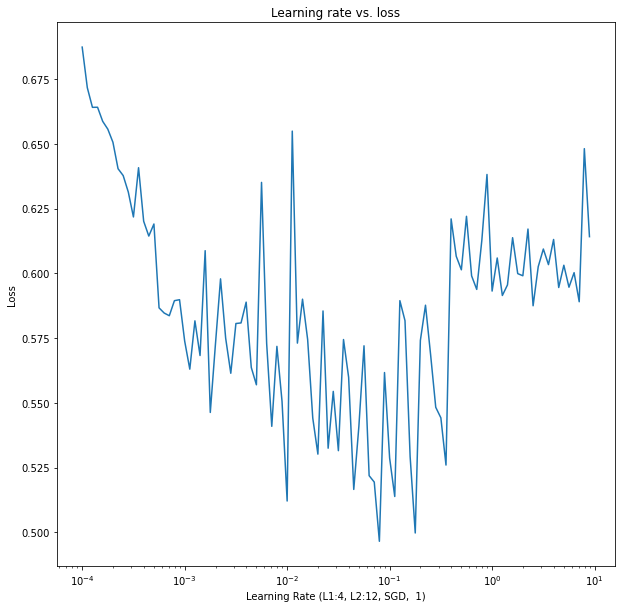

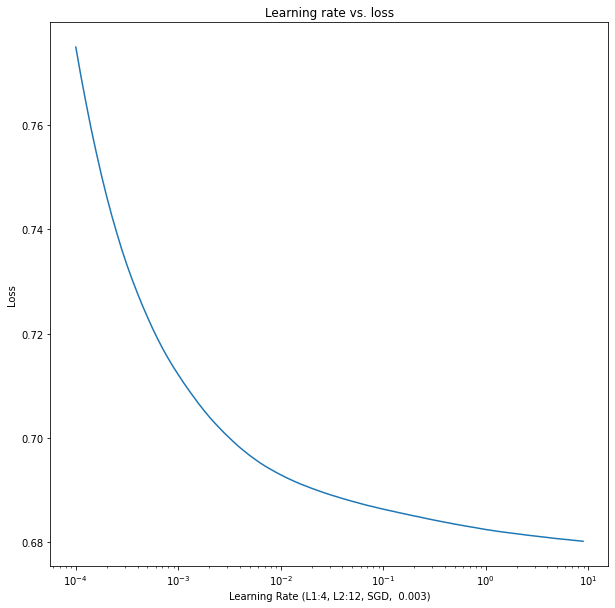

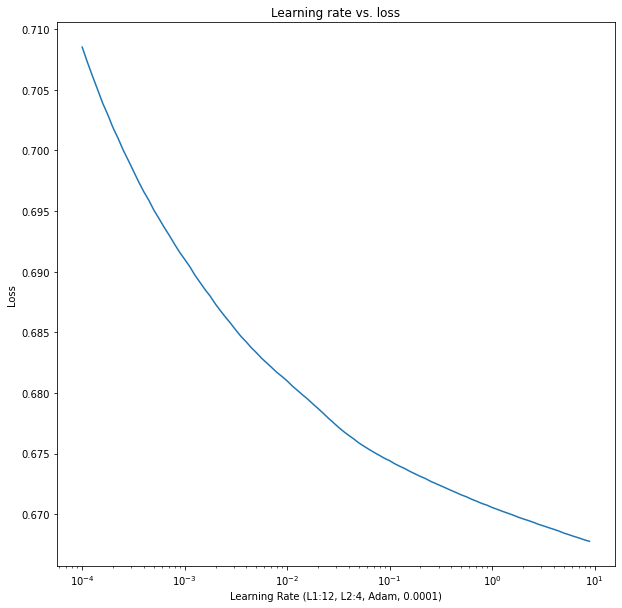

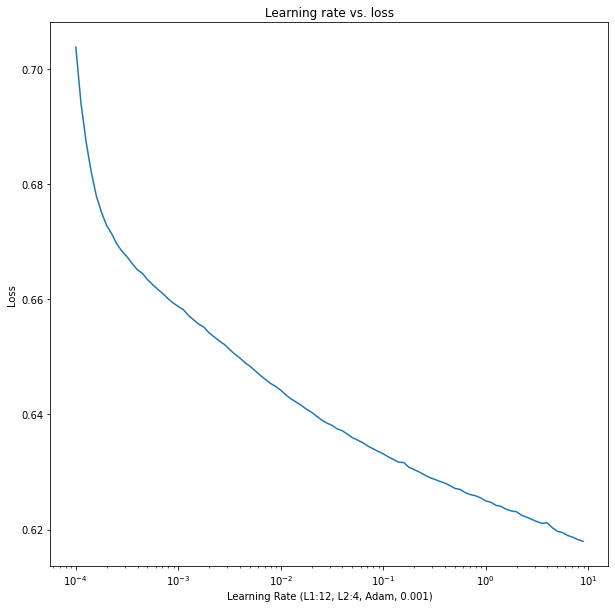

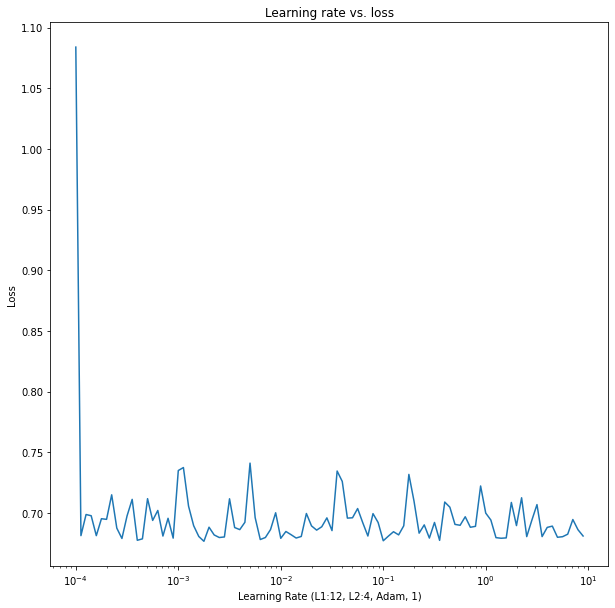

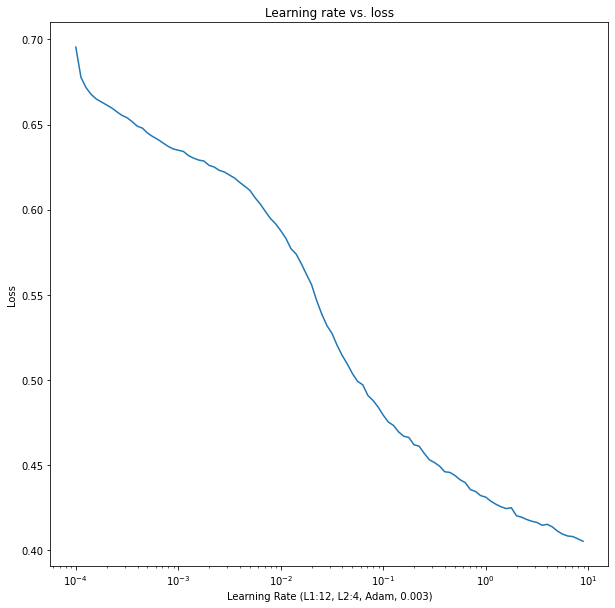

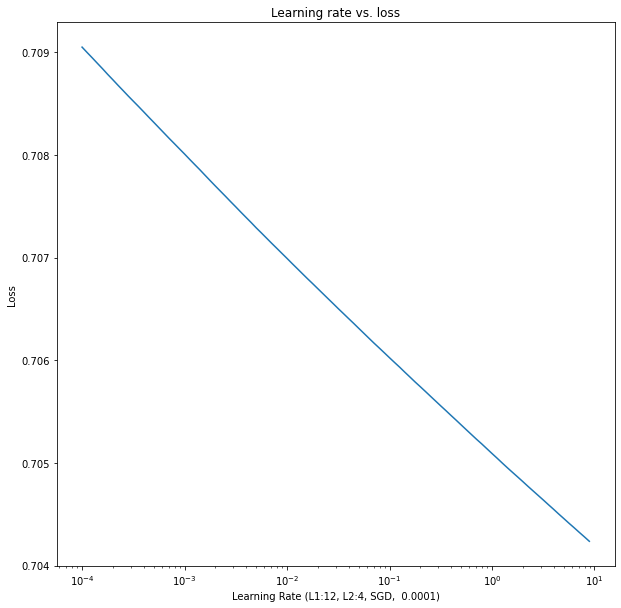

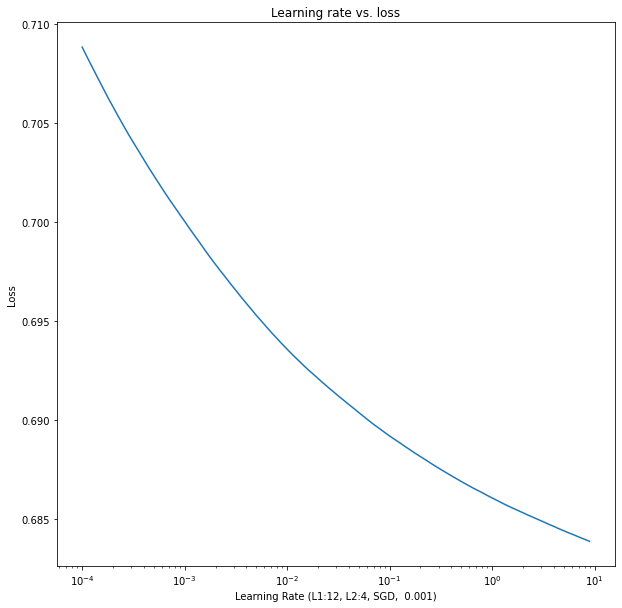

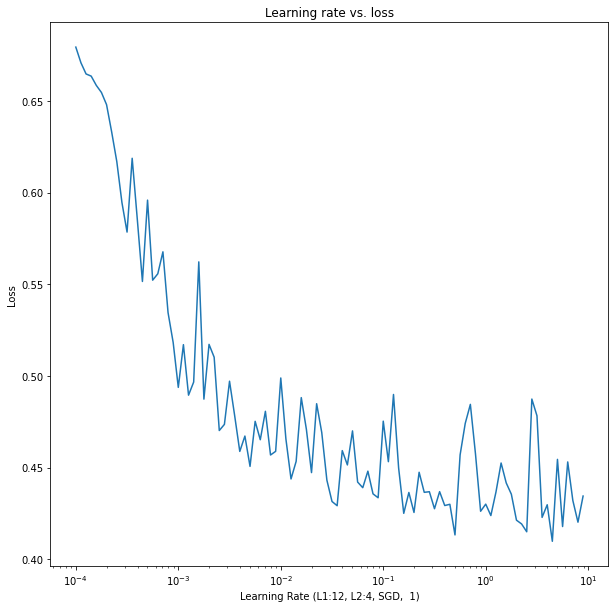

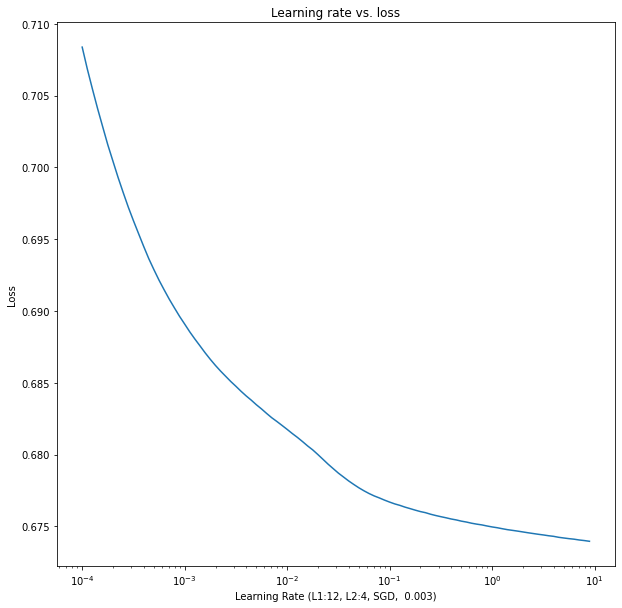

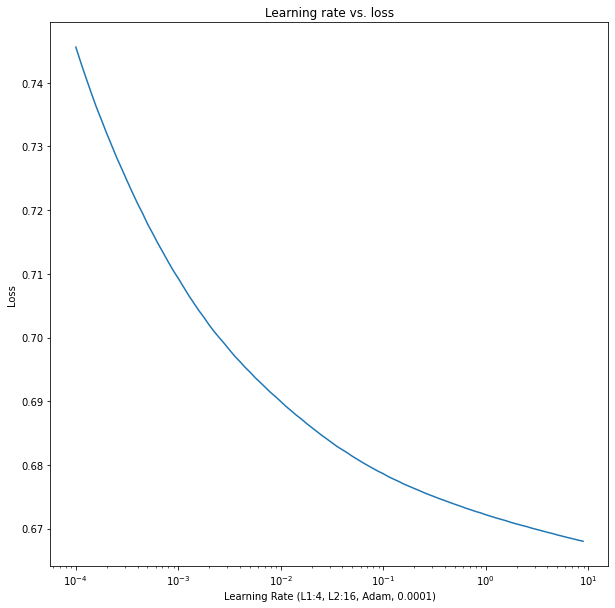

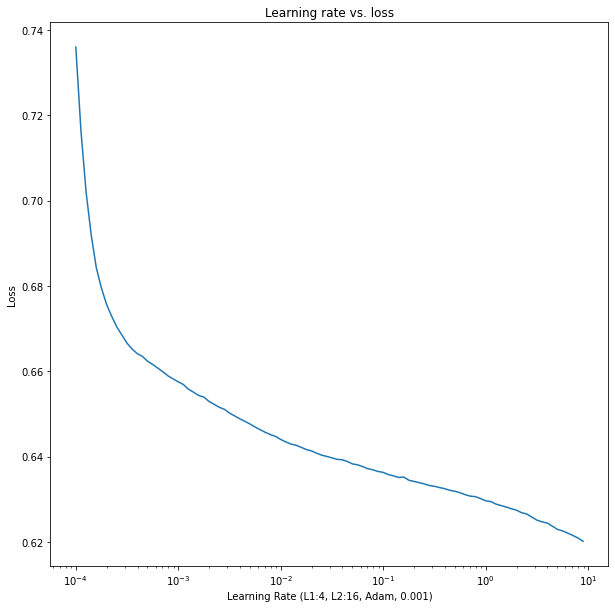

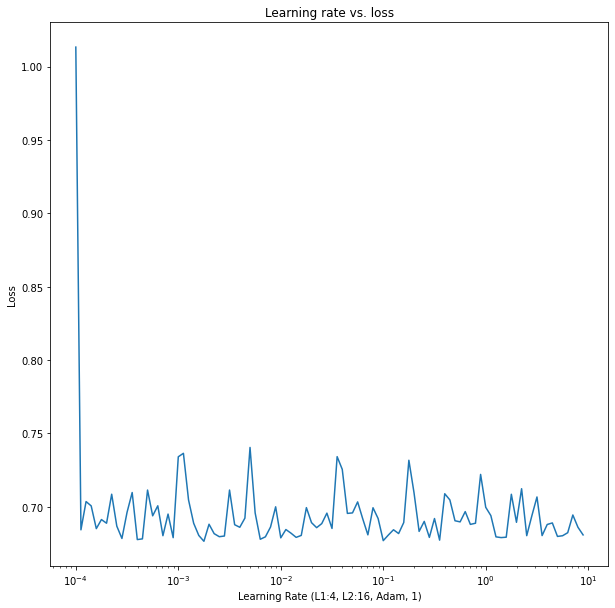

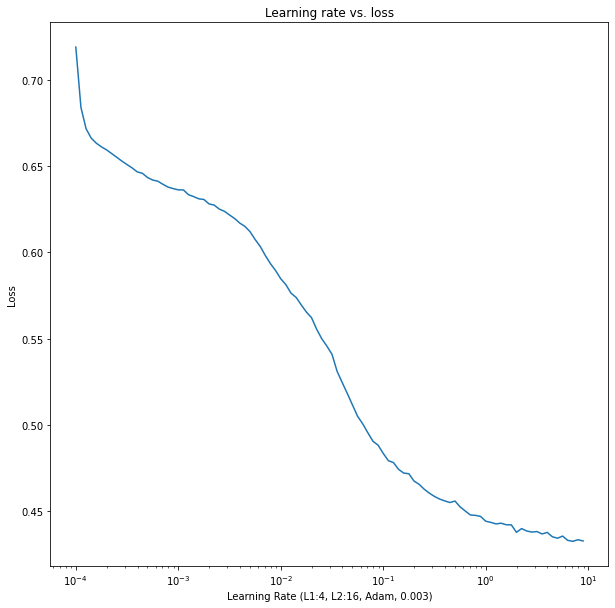

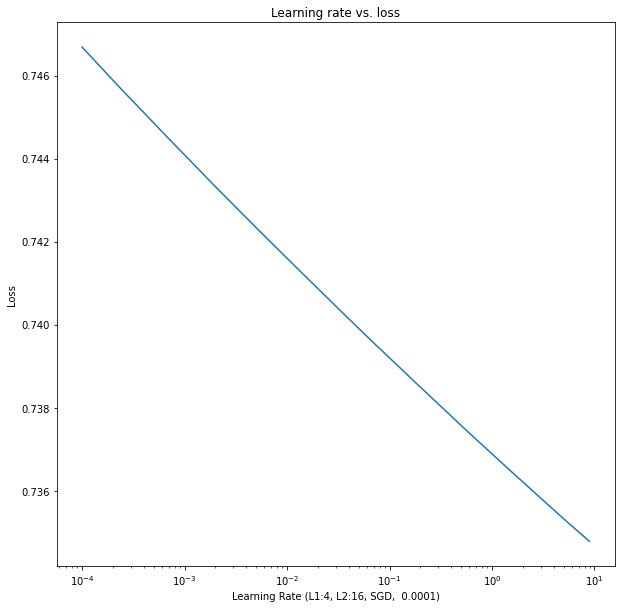

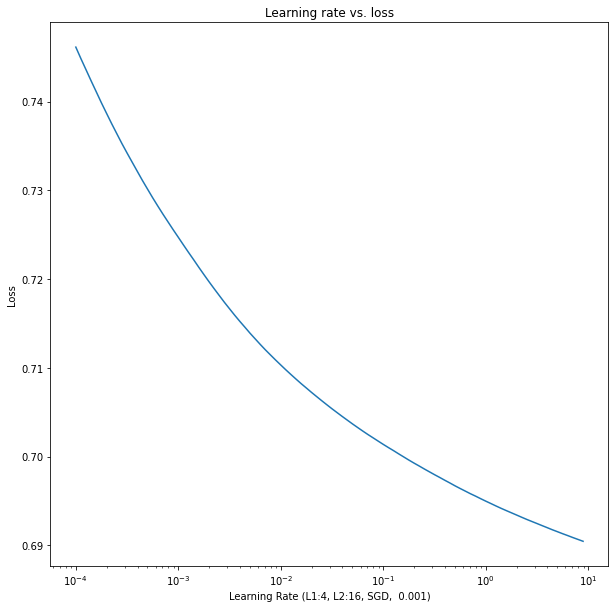

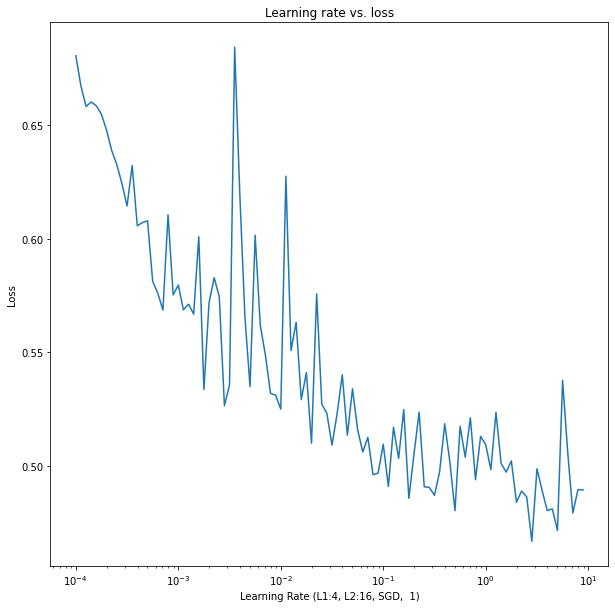

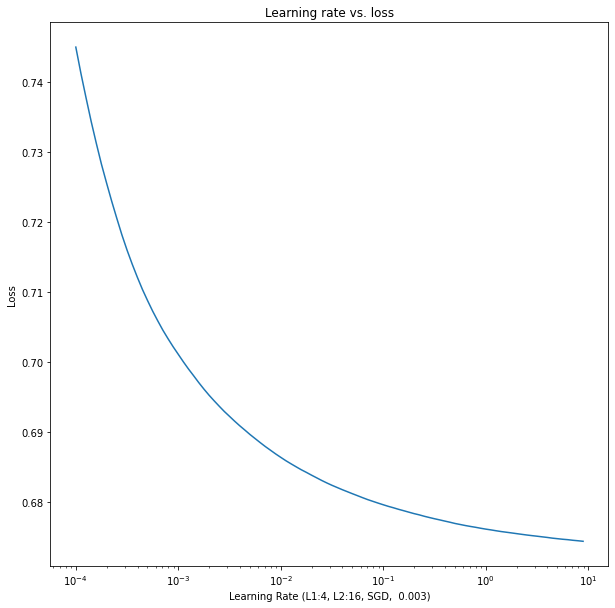

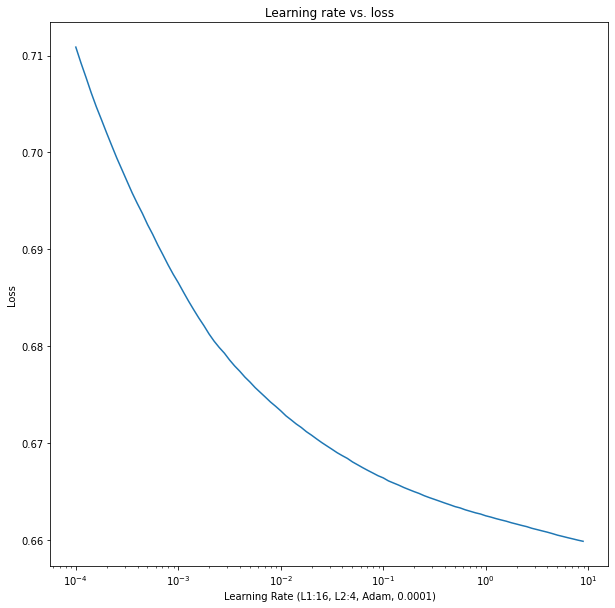

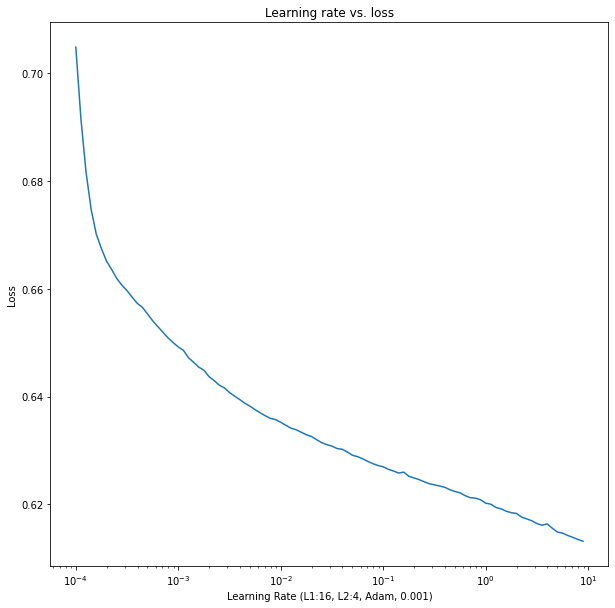

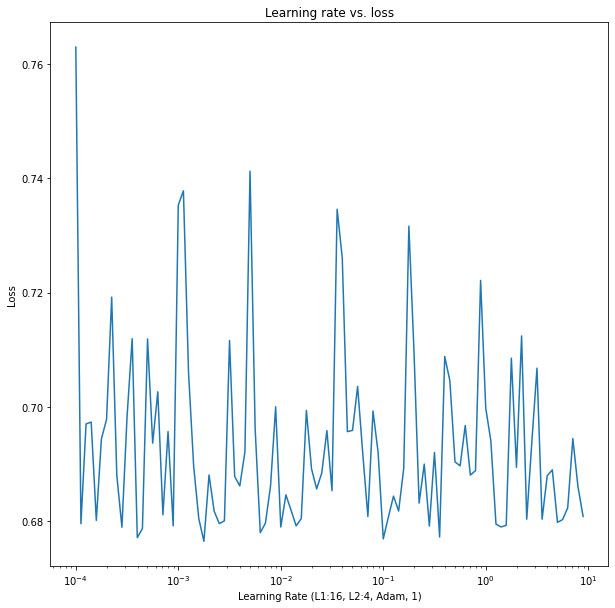

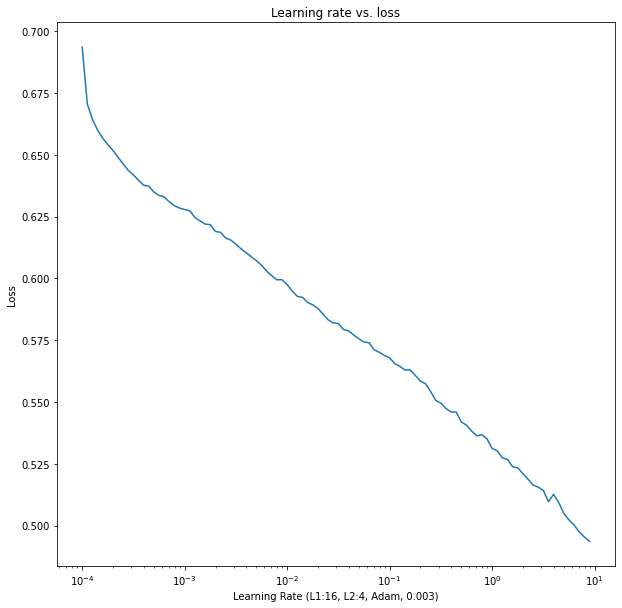

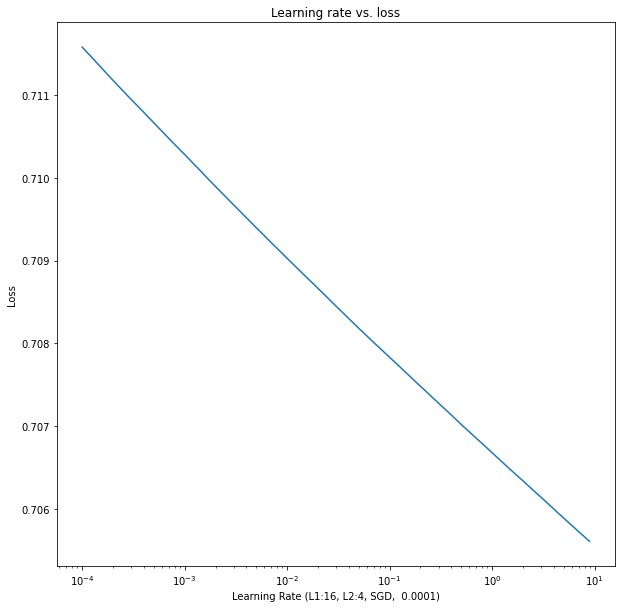

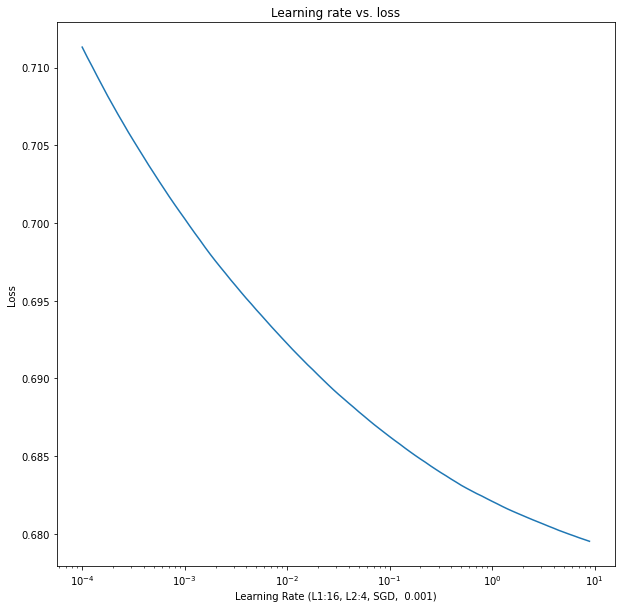

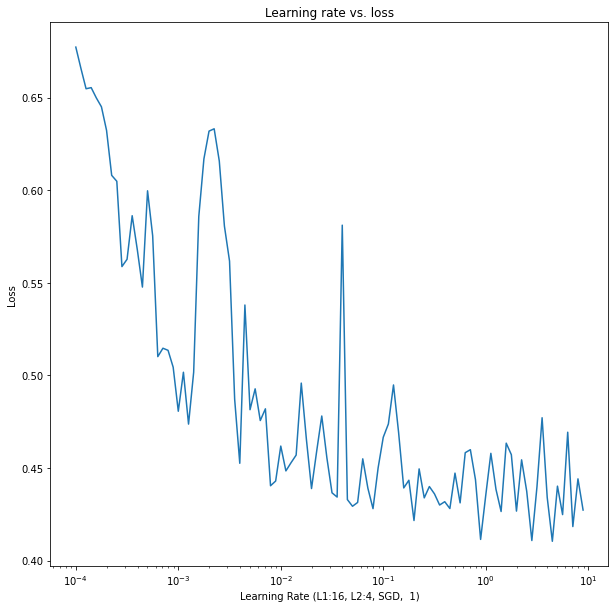

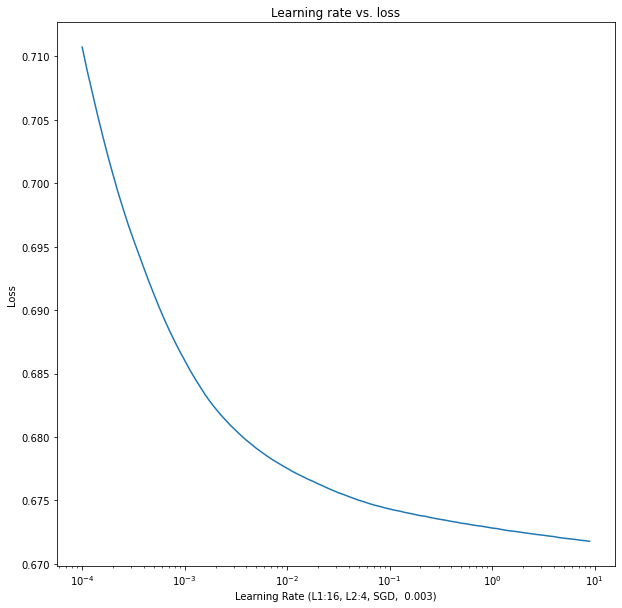

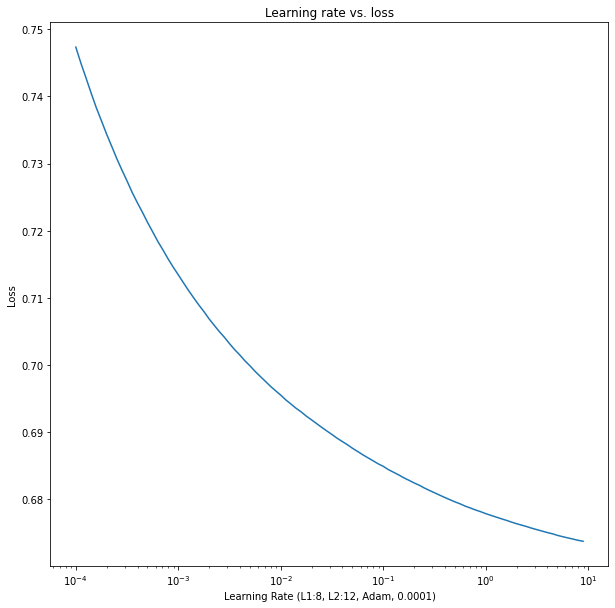

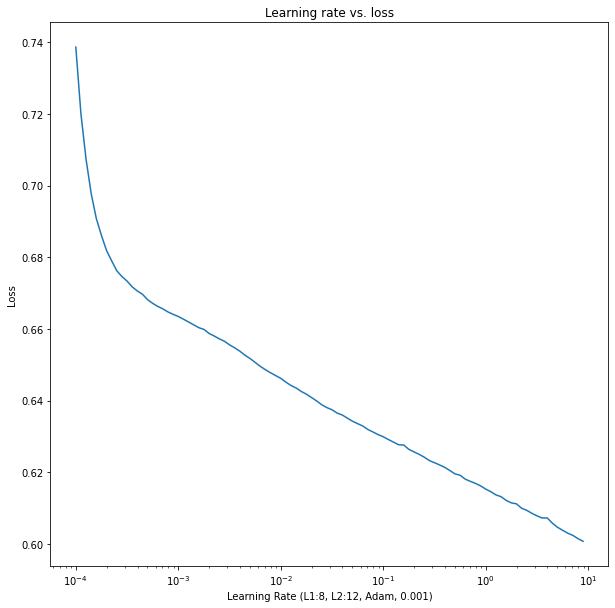

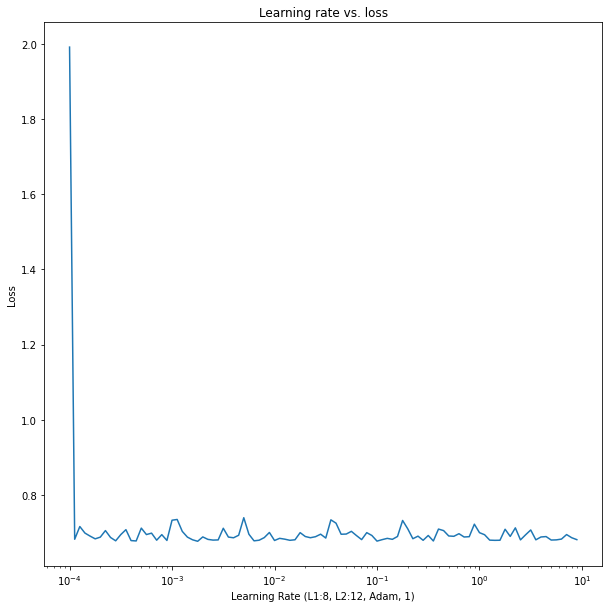

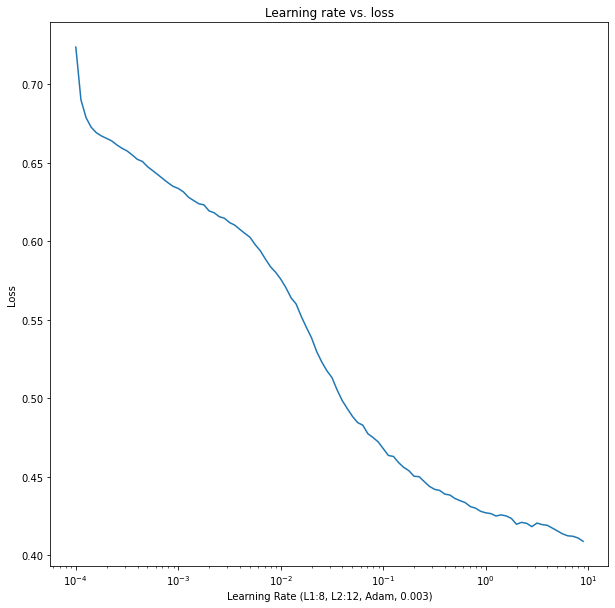

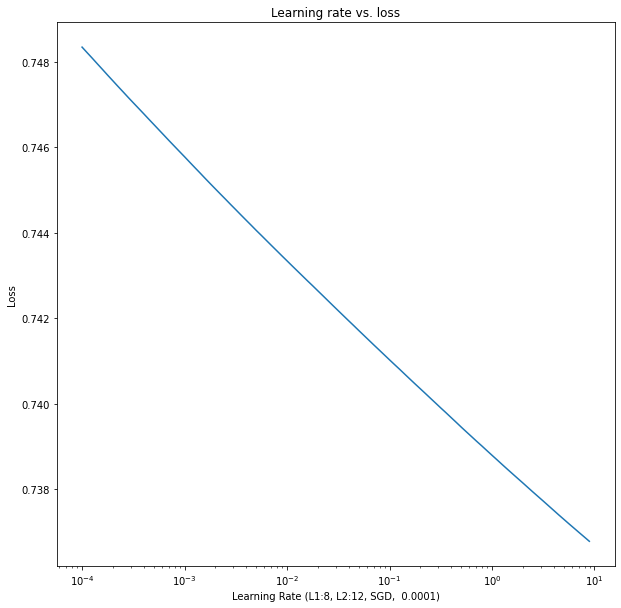

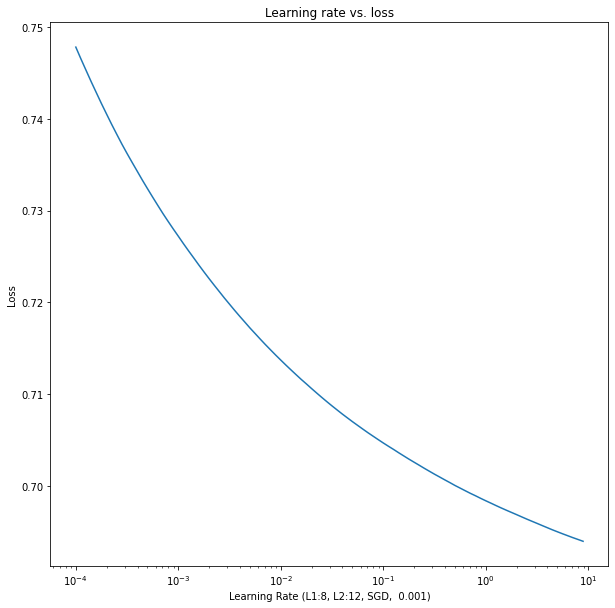

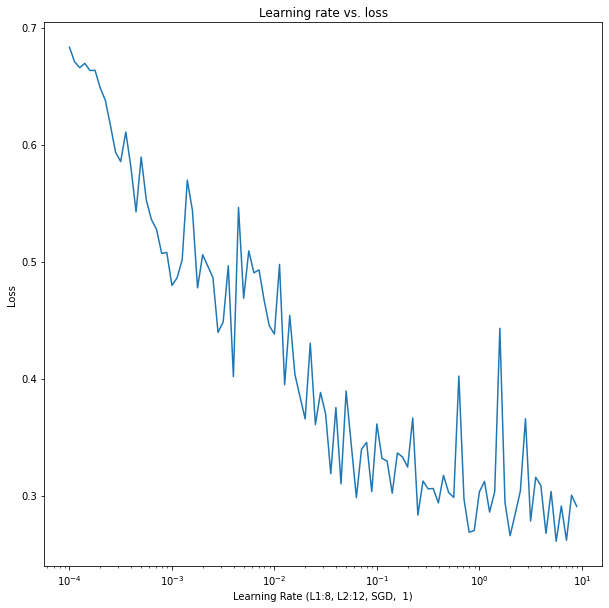

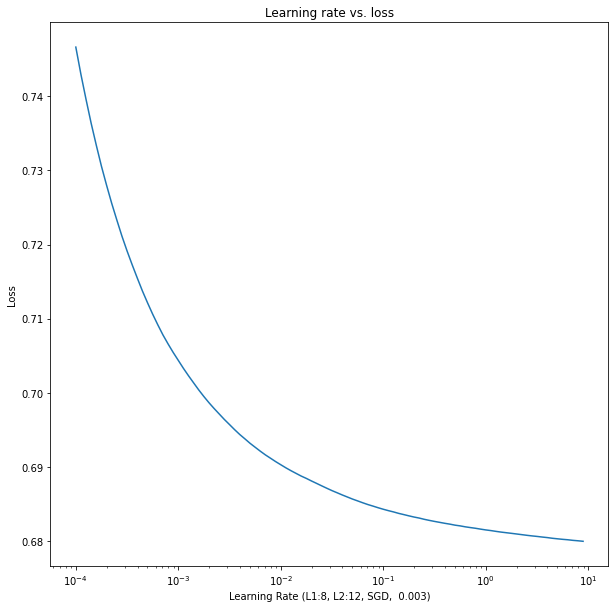

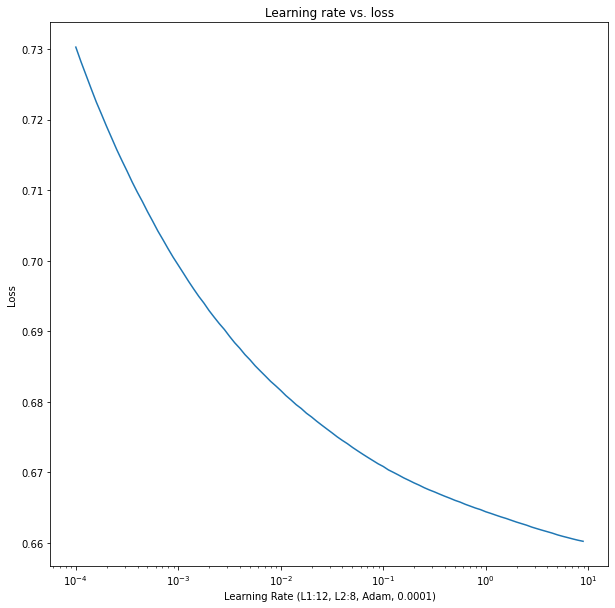

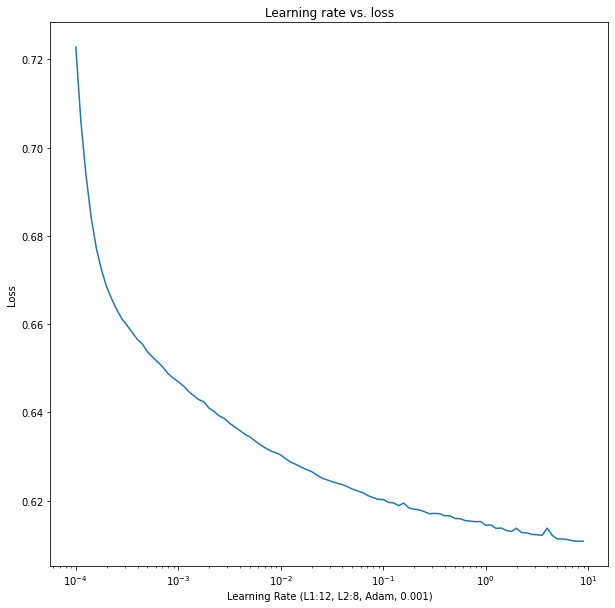

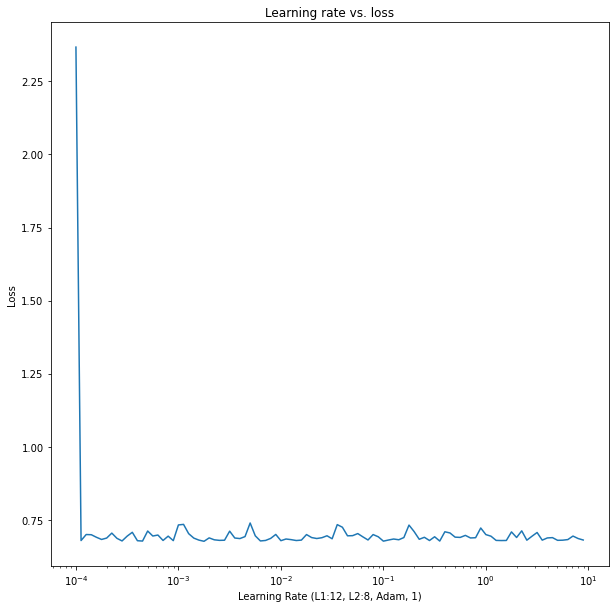

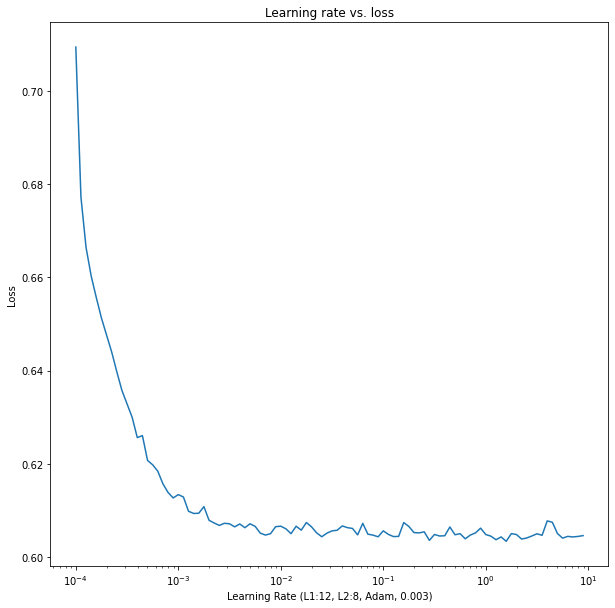

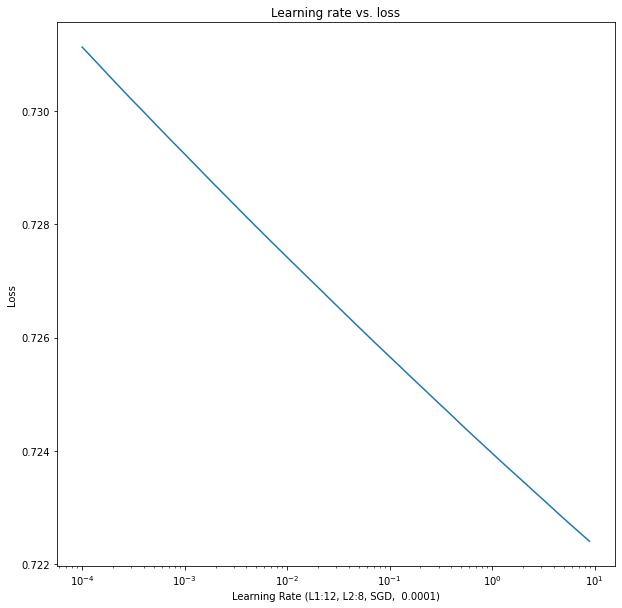

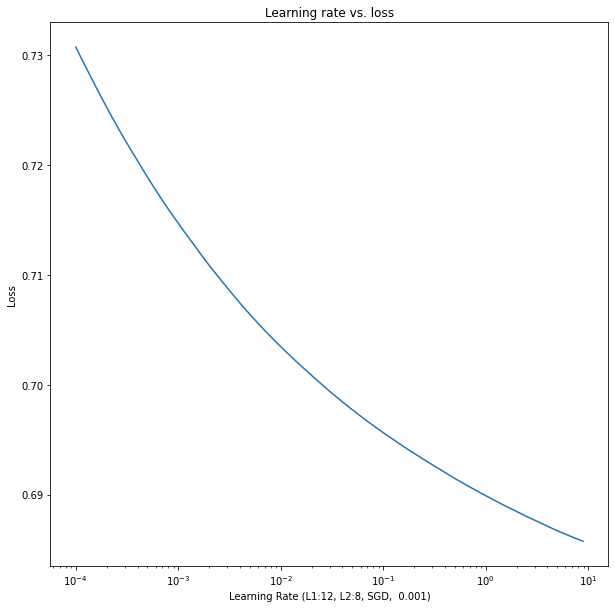

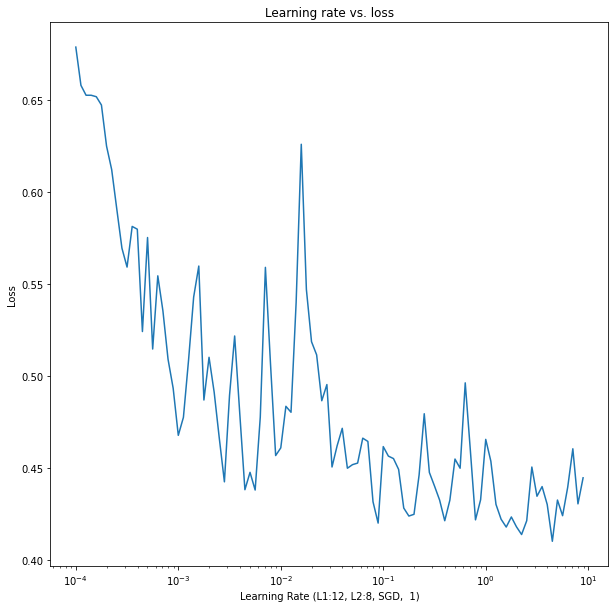

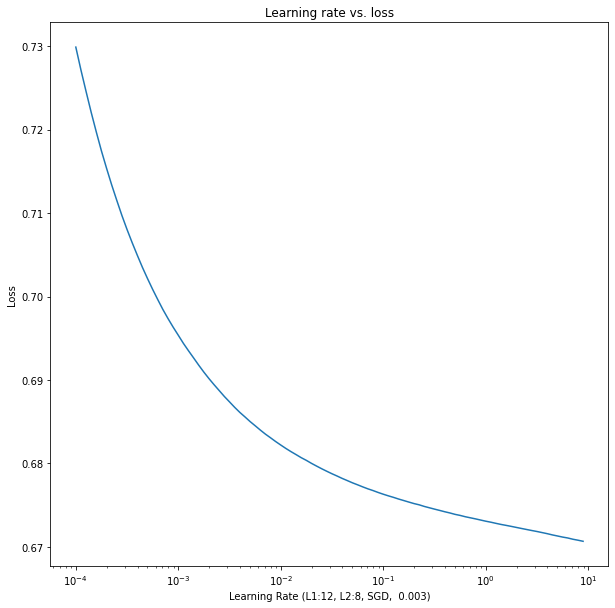

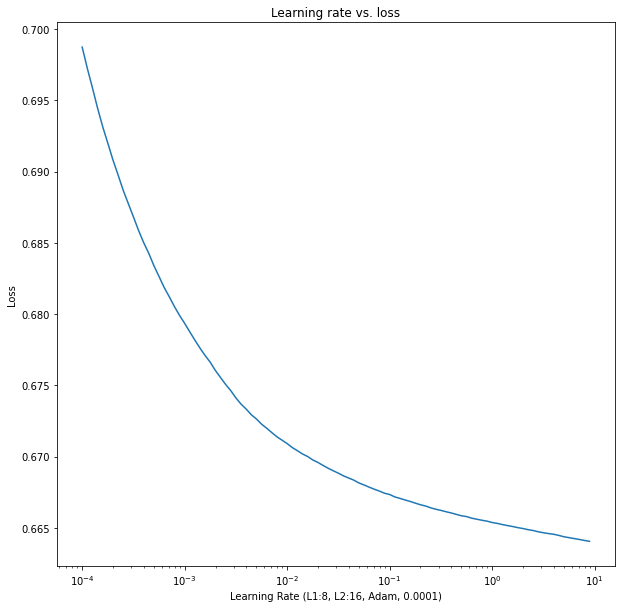

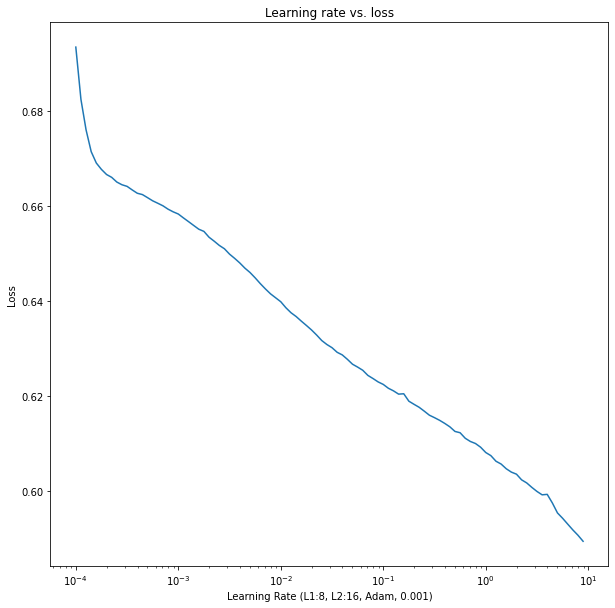

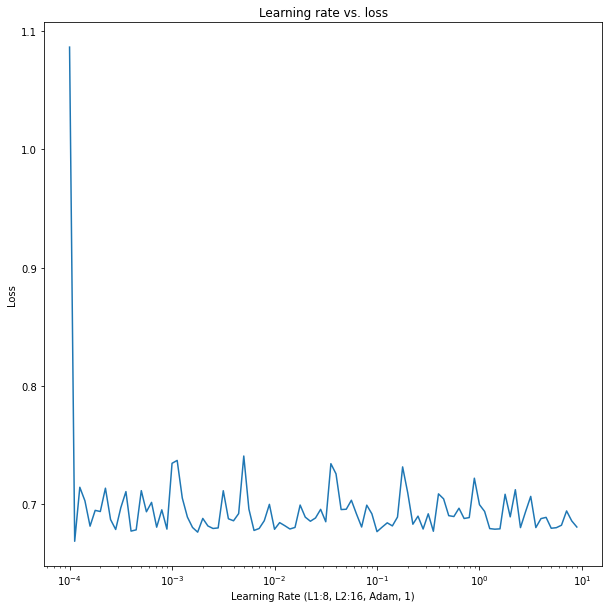

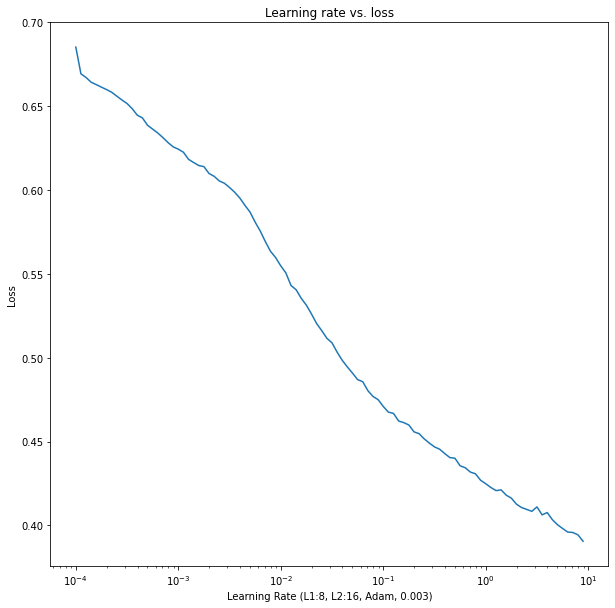

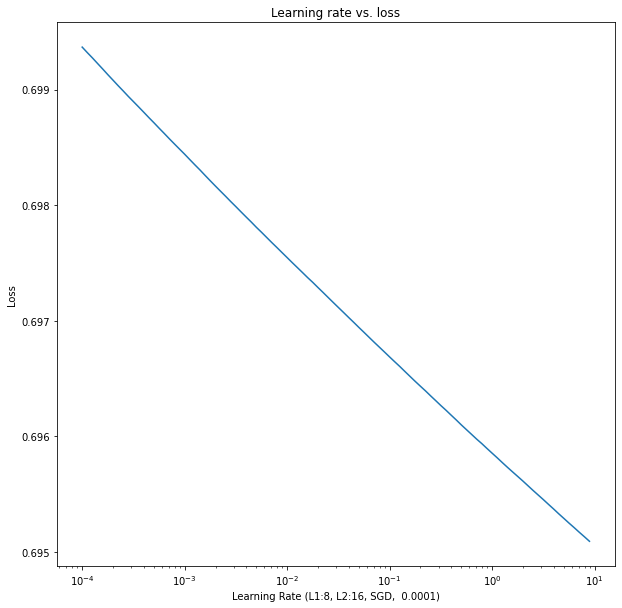

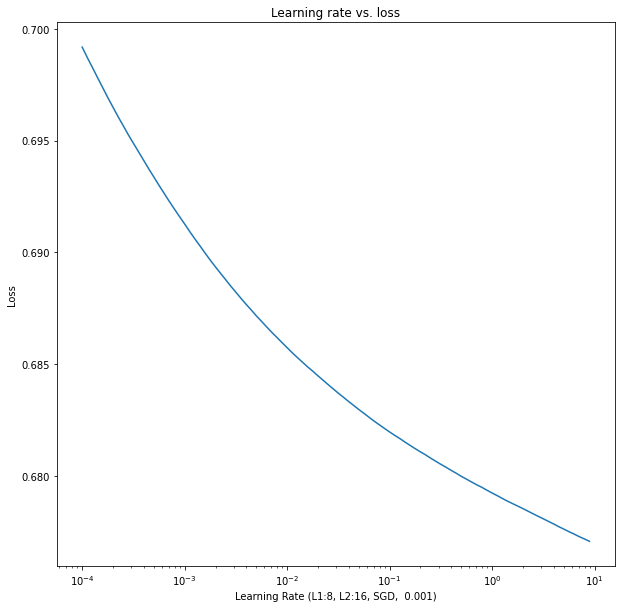

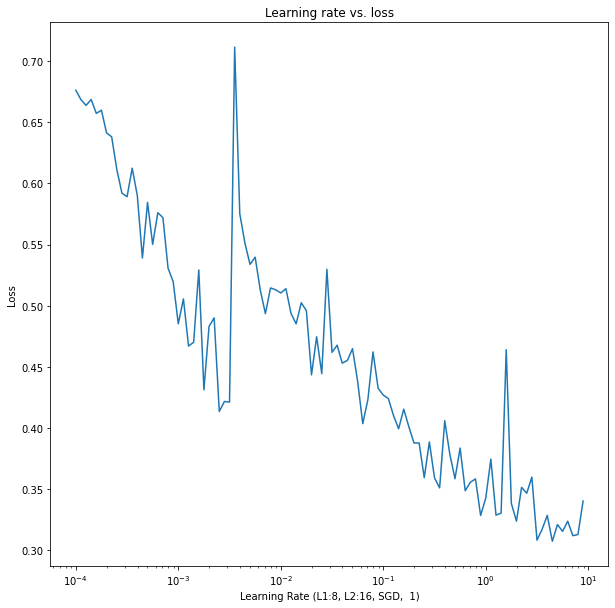

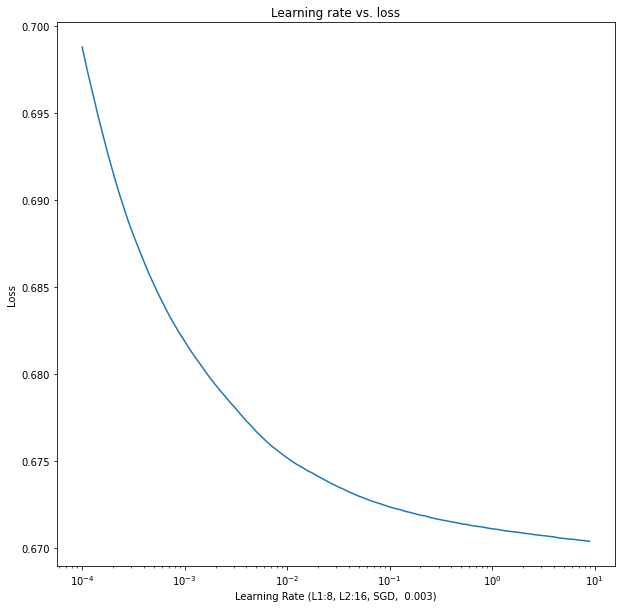

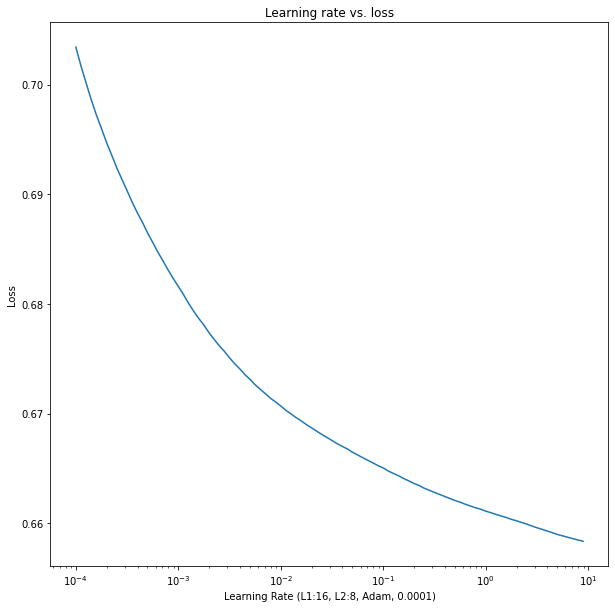

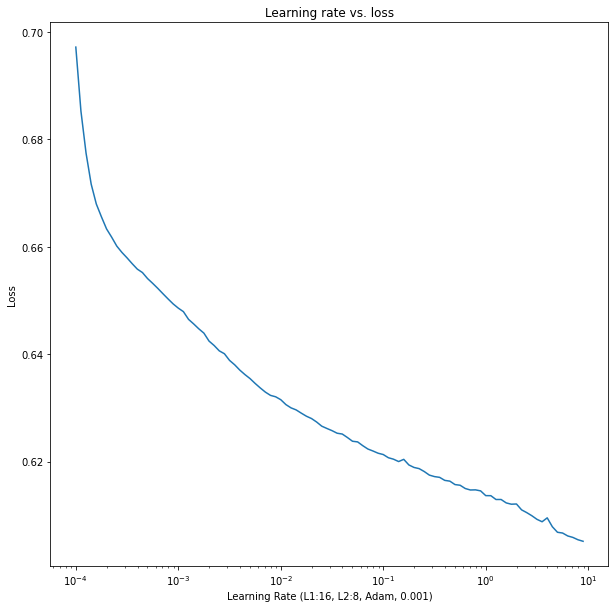

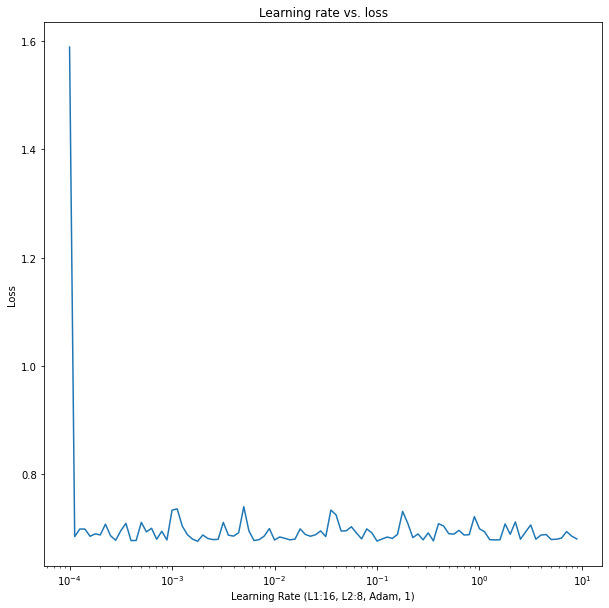

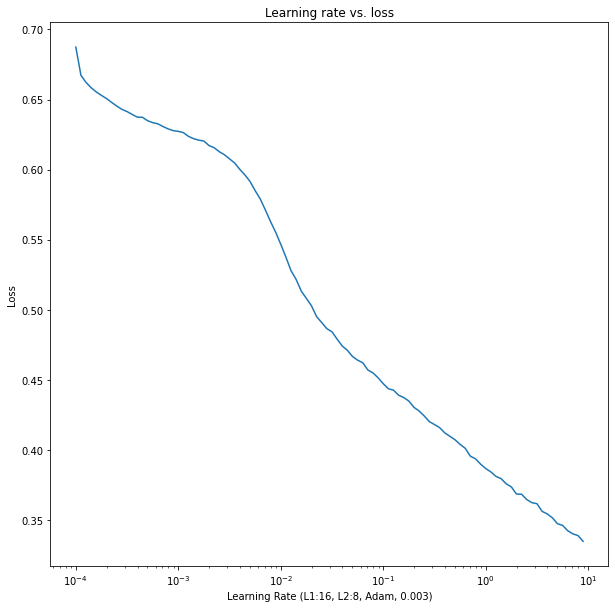

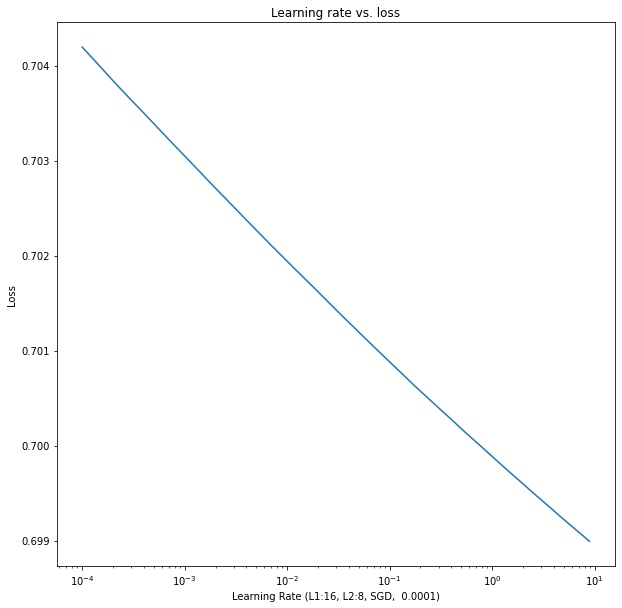

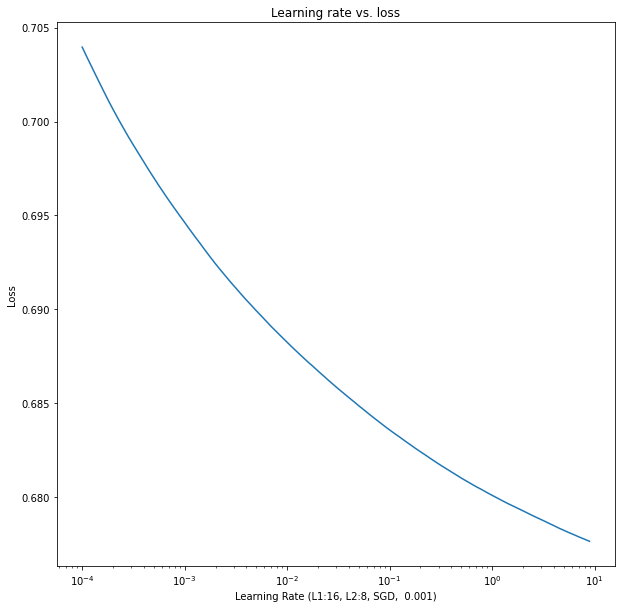

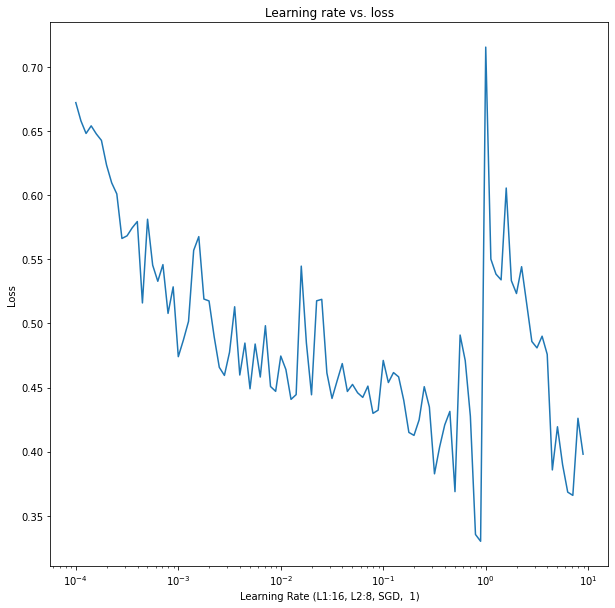

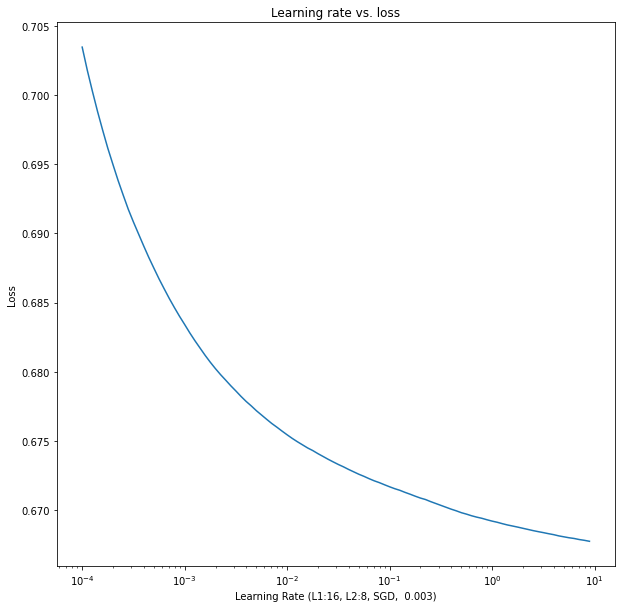

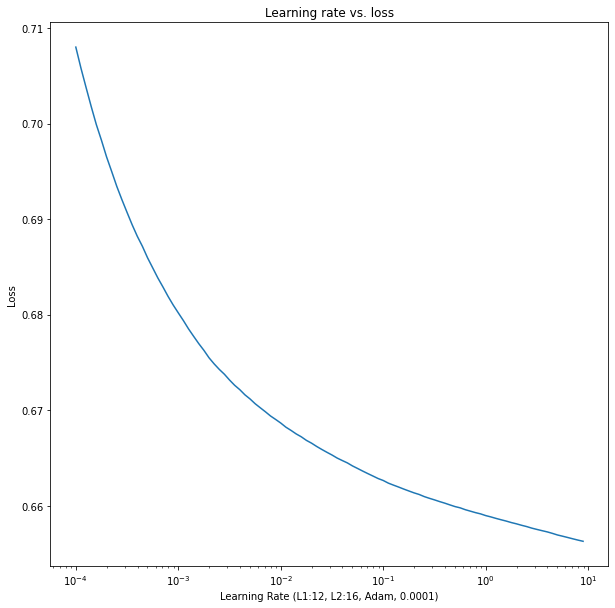

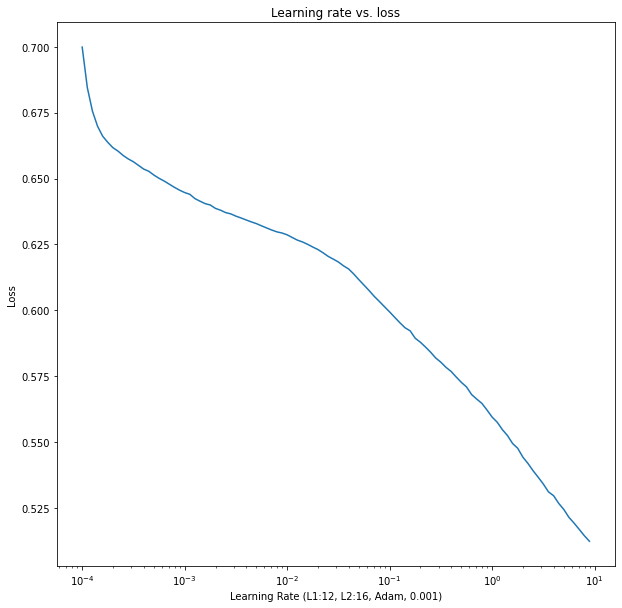

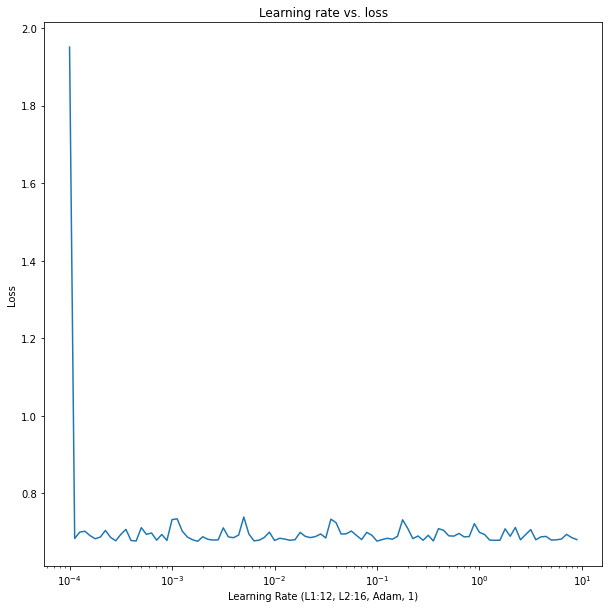

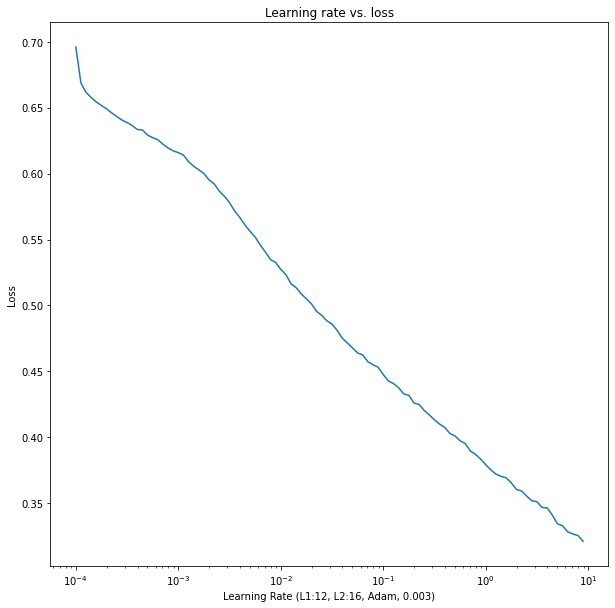

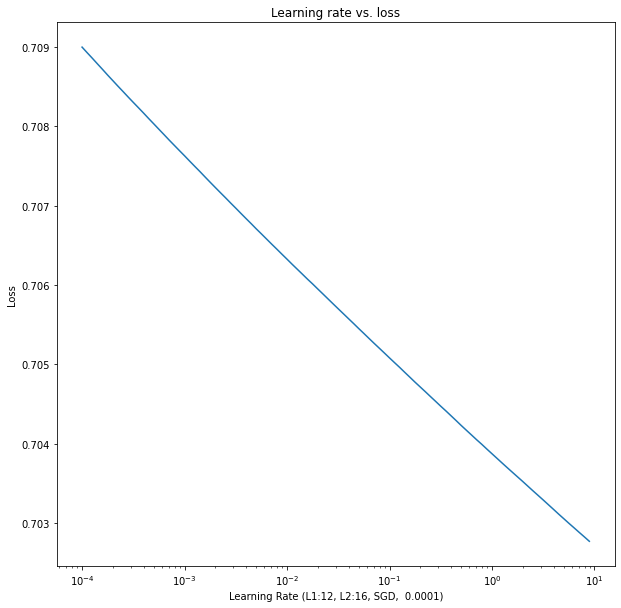

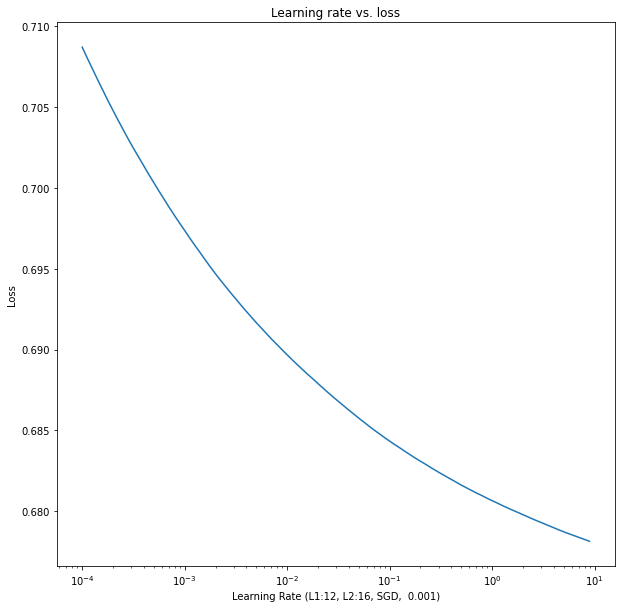

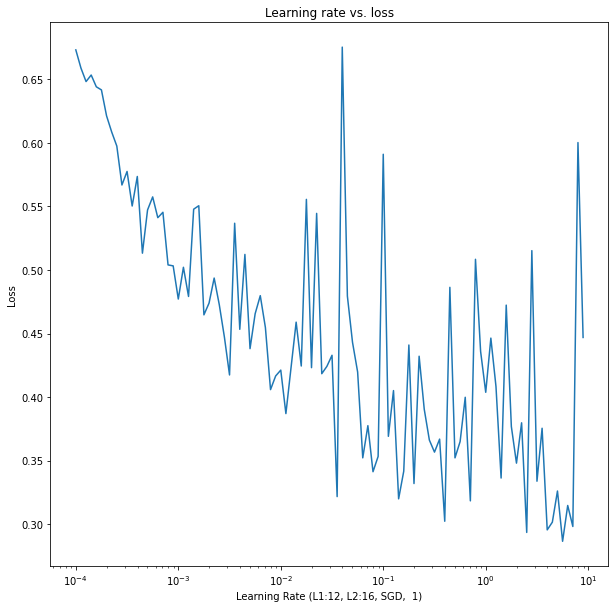

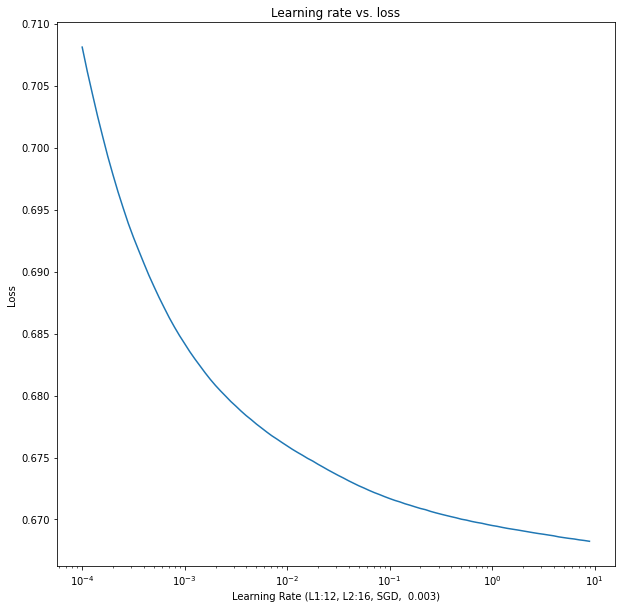

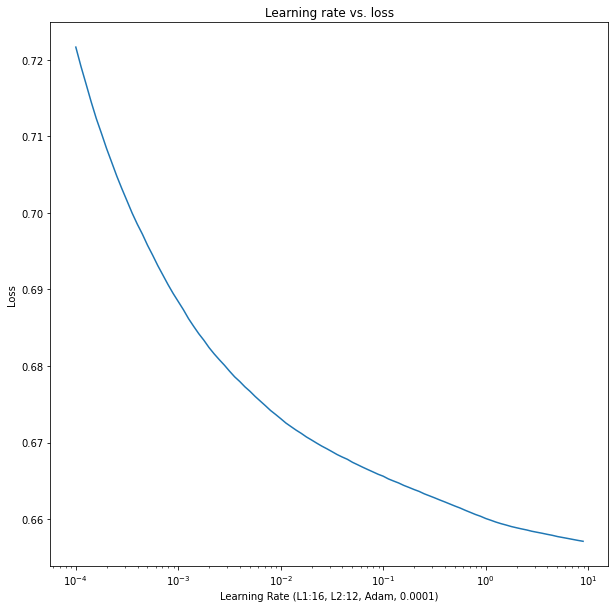

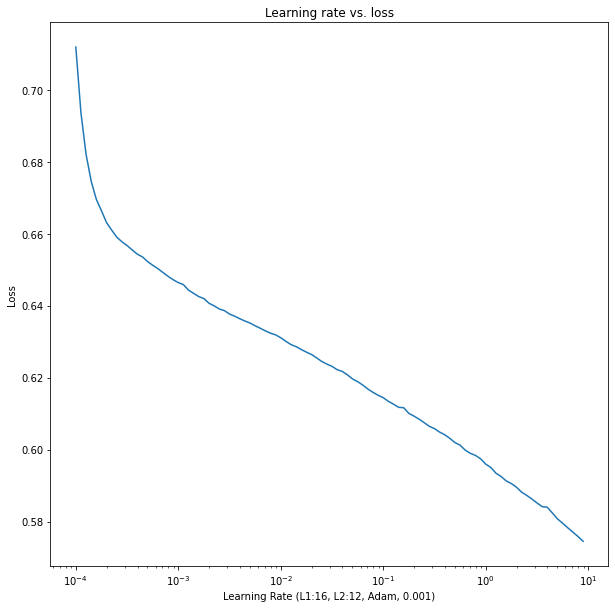

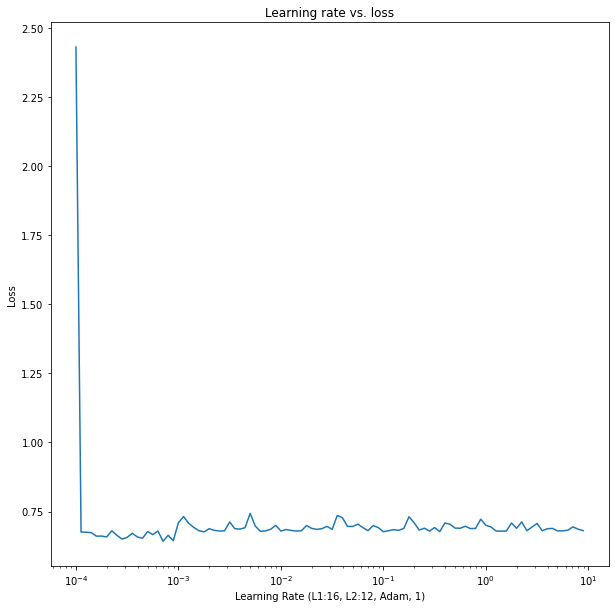

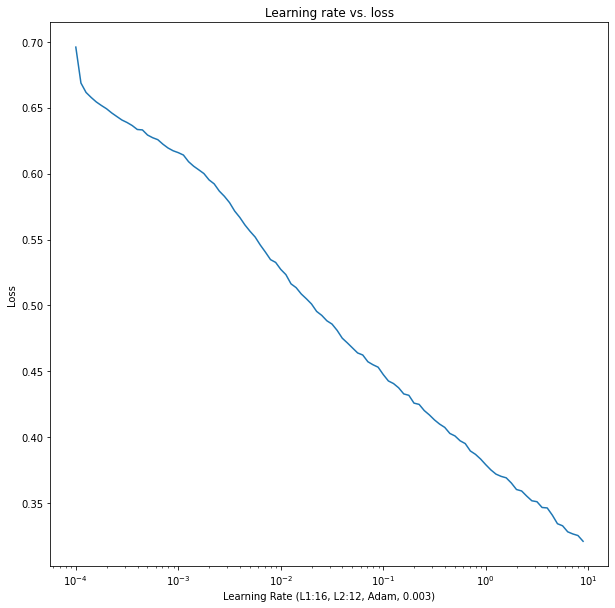

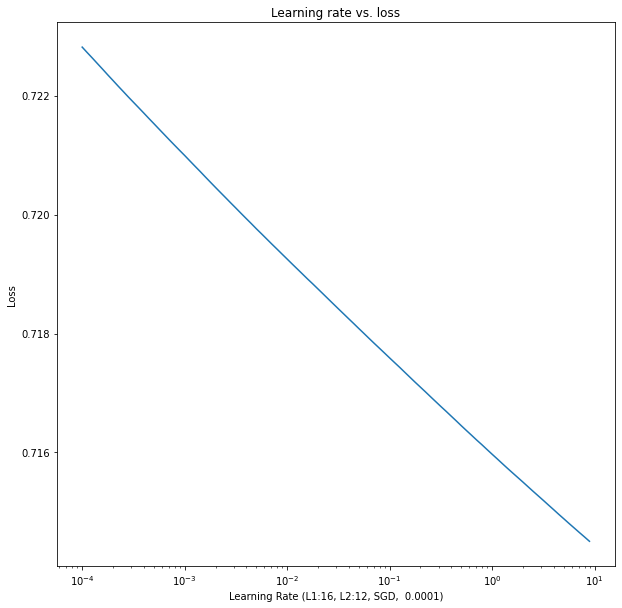

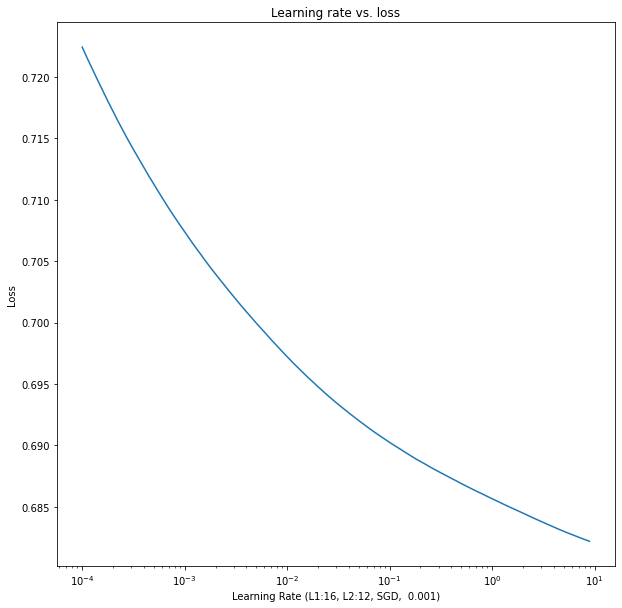

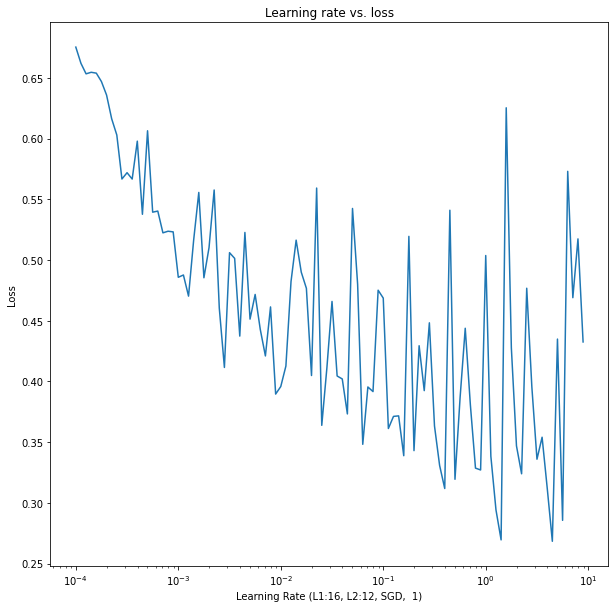

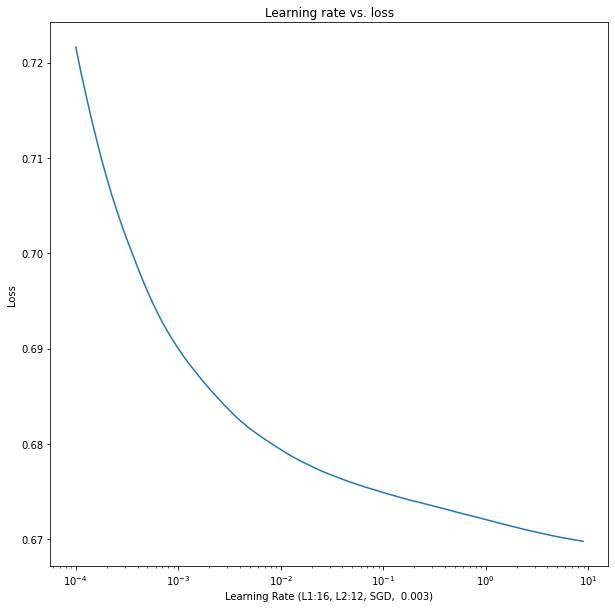

In [ ]:
calc_learning_vs_loss(hist0_4_8, " (L1:4, L2:8, Adam, 0.0001)")
calc_learning_vs_loss(hist1_4_8, " (L1:4, L2:8, Adam, 0.001)")
calc_learning_vs_loss(hist2_4_8, " (L1:4, L2:8, Adam, 1)")
calc_learning_vs_loss(hist3_4_8, " (L1:4, L2:8, Adam, 0.003)")
calc_learning_vs_loss(hist4_4_8, " (L1:4, L2:8, SGD,  0.0001)")
calc_learning_vs_loss(hist5_4_8, " (L1:4, L2:8, SGD,  0.001)")
calc_learning_vs_loss(hist6_4_8, " (L1:4, L2:8, SGD,  1)")
calc_learning_vs_loss(hist7_4_8, " (L1:4, L2:8, SGD,  0.003)")

calc_learning_vs_loss(hist0_8_4, " (L1:8, L2:4, Adam, 0.0001)")
calc_learning_vs_loss(hist1_8_4, " (L1:8, L2:4, Adam, 0.001)")
calc_learning_vs_loss(hist2_8_4, " (L1:8, L2:4, Adam, 1)")
calc_learning_vs_loss(hist3_8_4, " (L1:8, L2:4, Adam, 0.003)")
calc_learning_vs_loss(hist4_8_4, " (L1:8, L2:4, SGD,  0.0001)")
calc_learning_vs_loss(hist5_8_4, " (L1:8, L2:4, SGD,  0.001)")
calc_learning_vs_loss(hist6_8_4, " (L1:8, L2:4, SGD,  1)")
calc_learning_vs_loss(hist7_8_4, " (L1:8, L2:4, SGD,  0.003)")

calc_learning_vs_loss(hist0_4_12, " (L1:4, L2:12, Adam, 0.0001)")
calc_learning_vs_loss(hist1_4_12, " (L1:4, L2:12, Adam, 0.001)")
calc_learning_vs_loss(hist2_4_12, " (L1:4, L2:12, Adam, 1)")
calc_learning_vs_loss(hist3_4_12, " (L1:4, L2:12, Adam, 0.003)")
calc_learning_vs_loss(hist4_4_12, " (L1:4, L2:12, SGD,  0.0001)")
calc_learning_vs_loss(hist5_4_12, " (L1:4, L2:12, SGD,  0.001)")
calc_learning_vs_loss(hist6_4_12, " (L1:4, L2:12, SGD,  1)")
calc_learning_vs_loss(hist7_4_12, " (L1:4, L2:12, SGD,  0.003)")

calc_learning_vs_loss(hist0_12_4, " (L1:12, L2:4, Adam, 0.0001)")
calc_learning_vs_loss(hist1_12_4, " (L1:12, L2:4, Adam, 0.001)")
calc_learning_vs_loss(hist2_12_4, " (L1:12, L2:4, Adam, 1)")
calc_learning_vs_loss(hist3_12_4, " (L1:12, L2:4, Adam, 0.003)")
calc_learning_vs_loss(hist4_12_4, " (L1:12, L2:4, SGD,  0.0001)")
calc_learning_vs_loss(hist5_12_4, " (L1:12, L2:4, SGD,  0.001)")
calc_learning_vs_loss(hist6_12_4, " (L1:12, L2:4, SGD,  1)")
calc_learning_vs_loss(hist7_12_4, " (L1:12, L2:4, SGD,  0.003)")

calc_learning_vs_loss(hist0_4_16, " (L1:4, L2:16, Adam, 0.0001)")
calc_learning_vs_loss(hist1_4_16, " (L1:4, L2:16, Adam, 0.001)")
calc_learning_vs_loss(hist2_4_16, " (L1:4, L2:16, Adam, 1)")
calc_learning_vs_loss(hist3_4_16, " (L1:4, L2:16, Adam, 0.003)")
calc_learning_vs_loss(hist4_4_16, " (L1:4, L2:16, SGD,  0.0001)")
calc_learning_vs_loss(hist5_4_16, " (L1:4, L2:16, SGD,  0.001)")
calc_learning_vs_loss(hist6_4_16, " (L1:4, L2:16, SGD,  1)")
calc_learning_vs_loss(hist7_4_16, " (L1:4, L2:16, SGD,  0.003)")

calc_learning_vs_loss(hist0_16_4, " (L1:16, L2:4, Adam, 0.0001)")
calc_learning_vs_loss(hist1_16_4, " (L1:16, L2:4, Adam, 0.001)")
calc_learning_vs_loss(hist2_16_4, " (L1:16, L2:4, Adam, 1)")
calc_learning_vs_loss(hist3_16_4, " (L1:16, L2:4, Adam, 0.003)")
calc_learning_vs_loss(hist4_16_4, " (L1:16, L2:4, SGD,  0.0001)")
calc_learning_vs_loss(hist5_16_4, " (L1:16, L2:4, SGD,  0.001)")
calc_learning_vs_loss(hist6_16_4, " (L1:16, L2:4, SGD,  1)")
calc_learning_vs_loss(hist7_16_4, " (L1:16, L2:4, SGD,  0.003)")

calc_learning_vs_loss(hist0_8_12, " (L1:8, L2:12, Adam, 0.0001)")
calc_learning_vs_loss(hist1_8_12, " (L1:8, L2:12, Adam, 0.001)")
calc_learning_vs_loss(hist2_8_12, " (L1:8, L2:12, Adam, 1)")
calc_learning_vs_loss(hist3_8_12, " (L1:8, L2:12, Adam, 0.003)")
calc_learning_vs_loss(hist4_8_12, " (L1:8, L2:12, SGD,  0.0001)")
calc_learning_vs_loss(hist5_8_12, " (L1:8, L2:12, SGD,  0.001)")
calc_learning_vs_loss(hist6_8_12, " (L1:8, L2:12, SGD,  1)")
calc_learning_vs_loss(hist7_8_12, " (L1:8, L2:12, SGD,  0.003)")

calc_learning_vs_loss(hist0_12_8, " (L1:12, L2:8, Adam, 0.0001)")
calc_learning_vs_loss(hist1_12_8, " (L1:12, L2:8, Adam, 0.001)")
calc_learning_vs_loss(hist2_12_8, " (L1:12, L2:8, Adam, 1)")
calc_learning_vs_loss(hist3_12_8, " (L1:12, L2:8, Adam, 0.003)")
calc_learning_vs_loss(hist4_12_8, " (L1:12, L2:8, SGD,  0.0001)")
calc_learning_vs_loss(hist5_12_8, " (L1:12, L2:8, SGD,  0.001)")
calc_learning_vs_loss(hist6_12_8, " (L1:12, L2:8, SGD,  1)")
calc_learning_vs_loss(hist7_12_8, " (L1:12, L2:8, SGD,  0.003)")

calc_learning_vs_loss(hist0_8_16, " (L1:8, L2:16, Adam, 0.0001)")
calc_learning_vs_loss(hist1_8_16, " (L1:8, L2:16, Adam, 0.001)")
calc_learning_vs_loss(hist2_8_16, " (L1:8, L2:16, Adam, 1)")
calc_learning_vs_loss(hist3_8_16, " (L1:8, L2:16, Adam, 0.003)")
calc_learning_vs_loss(hist4_8_16, " (L1:8, L2:16, SGD,  0.0001)")
calc_learning_vs_loss(hist5_8_16, " (L1:8, L2:16, SGD,  0.001)")
calc_learning_vs_loss(hist6_8_16, " (L1:8, L2:16, SGD,  1)")
calc_learning_vs_loss(hist7_8_16, " (L1:8, L2:16, SGD,  0.003)")

calc_learning_vs_loss(hist0_16_8, " (L1:16, L2:8, Adam, 0.0001)")
calc_learning_vs_loss(hist1_16_8, " (L1:16, L2:8, Adam, 0.001)")
calc_learning_vs_loss(hist2_16_8, " (L1:16, L2:8, Adam, 1)")
calc_learning_vs_loss(hist3_16_8, " (L1:16, L2:8, Adam, 0.003)")
calc_learning_vs_loss(hist4_16_8, " (L1:16, L2:8, SGD,  0.0001)")
calc_learning_vs_loss(hist5_16_8, " (L1:16, L2:8, SGD,  0.001)")
calc_learning_vs_loss(hist6_16_8, " (L1:16, L2:8, SGD,  1)")
calc_learning_vs_loss(hist7_16_8, " (L1:16, L2:8, SGD,  0.003)")

calc_learning_vs_loss(hist0_12_16, " (L1:12, L2:16, Adam, 0.0001)")
calc_learning_vs_loss(hist1_12_16, " (L1:12, L2:16, Adam, 0.001)")
calc_learning_vs_loss(hist2_12_16, " (L1:12, L2:16, Adam, 1)")
calc_learning_vs_loss(hist3_12_16, " (L1:12, L2:16, Adam, 0.003)")
calc_learning_vs_loss(hist4_12_16, " (L1:12, L2:16, SGD,  0.0001)")
calc_learning_vs_loss(hist5_12_16, " (L1:12, L2:16, SGD,  0.001)")
calc_learning_vs_loss(hist6_12_16, " (L1:12, L2:16, SGD,  1)")
calc_learning_vs_loss(hist7_12_16, " (L1:12, L2:16, SGD,  0.003)")

calc_learning_vs_loss(hist0_16_12, " (L1:16, L2:12, Adam, 0.0001)")
calc_learning_vs_loss(hist1_16_12, " (L1:16, L2:12, Adam, 0.001)")
calc_learning_vs_loss(hist2_16_12, " (L1:16, L2:12, Adam, 1)")
calc_learning_vs_loss(hist3_16_12, " (L1:16, L2:12, Adam, 0.003)")
calc_learning_vs_loss(hist4_16_12, " (L1:16, L2:12, SGD,  0.0001)")
calc_learning_vs_loss(hist5_16_12, " (L1:16, L2:12, SGD,  0.001)")
calc_learning_vs_loss(hist6_16_12, " (L1:16, L2:12, SGD,  1)")
calc_learning_vs_loss(hist7_16_12, " (L1:16, L2:12, SGD,  0.003)")

#### Make predictions on double layer neural network model


In [ ]:
# Make predictions with our trained model
y_preds0_4_8 = model0_4_8.predict(X_test)
y_preds1_4_8 = model1_4_8.predict(X_test)
y_preds2_4_8 = model2_4_8.predict(X_test)
y_preds3_4_8 = model3_4_8.predict(X_test)
y_preds4_4_8 = model4_4_8.predict(X_test)
y_preds5_4_8 = model5_4_8.predict(X_test)
y_preds6_4_8 = model6_4_8.predict(X_test)
y_preds7_4_8 = model7_4_8.predict(X_test)
y_preds0_4_12 = model0_4_12.predict(X_test)
y_preds1_4_12 = model1_4_12.predict(X_test)
y_preds2_4_12 = model2_4_12.predict(X_test)
y_preds3_4_12 = model3_4_12.predict(X_test)
y_preds4_4_12 = model4_4_12.predict(X_test)
y_preds5_4_12 = model5_4_12.predict(X_test)
y_preds6_4_12 = model6_4_12.predict(X_test)
y_preds7_4_12 = model7_4_12.predict(X_test)
y_preds0_4_16 = model0_4_16.predict(X_test)
y_preds1_4_16 = model1_4_16.predict(X_test)
y_preds2_4_16 = model2_4_16.predict(X_test)
y_preds3_4_16 = model3_4_16.predict(X_test)
y_preds4_4_16 = model4_4_16.predict(X_test)
y_preds5_4_16 = model5_4_16.predict(X_test)
y_preds6_4_16 = model6_4_16.predict(X_test)
y_preds7_4_16 = model7_4_16.predict(X_test)
y_preds0_8_12 = model0_8_12.predict(X_test)
y_preds1_8_12 = model1_8_12.predict(X_test)
y_preds2_8_12 = model2_8_12.predict(X_test)
y_preds3_8_12 = model3_8_12.predict(X_test)
y_preds4_8_12 = model4_8_12.predict(X_test)
y_preds5_8_12 = model5_8_12.predict(X_test)
y_preds6_8_12 = model6_8_12.predict(X_test)
y_preds7_8_12 = model7_8_12.predict(X_test)
y_preds0_8_16 = model0_8_16.predict(X_test)
y_preds1_8_16 = model1_8_16.predict(X_test)
y_preds2_8_16 = model2_8_16.predict(X_test)
y_preds3_8_16 = model3_8_16.predict(X_test)
y_preds4_8_16 = model4_8_16.predict(X_test)
y_preds5_8_16 = model5_8_16.predict(X_test)
y_preds6_8_16 = model6_8_16.predict(X_test)
y_preds7_8_16 = model7_8_16.predict(X_test)
y_preds0_12_16 = model0_12_16.predict(X_test)
y_preds1_12_16 = model1_12_16.predict(X_test)
y_preds2_12_16 = model2_12_16.predict(X_test)
y_preds3_12_16 = model3_12_16.predict(X_test)
y_preds4_12_16 = model4_12_16.predict(X_test)
y_preds5_12_16 = model5_12_16.predict(X_test)
y_preds6_12_16 = model6_12_16.predict(X_test)
y_preds7_12_16 = model7_12_16.predict(X_test)

y_preds0_8_4 = model0_8_4.predict(X_test)
y_preds1_8_4 = model1_8_4.predict(X_test)
y_preds2_8_4 = model2_8_4.predict(X_test)
y_preds3_8_4 = model3_8_4.predict(X_test)
y_preds4_8_4 = model4_8_4.predict(X_test)
y_preds5_8_4 = model5_8_4.predict(X_test)
y_preds6_8_4 = model6_8_4.predict(X_test)
y_preds7_8_4 = model7_8_4.predict(X_test)
y_preds0_12_4 = model0_12_4.predict(X_test)
y_preds1_12_4 = model1_12_4.predict(X_test)
y_preds2_12_4 = model2_12_4.predict(X_test)
y_preds3_12_4 = model3_12_4.predict(X_test)
y_preds4_12_4 = model4_12_4.predict(X_test)
y_preds5_12_4 = model5_12_4.predict(X_test)
y_preds6_12_4 = model6_12_4.predict(X_test)
y_preds7_12_4 = model7_12_4.predict(X_test)
y_preds0_16_4 = model0_16_4.predict(X_test)
y_preds1_16_4 = model1_16_4.predict(X_test)
y_preds2_16_4 = model2_16_4.predict(X_test)
y_preds3_16_4 = model3_16_4.predict(X_test)
y_preds4_16_4 = model4_16_4.predict(X_test)
y_preds5_16_4 = model5_16_4.predict(X_test)
y_preds6_16_4 = model6_16_4.predict(X_test)
y_preds7_16_4 = model7_16_4.predict(X_test)
y_preds0_12_8 = model0_12_8.predict(X_test)
y_preds1_12_8 = model1_12_8.predict(X_test)
y_preds2_12_8 = model2_12_8.predict(X_test)
y_preds3_12_8 = model3_12_8.predict(X_test)
y_preds4_12_8 = model4_12_8.predict(X_test)
y_preds5_12_8 = model5_12_8.predict(X_test)
y_preds6_12_8 = model6_12_8.predict(X_test)
y_preds7_12_8 = model7_12_8.predict(X_test)
y_preds0_16_8 = model0_16_8.predict(X_test)
y_preds1_16_8 = model1_16_8.predict(X_test)
y_preds2_16_8 = model2_16_8.predict(X_test)
y_preds3_16_8 = model3_16_8.predict(X_test)
y_preds4_16_8 = model4_16_8.predict(X_test)
y_preds5_16_8 = model5_16_8.predict(X_test)
y_preds6_16_8 = model6_16_8.predict(X_test)
y_preds7_16_8 = model7_16_8.predict(X_test)
y_preds0_16_12 = model0_16_12.predict(X_test)
y_preds1_16_12 = model1_16_12.predict(X_test)
y_preds2_16_12 = model2_16_12.predict(X_test)
y_preds3_16_12 = model3_16_12.predict(X_test)
y_preds4_16_12 = model4_16_12.predict(X_test)
y_preds5_16_12 = model5_16_12.predict(X_test)
y_preds6_16_12 = model6_16_12.predict(X_test)
y_preds7_16_12 = model7_16_12.predict(X_test)

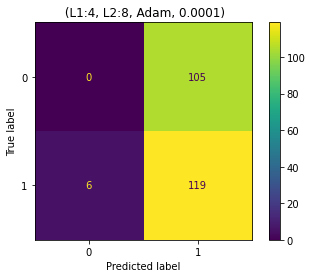

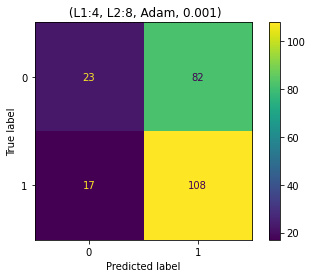

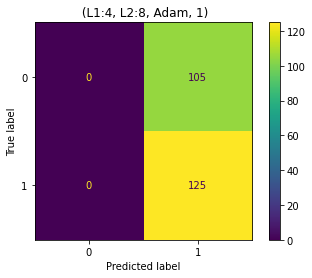

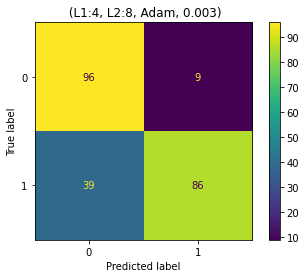

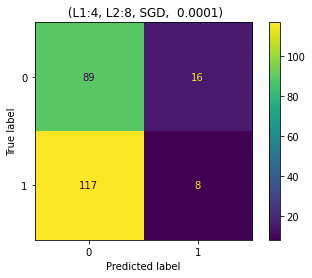

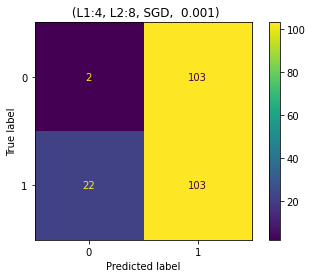

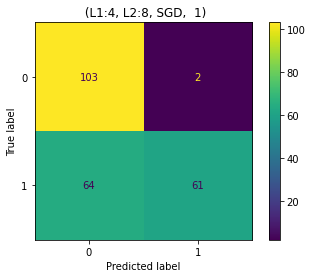

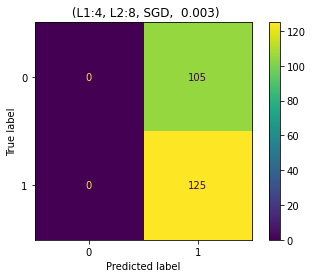

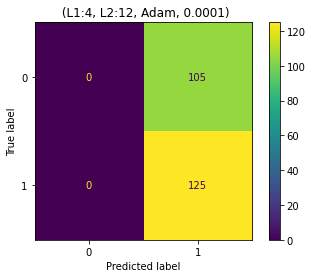

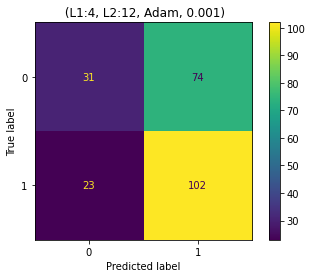

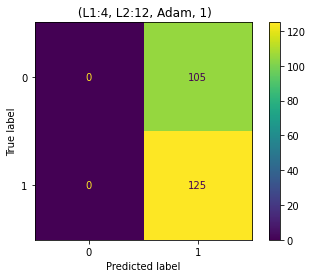

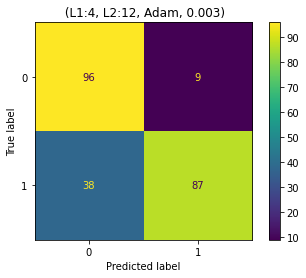

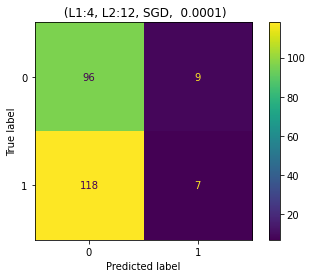

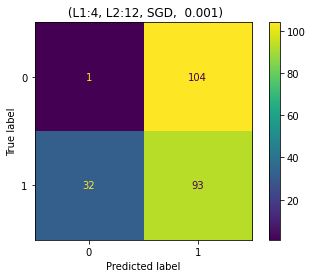

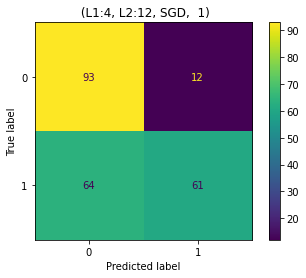

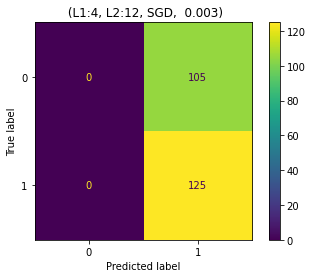

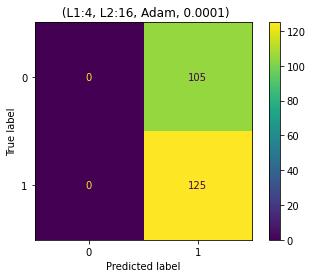

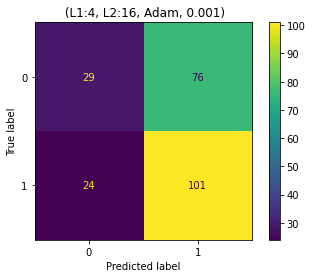

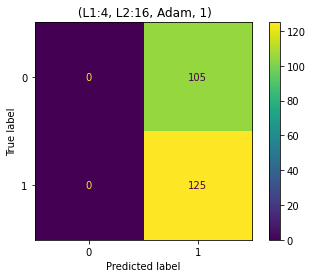

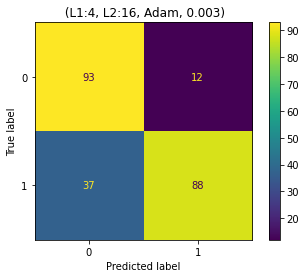

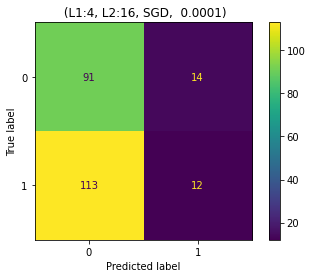

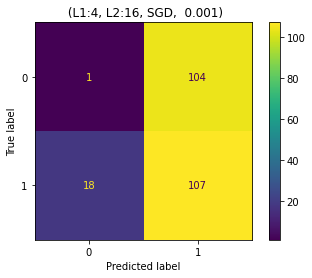

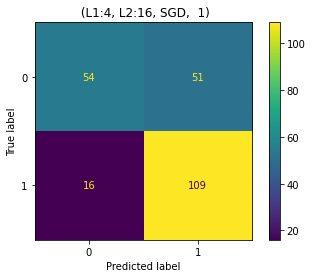

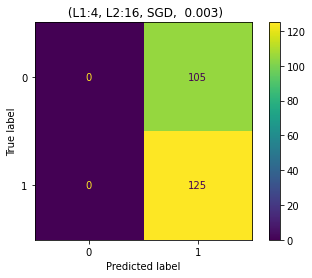

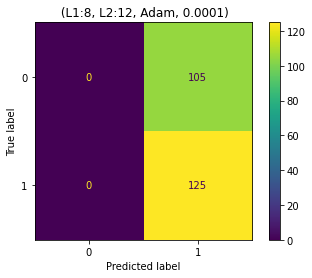

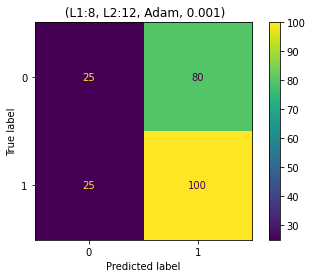

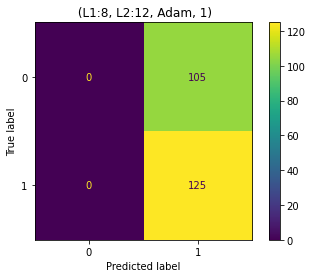

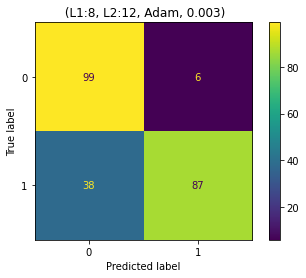

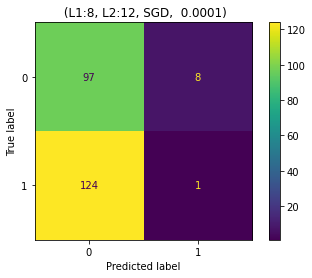

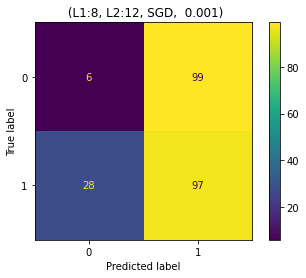

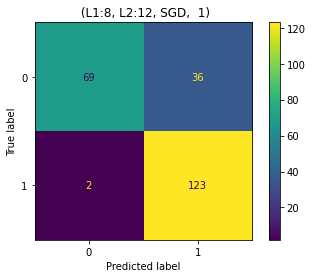

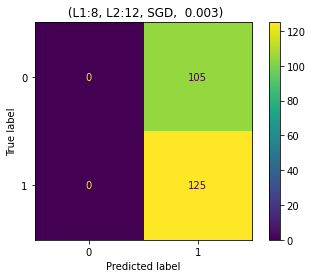

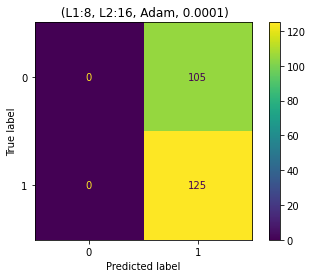

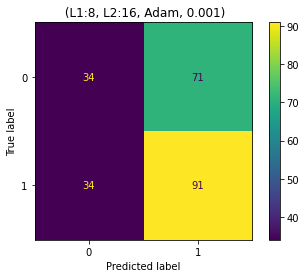

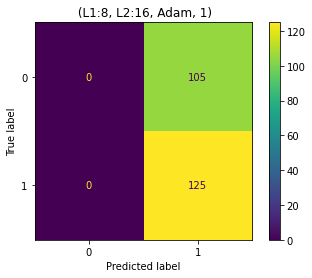

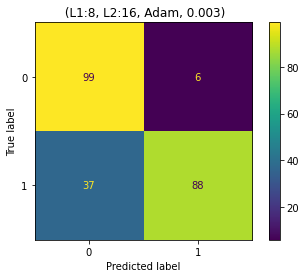

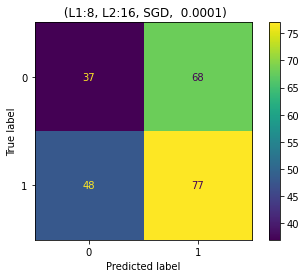

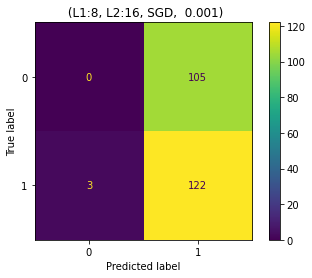

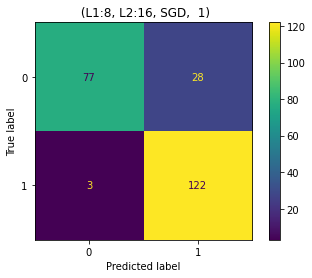

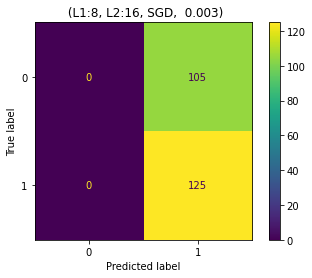

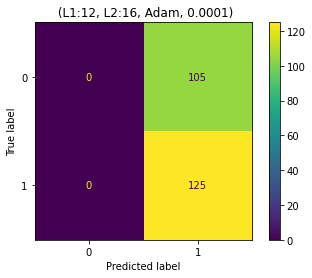

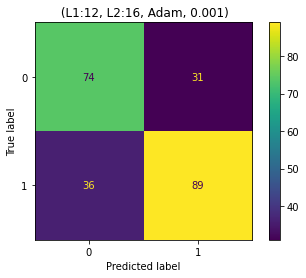

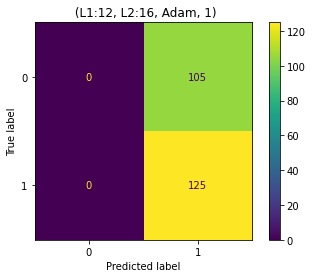

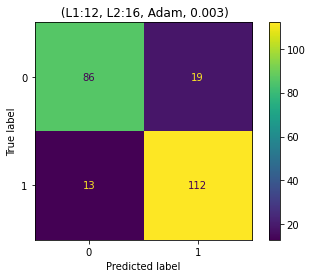

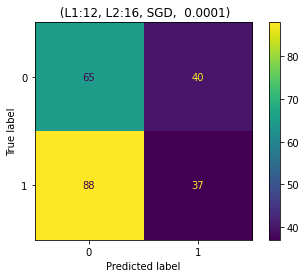

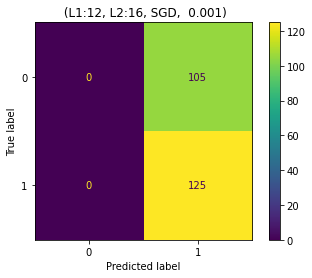

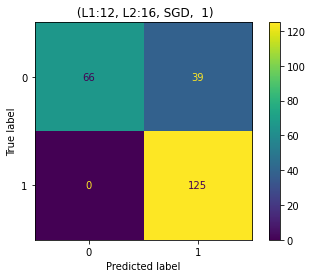

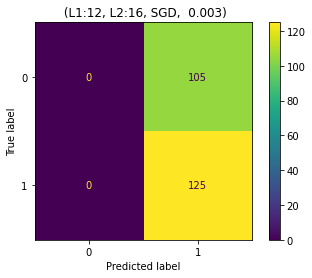

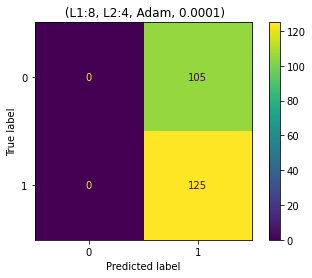

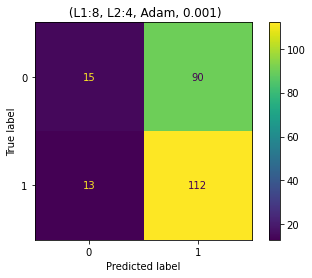

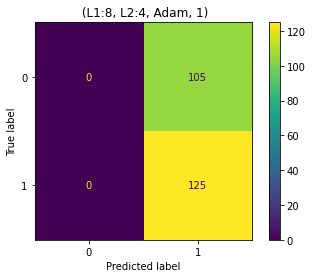

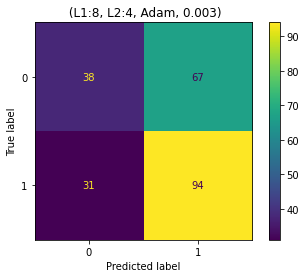

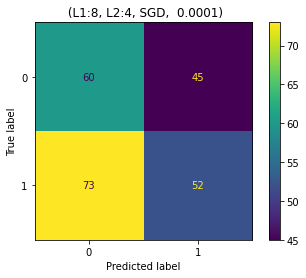

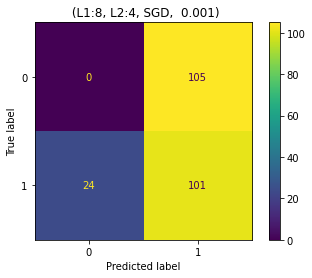

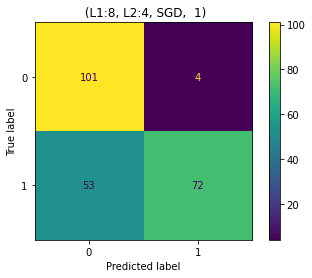

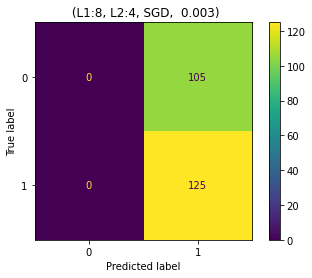

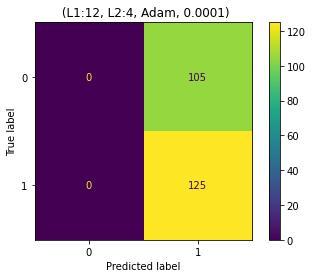

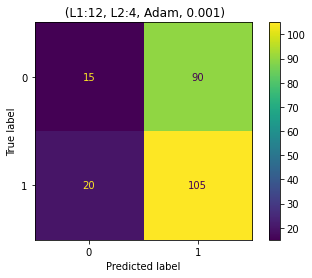

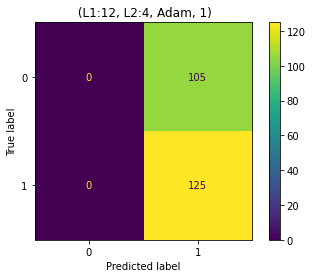

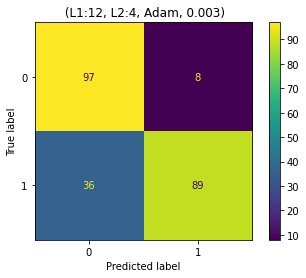

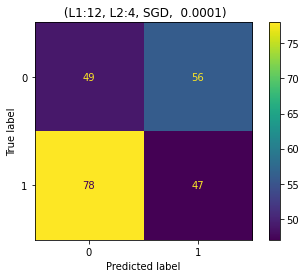

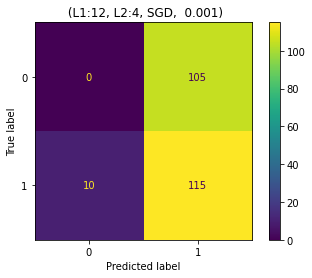

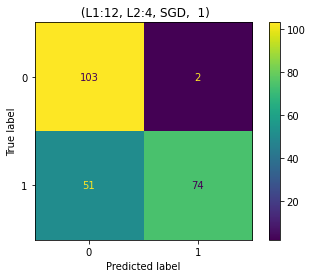

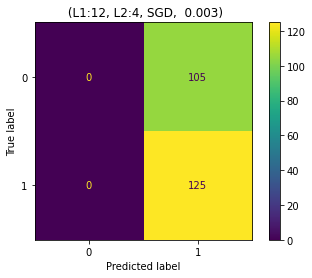

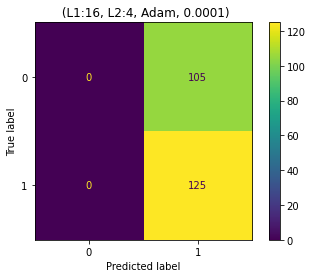

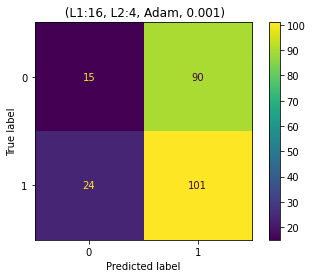

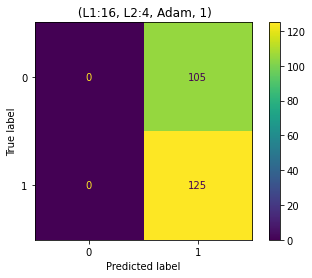

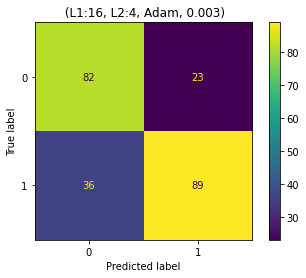

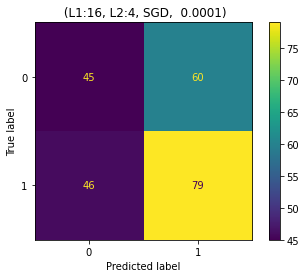

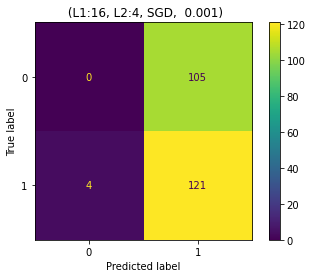

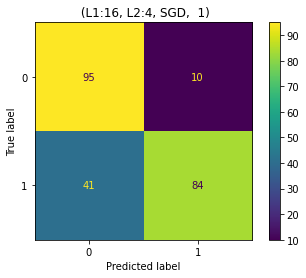

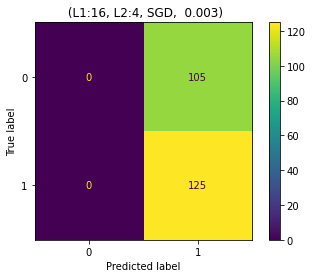

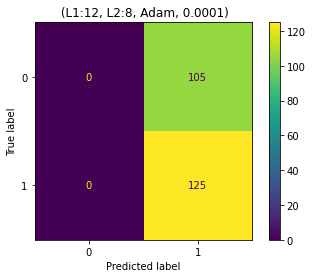

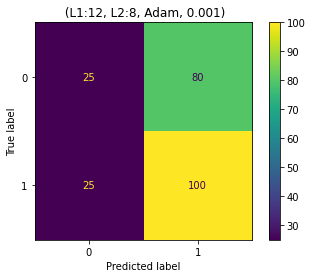

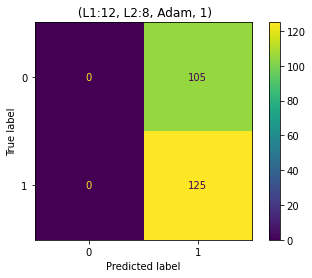

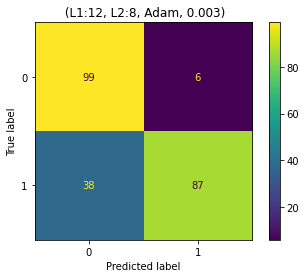

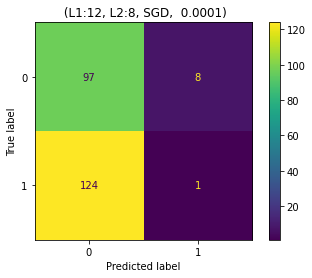

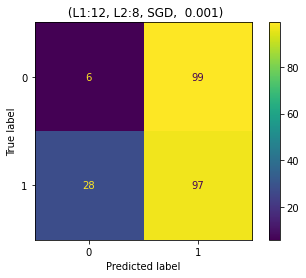

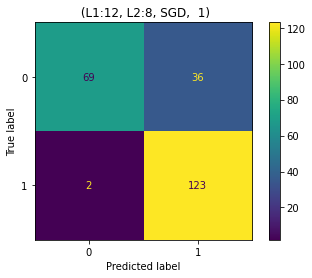

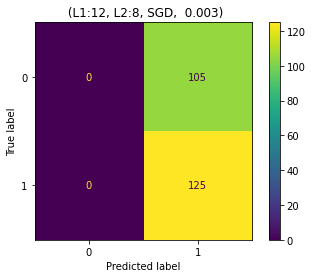

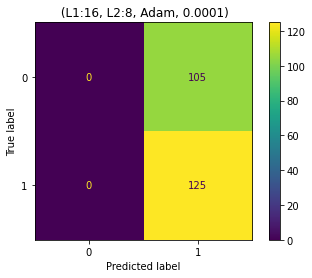

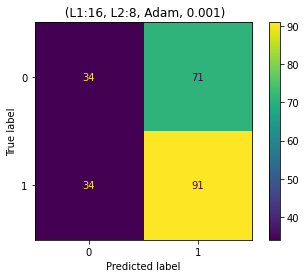

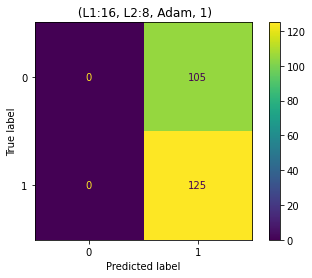

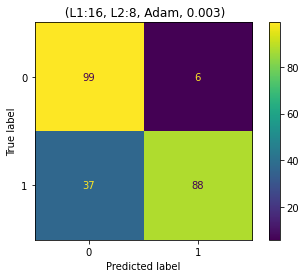

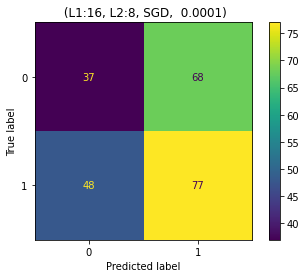

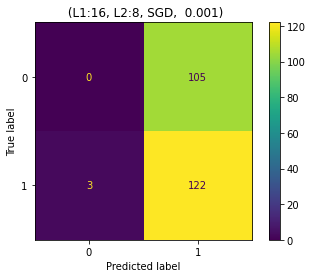

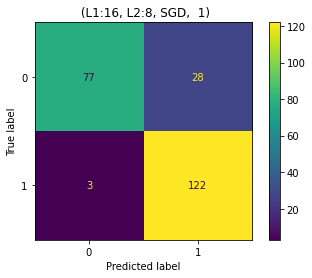

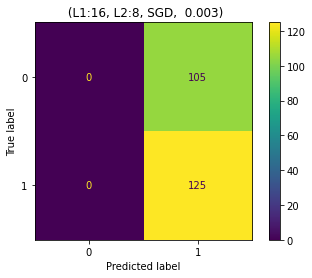

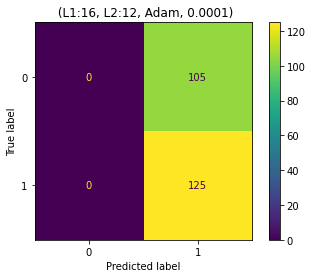

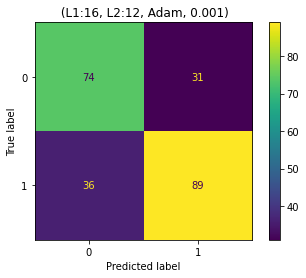

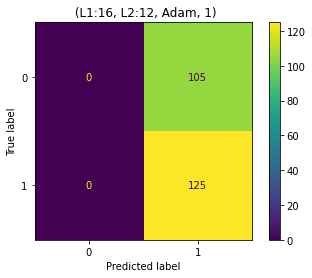

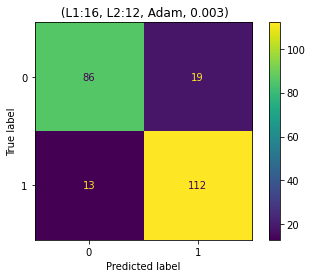

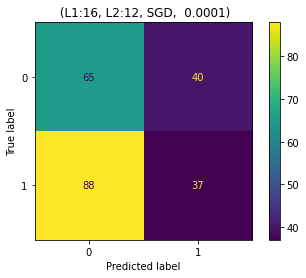

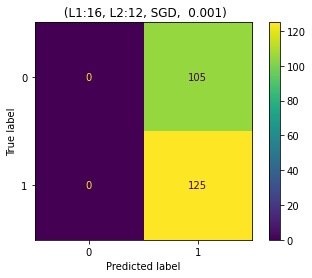

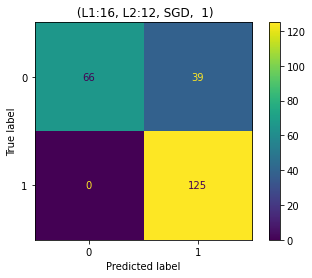

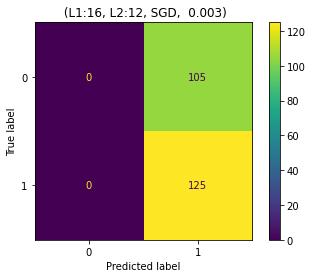

In [ ]:
#Display confusion matrix for all the combinations
display_confusion_matrix(y_test, tf.round(y_preds0_4_8), " (L1:4, L2:8, Adam, 0.0001)")
display_confusion_matrix(y_test, tf.round(y_preds1_4_8), " (L1:4, L2:8, Adam, 0.001)")
display_confusion_matrix(y_test, tf.round(y_preds2_4_8), " (L1:4, L2:8, Adam, 1)")
display_confusion_matrix(y_test, tf.round(y_preds3_4_8), " (L1:4, L2:8, Adam, 0.003)")
display_confusion_matrix(y_test, tf.round(y_preds4_4_8), " (L1:4, L2:8, SGD,  0.0001)")
display_confusion_matrix(y_test, tf.round(y_preds5_4_8), " (L1:4, L2:8, SGD,  0.001)")
display_confusion_matrix(y_test, tf.round(y_preds6_4_8), " (L1:4, L2:8, SGD,  1)")
display_confusion_matrix(y_test, tf.round(y_preds7_4_8), " (L1:4, L2:8, SGD,  0.003)")
display_confusion_matrix(y_test, tf.round(y_preds0_4_12), " (L1:4, L2:12, Adam, 0.0001)")
display_confusion_matrix(y_test, tf.round(y_preds1_4_12), " (L1:4, L2:12, Adam, 0.001)")
display_confusion_matrix(y_test, tf.round(y_preds2_4_12), " (L1:4, L2:12, Adam, 1)")
display_confusion_matrix(y_test, tf.round(y_preds3_4_12), " (L1:4, L2:12, Adam, 0.003)")
display_confusion_matrix(y_test, tf.round(y_preds4_4_12), " (L1:4, L2:12, SGD,  0.0001)")
display_confusion_matrix(y_test, tf.round(y_preds5_4_12), " (L1:4, L2:12, SGD,  0.001)")
display_confusion_matrix(y_test, tf.round(y_preds6_4_12), " (L1:4, L2:12, SGD,  1)")
display_confusion_matrix(y_test, tf.round(y_preds7_4_12), " (L1:4, L2:12, SGD,  0.003)")
display_confusion_matrix(y_test, tf.round(y_preds0_4_16), " (L1:4, L2:16, Adam, 0.0001)")
display_confusion_matrix(y_test, tf.round(y_preds1_4_16), " (L1:4, L2:16, Adam, 0.001)")
display_confusion_matrix(y_test, tf.round(y_preds2_4_16), " (L1:4, L2:16, Adam, 1)")
display_confusion_matrix(y_test, tf.round(y_preds3_4_16), " (L1:4, L2:16, Adam, 0.003)")
display_confusion_matrix(y_test, tf.round(y_preds4_4_16), " (L1:4, L2:16, SGD,  0.0001)")
display_confusion_matrix(y_test, tf.round(y_preds5_4_16), " (L1:4, L2:16, SGD,  0.001)")
display_confusion_matrix(y_test, tf.round(y_preds6_4_16), " (L1:4, L2:16, SGD,  1)")
display_confusion_matrix(y_test, tf.round(y_preds7_4_16), " (L1:4, L2:16, SGD,  0.003)")
display_confusion_matrix(y_test, tf.round(y_preds0_8_12), " (L1:8, L2:12, Adam, 0.0001)")
display_confusion_matrix(y_test, tf.round(y_preds1_8_12), " (L1:8, L2:12, Adam, 0.001)")
display_confusion_matrix(y_test, tf.round(y_preds2_8_12), " (L1:8, L2:12, Adam, 1)")
display_confusion_matrix(y_test, tf.round(y_preds3_8_12), " (L1:8, L2:12, Adam, 0.003)")
display_confusion_matrix(y_test, tf.round(y_preds4_8_12), " (L1:8, L2:12, SGD,  0.0001)")
display_confusion_matrix(y_test, tf.round(y_preds5_8_12), " (L1:8, L2:12, SGD,  0.001)")
display_confusion_matrix(y_test, tf.round(y_preds6_8_12), " (L1:8, L2:12, SGD,  1)")
display_confusion_matrix(y_test, tf.round(y_preds7_8_12), " (L1:8, L2:12, SGD,  0.003)")
display_confusion_matrix(y_test, tf.round(y_preds0_8_16), " (L1:8, L2:16, Adam, 0.0001)")
display_confusion_matrix(y_test, tf.round(y_preds1_8_16), " (L1:8, L2:16, Adam, 0.001)")
display_confusion_matrix(y_test, tf.round(y_preds2_8_16), " (L1:8, L2:16, Adam, 1)")
display_confusion_matrix(y_test, tf.round(y_preds3_8_16), " (L1:8, L2:16, Adam, 0.003)")
display_confusion_matrix(y_test, tf.round(y_preds4_8_16), " (L1:8, L2:16, SGD,  0.0001)")
display_confusion_matrix(y_test, tf.round(y_preds5_8_16), " (L1:8, L2:16, SGD,  0.001)")
display_confusion_matrix(y_test, tf.round(y_preds6_8_16), " (L1:8, L2:16, SGD,  1)")
display_confusion_matrix(y_test, tf.round(y_preds7_8_16), " (L1:8, L2:16, SGD,  0.003)") 
display_confusion_matrix(y_test, tf.round(y_preds0_12_16), " (L1:12, L2:16, Adam, 0.0001)")
display_confusion_matrix(y_test, tf.round(y_preds1_12_16), " (L1:12, L2:16, Adam, 0.001)")
display_confusion_matrix(y_test, tf.round(y_preds2_12_16), " (L1:12, L2:16, Adam, 1)")
display_confusion_matrix(y_test, tf.round(y_preds3_12_16), " (L1:12, L2:16, Adam, 0.003)")
display_confusion_matrix(y_test, tf.round(y_preds4_12_16), " (L1:12, L2:16, SGD,  0.0001)")
display_confusion_matrix(y_test, tf.round(y_preds5_12_16), " (L1:12, L2:16, SGD,  0.001)")
display_confusion_matrix(y_test, tf.round(y_preds6_12_16), " (L1:12, L2:16, SGD,  1)")
display_confusion_matrix(y_test, tf.round(y_preds7_12_16), " (L1:12, L2:16, SGD,  0.003)")

display_confusion_matrix(y_test, tf.round(y_preds0_8_4), " (L1:8, L2:4, Adam, 0.0001)")
display_confusion_matrix(y_test, tf.round(y_preds1_8_4), " (L1:8, L2:4, Adam, 0.001)")
display_confusion_matrix(y_test, tf.round(y_preds2_8_4), " (L1:8, L2:4, Adam, 1)")
display_confusion_matrix(y_test, tf.round(y_preds3_8_4), " (L1:8, L2:4, Adam, 0.003)")
display_confusion_matrix(y_test, tf.round(y_preds4_8_4), " (L1:8, L2:4, SGD,  0.0001)")
display_confusion_matrix(y_test, tf.round(y_preds5_8_4), " (L1:8, L2:4, SGD,  0.001)")
display_confusion_matrix(y_test, tf.round(y_preds6_8_4), " (L1:8, L2:4, SGD,  1)")
display_confusion_matrix(y_test, tf.round(y_preds7_8_4), " (L1:8, L2:4, SGD,  0.003)")
display_confusion_matrix(y_test, tf.round(y_preds0_12_4), " (L1:12, L2:4, Adam, 0.0001)")
display_confusion_matrix(y_test, tf.round(y_preds1_12_4), " (L1:12, L2:4, Adam, 0.001)")
display_confusion_matrix(y_test, tf.round(y_preds2_12_4), " (L1:12, L2:4, Adam, 1)")
display_confusion_matrix(y_test, tf.round(y_preds3_12_4), " (L1:12, L2:4, Adam, 0.003)")
display_confusion_matrix(y_test, tf.round(y_preds4_12_4), " (L1:12, L2:4, SGD,  0.0001)")
display_confusion_matrix(y_test, tf.round(y_preds5_12_4), " (L1:12, L2:4, SGD,  0.001)")
display_confusion_matrix(y_test, tf.round(y_preds6_12_4), " (L1:12, L2:4, SGD,  1)")
display_confusion_matrix(y_test, tf.round(y_preds7_12_4), " (L1:12, L2:4, SGD,  0.003)")
display_confusion_matrix(y_test, tf.round(y_preds0_16_4), " (L1:16, L2:4, Adam, 0.0001)")
display_confusion_matrix(y_test, tf.round(y_preds1_16_4), " (L1:16, L2:4, Adam, 0.001)")
display_confusion_matrix(y_test, tf.round(y_preds2_16_4), " (L1:16, L2:4, Adam, 1)")
display_confusion_matrix(y_test, tf.round(y_preds3_16_4), " (L1:16, L2:4, Adam, 0.003)")
display_confusion_matrix(y_test, tf.round(y_preds4_16_4), " (L1:16, L2:4, SGD,  0.0001)")
display_confusion_matrix(y_test, tf.round(y_preds5_16_4), " (L1:16, L2:4, SGD,  0.001)")
display_confusion_matrix(y_test, tf.round(y_preds6_16_4), " (L1:16, L2:4, SGD,  1)")
display_confusion_matrix(y_test, tf.round(y_preds7_16_4), " (L1:16, L2:4, SGD,  0.003)")
display_confusion_matrix(y_test, tf.round(y_preds0_8_12), " (L1:12, L2:8, Adam, 0.0001)")
display_confusion_matrix(y_test, tf.round(y_preds1_8_12), " (L1:12, L2:8, Adam, 0.001)")
display_confusion_matrix(y_test, tf.round(y_preds2_8_12), " (L1:12, L2:8, Adam, 1)")
display_confusion_matrix(y_test, tf.round(y_preds3_8_12), " (L1:12, L2:8, Adam, 0.003)")
display_confusion_matrix(y_test, tf.round(y_preds4_8_12), " (L1:12, L2:8, SGD,  0.0001)")
display_confusion_matrix(y_test, tf.round(y_preds5_8_12), " (L1:12, L2:8, SGD,  0.001)")
display_confusion_matrix(y_test, tf.round(y_preds6_8_12), " (L1:12, L2:8, SGD,  1)")
display_confusion_matrix(y_test, tf.round(y_preds7_8_12), " (L1:12, L2:8, SGD,  0.003)")
display_confusion_matrix(y_test, tf.round(y_preds0_8_16), " (L1:16, L2:8, Adam, 0.0001)")
display_confusion_matrix(y_test, tf.round(y_preds1_8_16), " (L1:16, L2:8, Adam, 0.001)")
display_confusion_matrix(y_test, tf.round(y_preds2_8_16), " (L1:16, L2:8, Adam, 1)")
display_confusion_matrix(y_test, tf.round(y_preds3_8_16), " (L1:16, L2:8, Adam, 0.003)")
display_confusion_matrix(y_test, tf.round(y_preds4_8_16), " (L1:16, L2:8, SGD,  0.0001)")
display_confusion_matrix(y_test, tf.round(y_preds5_8_16), " (L1:16, L2:8, SGD,  0.001)")
display_confusion_matrix(y_test, tf.round(y_preds6_8_16), " (L1:16, L2:8, SGD,  1)")
display_confusion_matrix(y_test, tf.round(y_preds7_8_16), " (L1:16, L2:8, SGD,  0.003)") 
display_confusion_matrix(y_test, tf.round(y_preds0_12_16), " (L1:16, L2:12, Adam, 0.0001)")
display_confusion_matrix(y_test, tf.round(y_preds1_12_16), " (L1:16, L2:12, Adam, 0.001)")
display_confusion_matrix(y_test, tf.round(y_preds2_12_16), " (L1:16, L2:12, Adam, 1)")
display_confusion_matrix(y_test, tf.round(y_preds3_12_16), " (L1:16, L2:12, Adam, 0.003)")
display_confusion_matrix(y_test, tf.round(y_preds4_12_16), " (L1:16, L2:12, SGD,  0.0001)")
display_confusion_matrix(y_test, tf.round(y_preds5_12_16), " (L1:16, L2:12, SGD,  0.001)")
display_confusion_matrix(y_test, tf.round(y_preds6_12_16), " (L1:16, L2:12, SGD,  1)")
display_confusion_matrix(y_test, tf.round(y_preds7_12_16), " (L1:16, L2:12, SGD,  0.003)")


# CONCLUSION FOR DOUBLE LAYER
We tested various combination of input for double layer including 
* Change in epoch values
* Change in learning rate
* Change in optimizers

After performing various combination we have identified that the model which is giving best **ACCURACY** is having configuration

1. **For Adam Optimizer**
>* Layer-1: 12 nodes
>* Layer-2: 16 Nodes
>* Learning Rate: 0.003
>* Accuracy: 87%
2. **For SGD Optimizer**
>* Layer-1: 8 nodes
>* Layer-2: 16 Nodes
>* Learning Rate: 1
>* Accuracy: 86.5%


**Remark:**
Although, there are other combinations as well which are giving similar or nearer accuracy. We have shown & mentioned highest accuracy in conclusion which can be considered for final deployable model




#### Display confusion matrix of final Deployable model

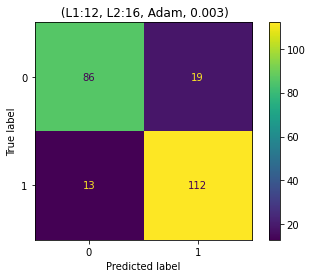

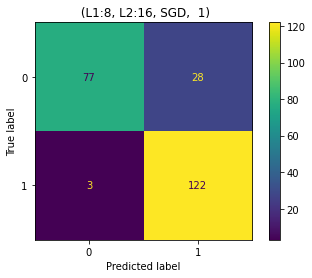

In [ ]:
display_confusion_matrix(y_test, tf.round(y_preds3_12_16), " (L1:12, L2:16, Adam, 0.003)")
display_confusion_matrix(y_test, tf.round(y_preds6_8_16), " (L1:8, L2:16, SGD,  1)")

#### Display classification report of final deployable model
1. **For Adam Optimizer**
>* Layer-1: 12 nodes
>* Layer-2: 16 Nodes
>* Learning Rate: 0.003
>* Accuracy: 87%

In [ ]:
#Refer: https://www.py4u.net/discuss/211558
#Classification Report of final Deployable Mocel
from sklearn.metrics import classification_report
import pandas as pd
df = pd.DataFrame(classification_report(y_test, 
                                        tf.round(y_preds3_12_16), digits=2,
                                        output_dict=True)).T

df['support'] = df.support.apply(int)

df.style.background_gradient(cmap='viridis',
                            subset=pd.IndexSlice['0':'9', :'f1-score'])

2. **For SGD Optimizer**
>* Layer-1: 8 nodes
>* Layer-2: 16 Nodes
>* Learning Rate: 1
>* Accuracy: 86.5%

In [ ]:
#Refer: https://www.py4u.net/discuss/211558
#Classification Report of final Deployable Mocel
from sklearn.metrics import classification_report
import pandas as pd
df = pd.DataFrame(classification_report(y_test, 
                                        tf.round(y_preds6_8_16), digits=2,
                                        output_dict=True)).T

df['support'] = df.support.apply(int)

df.style.background_gradient(cmap='viridis',
                            subset=pd.IndexSlice['0':'9', :'f1-score'])

# **END OF DOCUMENT**